In [1]:
import numpy as np
import imutils
import cv2
import io
import os
import random
import shutil
import matplotlib.pyplot as plt
import skimage 
from skimage import filters 
from skimage.feature import greycomatrix, greycoprops
from skimage import data

In [2]:
# function for image processing with segmentation
def image_processing(image):
                #Gaussian Blur
    blurGaussian = cv2.GaussianBlur(image,(5,5),5)
                #mean blur
    kernel = np.ones((5,5),np.float32)/25
    meanblur = cv2.filter2D(blurGaussian,-1,kernel)
                #Median Blur
    median = cv2.medianBlur(meanblur,5)
          #segmentation of images  using threshhold segmentation
    th =155
    max_value=255
    ret, out1 = cv2.threshold(median,th,max_value,cv2.THRESH_BINARY)
        #contours
    
    plt.subplot(1, 2, 2)
    plt.imshow(out1)
    plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
    plt.title('Cropped Image')
    plt.show()
                    #segmenatation of images using historigram
    histimg=plt.hist(median.ravel(),256,[0,256])
    plt.show()

    iar = np.asarray(median)
    print(iar)
    iar.max()
    # 'contrast',‘dissimilarity’, ‘homogeneity’, ‘energy’, ‘correlation’, ‘ASM’
    glcm=g = greycomatrix(iar, [1,2], [0, np.pi/2], levels=260,normed=True, symmetric=True)

    contrast = greycoprops(glcm, 'contrast')
    print("the contrast of the images is ",contrast)
    dissimilarity = greycoprops(glcm, 'dissimilarity')
    print("the dissimilarity of the images is ",dissimilarity)
    homogeneity = greycoprops(glcm, 'homogeneity')
    print("the homogeneity of the images is ",homogeneity)
    energy = greycoprops(glcm, 'energy')
    print("the energy of the images is ",energy)
    correlation = greycoprops(glcm, 'correlation')
    print("the correlation of the images is ",energy)
    ASM = greycoprops(glcm, 'ASM')
    print("the ASM of the images is ",ASM)


    plt.plot(contrast,label="contrast")
    plt.plot(dissimilarity,label="dissimilarity")
    plt.plot(homogeneity,label="homogeneity")
    plt.plot(energy,label="energy")
    plt.plot(correlation,label="correlation")
    plt.plot(ASM,label="ASM")
    plt.title("GSLM MATRIX")
    plt.xlabel("OFFSITE")
    plt.ylabel("FEATURES")
    plt.legend()
    plt.show()
    return out1



In [3]:
size_img=int(input("enter the re-sized images"))
IMG_DIR="G:\\brainMydataSet"
CATEGORIES = ["no","yes"]
X=[]
Y=[]
def create_data_set():
    for categories in CATEGORIES:
        path = os.path.join(IMG_DIR,categories)
        #this function is used to cencatenate the path with sub folder
        #class_num can classified categories and marked it as 0 and 1 form.
        class_num = CATEGORIES.index(categories) 
        for img in os.listdir(path):
             # load the image\n",
            img_array =cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            resized_img = cv2.resize(img_array,(size_img,size_img),interpolation=cv2.INTER_CUBIC)
            processed_img=image_processing(resized_img)
            # normalize values
            normal_img = processed_img/255
            # convert image to numpy array and append it to X
            X.append(normal_img)
            # append a value of 1 to the target array if the image is in the folder named 'yes', otherwise append 0.
            #from classnum
            Y.append(class_num)
    x=np.array(X)
    y=np.array(Y)
    
    print(f'Number of examples is: {len(x)}')
    print(f'X shape is: {x.shape}')
    print(f'y shape is: {y.shape}')
    
    return x,y

enter the re-sized images128


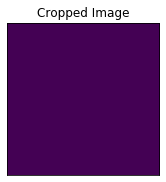

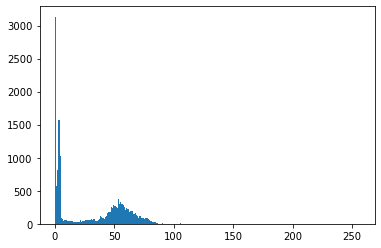

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[10.37456939  9.875     ]
 [38.62828621 36.68346974]]
the dissimilarity of the images is  [[1.71401329 1.54564469]
 [3.42367312 3.08091518]]
the homogeneity of the images is  [[0.60777898 0.63600987]
 [0.48445748 0.50984541]]
the energy of the images is  [[0.21010171 0.21146225]
 [0.19216131 0.19482639]]
the correlation of the images is  [[0.21010171 0.21146225]
 [0.19216131 0.19482639]]
the ASM of the images is  [[0.04414273 0.04471628]
 [0.03692597 0.03795732]]


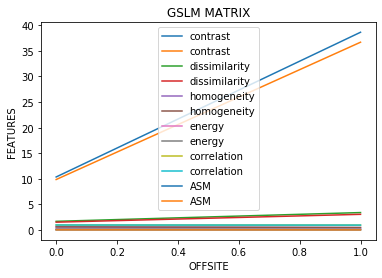

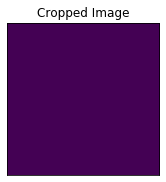

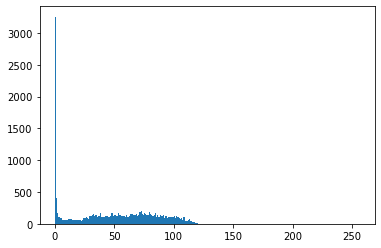

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[11.91455463 10.17710384]
 [44.77635169 38.17745536]]
the dissimilarity of the images is  [[2.23037648 2.06268455]
 [4.45901538 4.11904762]]
the homogeneity of the images is  [[0.48425865 0.49607088]
 [0.35377677 0.36621153]]
the energy of the images is  [[0.18817851 0.19279341]
 [0.17450862 0.18349946]]
the correlation of the images is  [[0.18817851 0.19279341]
 [0.17450862 0.18349946]]
the ASM of the images is  [[0.03541115 0.0371693 ]
 [0.03045326 0.03367205]]


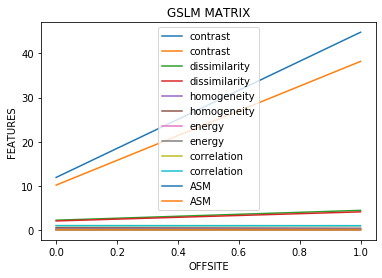

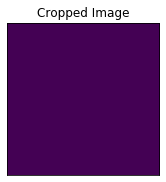

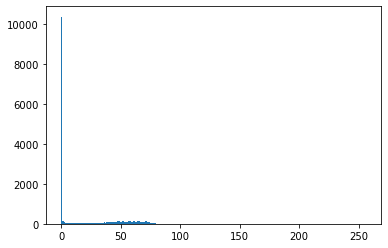

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[16.4507874  12.7023253 ]
 [61.49826389 47.99640377]]
the dissimilarity of the images is  [[1.69500492 1.12272392]
 [3.4000496  2.24702381]]
the homogeneity of the images is  [[0.73860977 0.78291901]
 [0.67945217 0.71877493]]
the energy of the images is  [[0.62241558 0.62723538]
 [0.61179632 0.6214511 ]]
the correlation of the images is  [[0.62241558 0.62723538]
 [0.61179632 0.6214511 ]]
the ASM of the images is  [[0.38740115 0.39342422]
 [0.37429474 0.38620148]]


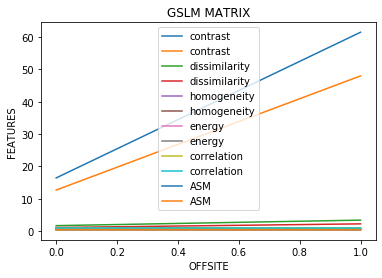

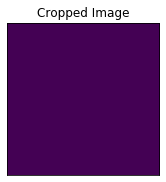

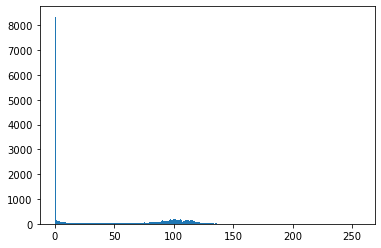

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[19.14739173  7.9488189 ]
 [74.61024306 30.39955357]]
the dissimilarity of the images is  [[2.11417323 1.28395669]
 [4.24206349 2.5687004 ]]
the homogeneity of the images is  [[0.65015501 0.7127315 ]
 [0.58002512 0.63368675]]
the energy of the images is  [[0.49799594 0.5041044 ]
 [0.48596145 0.49833861]]
the correlation of the images is  [[0.49799594 0.5041044 ]
 [0.48596145 0.49833861]]
the ASM of the images is  [[0.24799996 0.25412124]
 [0.23615853 0.24834137]]


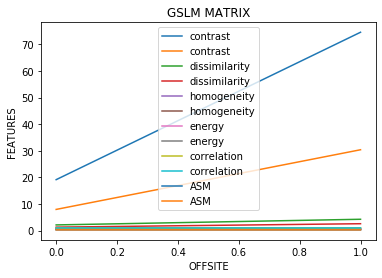

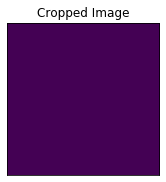

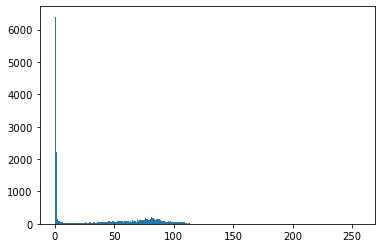

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[26.34338091 10.71770423]
 [97.18167163 39.71347966]]
the dissimilarity of the images is  [[2.43380906 1.32314222]
 [4.87896825 2.62208581]]
the homogeneity of the images is  [[0.65618113 0.72192649]
 [0.57334002 0.64335365]]
the energy of the images is  [[0.39722505 0.41259051]
 [0.38126854 0.41121301]]
the correlation of the images is  [[0.39722505 0.41259051]
 [0.38126854 0.41121301]]
the ASM of the images is  [[0.15778774 0.17023093]
 [0.1453657  0.16909614]]


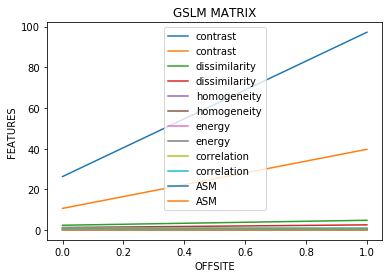

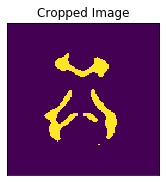

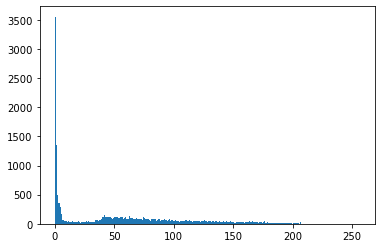

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 37.27042323  46.04330709]
 [140.80369544 169.99268353]]
the dissimilarity of the images is  [[3.71222933 3.92175197]
 [7.41443452 7.82924107]]
the homogeneity of the images is  [[0.47830321 0.48860201]
 [0.38223028 0.38909012]]
the energy of the images is  [[0.21574699 0.21680787]
 [0.19847043 0.20009265]]
the correlation of the images is  [[0.21574699 0.21680787]
 [0.19847043 0.20009265]]
the ASM of the images is  [[0.04654677 0.04700565]
 [0.03939051 0.04003707]]


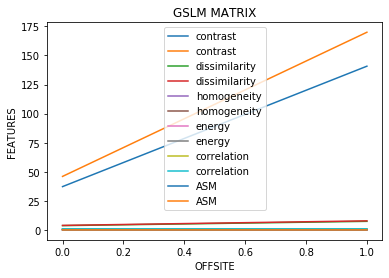

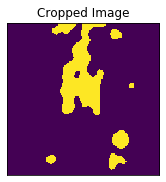

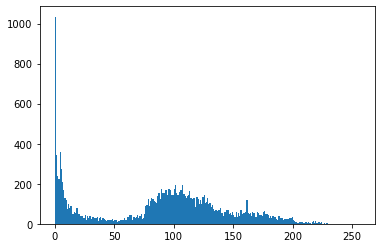

[[20 21 22 ... 83 87 90]
 [21 21 22 ... 81 83 87]
 [21 21 24 ... 76 81 83]
 ...
 [38 37 36 ...  0  0  0]
 [35 34 34 ...  0  0  0]
 [34 34 33 ...  0  0  0]]
the contrast of the images is  [[ 49.99120325  31.447281  ]
 [190.63659474 118.12915427]]
the dissimilarity of the images is  [[4.6101747  3.53893947]
 [9.20455109 7.01841518]]
the homogeneity of the images is  [[0.32743931 0.389503  ]
 [0.20229042 0.26170599]]
the energy of the images is  [[0.06102579 0.06779373]
 [0.04964431 0.06039425]]
the correlation of the images is  [[0.06102579 0.06779373]
 [0.04964431 0.06039425]]
the ASM of the images is  [[0.00372415 0.00459599]
 [0.00246456 0.00364747]]


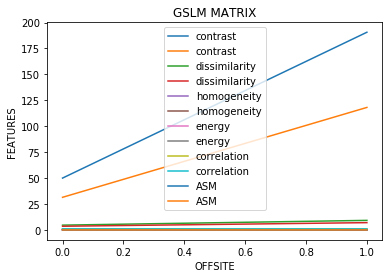

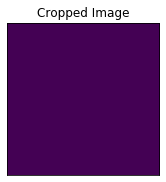

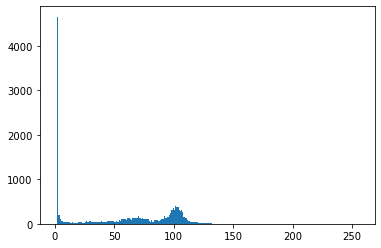

[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]
the contrast of the images is  [[21.91658465 19.25227608]
 [82.72643849 72.14949157]]
the dissimilarity of the images is  [[2.59436516 2.27011565]
 [5.18427579 4.52411954]]
the homogeneity of the images is  [[0.55165796 0.57802425]
 [0.44042719 0.46763974]]
the energy of the images is  [[0.27347508 0.27717723]
 [0.25924073 0.26647666]]
the correlation of the images is  [[0.27347508 0.27717723]
 [0.25924073 0.26647666]]
the ASM of the images is  [[0.07478862 0.07682721]
 [0.06720575 0.07100981]]


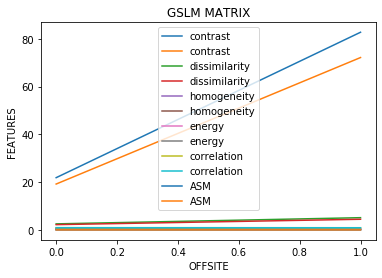

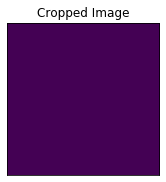

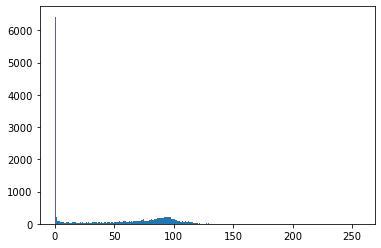

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 31.33538386  18.45250984]
 [117.96155754  69.95293899]]
the dissimilarity of the images is  [[2.90489665 2.18688484]
 [5.81795635 4.36352927]]
the homogeneity of the images is  [[0.56597113 0.59742738]
 [0.47312196 0.50484964]]
the energy of the images is  [[0.38030187 0.38376468]
 [0.36743337 0.37436771]]
the correlation of the images is  [[0.38030187 0.38376468]
 [0.36743337 0.37436771]]
the ASM of the images is  [[0.14462951 0.14727533]
 [0.13500728 0.14015118]]


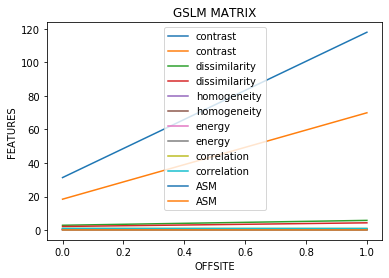

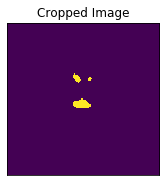

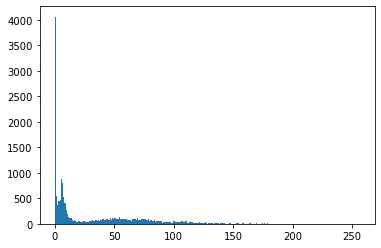

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[21.2140748  25.71395177]
 [79.1546379  96.25254216]]
the dissimilarity of the images is  [[2.43196358 2.55204232]
 [4.84883433 5.07930308]]
the homogeneity of the images is  [[0.58113744 0.59537019]
 [0.46454902 0.49452376]]
the energy of the images is  [[0.24353398 0.25213259]
 [0.22694055 0.24239585]]
the correlation of the images is  [[0.24353398 0.25213259]
 [0.22694055 0.24239585]]
the ASM of the images is  [[0.0593088  0.06357084]
 [0.05150202 0.05875575]]


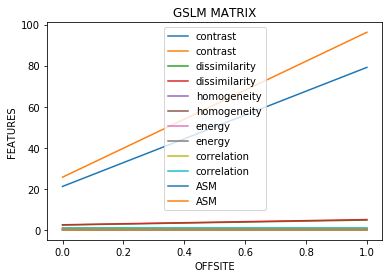

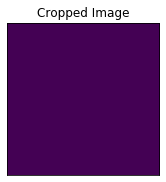

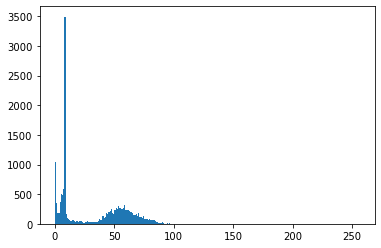

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 7.77042323  5.89080955]
 [29.6422371  22.27535962]]
the dissimilarity of the images is  [[1.52165354 1.20183317]
 [3.04712302 2.39725942]]
the homogeneity of the images is  [[0.60095588 0.66864997]
 [0.46811889 0.54901071]]
the energy of the images is  [[0.21262151 0.22066407]
 [0.19619865 0.2103575 ]]
the correlation of the images is  [[0.21262151 0.22066407]
 [0.19619865 0.2103575 ]]
the ASM of the images is  [[0.04520791 0.04869263]
 [0.03849391 0.04425028]]


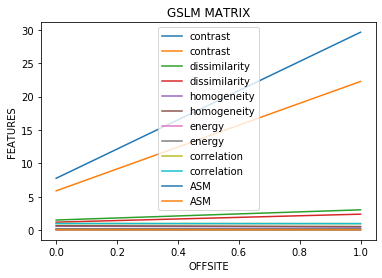

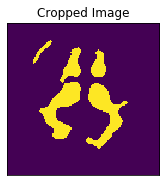

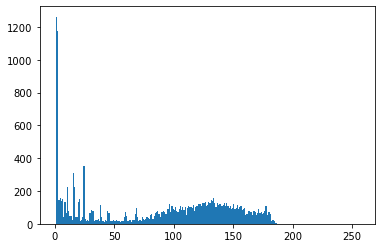

[[143 128 119 ... 117 125 146]
 [128 122  99 ...  99 125 125]
 [119 107  89 ...  90  98 117]
 ...
 [119 107  89 ...  86  96 112]
 [127 121  99 ...  94 120 121]
 [142 127 119 ... 112 121 141]]
the contrast of the images is  [[ 62.15784941  49.60242372]
 [233.09579613 185.421875  ]]
the dissimilarity of the images is  [[4.96899606 4.0164247 ]
 [9.83649554 7.95572917]]
the homogeneity of the images is  [[0.3764877  0.41690695]
 [0.27616256 0.31017193]]
the energy of the images is  [[0.09501313 0.09578158]
 [0.08213575 0.08348975]]
the correlation of the images is  [[0.09501313 0.09578158]
 [0.08213575 0.08348975]]
the ASM of the images is  [[0.00902749 0.00917411]
 [0.00674628 0.00697054]]


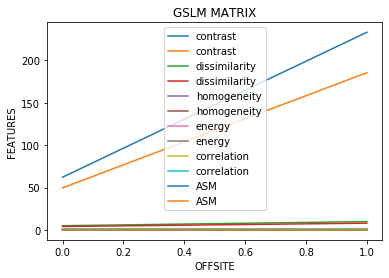

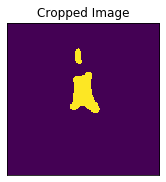

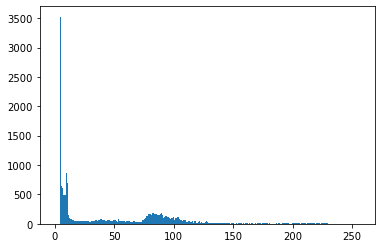

[[4 4 4 ... 4 4 4]
 [4 4 4 ... 4 4 4]
 [4 4 4 ... 4 4 4]
 ...
 [4 4 4 ... 4 4 4]
 [4 4 4 ... 4 4 4]
 [4 4 4 ... 4 4 4]]
the contrast of the images is  [[ 26.49938484  15.50682825]
 [100.44097222  58.57564484]]
the dissimilarity of the images is  [[2.67950295 2.01457923]
 [5.35453869 4.02207341]]
the homogeneity of the images is  [[0.552905   0.59946505]
 [0.44615852 0.49313691]]
the energy of the images is  [[0.21368802 0.22688957]
 [0.19668885 0.22188141]]
the correlation of the images is  [[0.21368802 0.22688957]
 [0.19668885 0.22188141]]
the ASM of the images is  [[0.04566257 0.05147888]
 [0.0386865  0.04923136]]


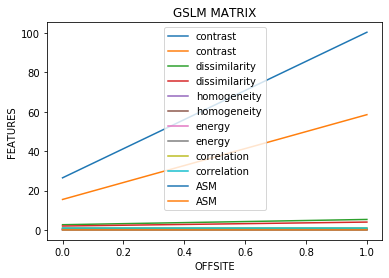

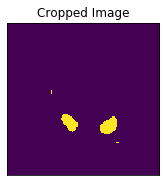

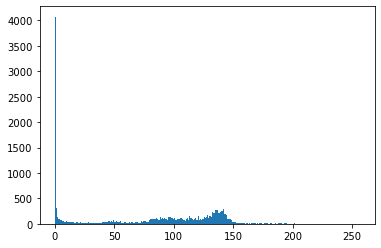

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 47.21112205  41.15421998]
 [179.24435764 156.55034722]]
the dissimilarity of the images is  [[3.89222441 3.54398376]
 [7.781312   7.078125  ]]
the homogeneity of the images is  [[0.484007   0.48767605]
 [0.37564632 0.38124041]]
the energy of the images is  [[0.23870533 0.23896794]
 [0.22649438 0.22740005]]
the correlation of the images is  [[0.23870533 0.23896794]
 [0.22649438 0.22740005]]
the ASM of the images is  [[0.05698023 0.05710568]
 [0.0512997  0.05171078]]


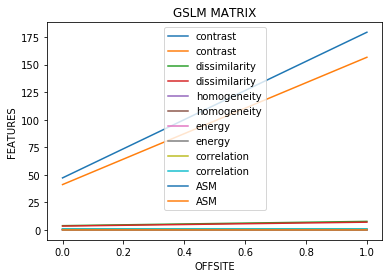

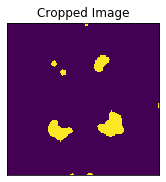

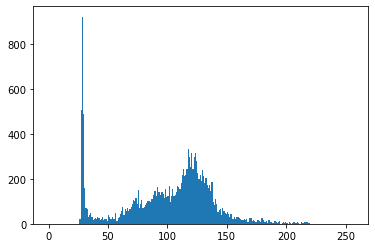

[[27 27 27 ... 27 27 27]
 [27 27 27 ... 27 27 27]
 [27 27 27 ... 27 27 27]
 ...
 [27 27 27 ... 28 28 28]
 [27 27 27 ... 28 28 28]
 [27 27 27 ... 28 28 28]]
the contrast of the images is  [[ 33.82129675  31.21142963]
 [126.60807292 117.04017857]]
the dissimilarity of the images is  [[3.7445251  3.49563238]
 [7.45182292 6.95188492]]
the homogeneity of the images is  [[0.37849243 0.39725979]
 [0.24969279 0.2636721 ]]
the energy of the images is  [[0.0650283  0.06532599]
 [0.05253046 0.05218547]]
the correlation of the images is  [[0.0650283  0.06532599]
 [0.05253046 0.05218547]]
the ASM of the images is  [[0.00422868 0.00426748]
 [0.00275945 0.00272332]]


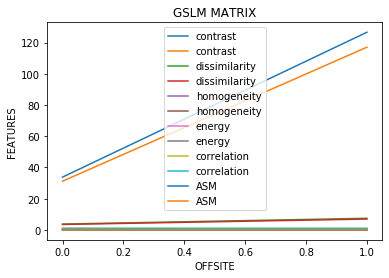

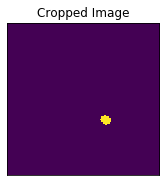

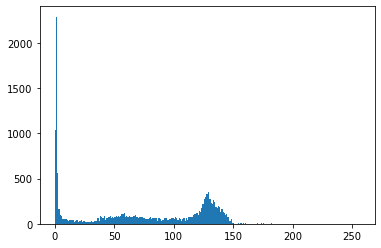

[[ 1  1  1 ... 61 73 75]
 [ 1  1  1 ... 60 65 73]
 [ 1  1  1 ... 50 61 65]
 ...
 [ 1  1  1 ...  0  0  0]
 [ 1  1  1 ...  0  0  0]
 [ 1  1  1 ...  1  0  0]]
the contrast of the images is  [[ 43.28580217  29.23941929]
 [162.3781002  109.36154514]]
the dissimilarity of the images is  [[3.6472687  2.85420768]
 [7.31448413 5.69909474]]
the homogeneity of the images is  [[0.47811659 0.5226367 ]
 [0.346344   0.39478997]]
the energy of the images is  [[0.13788722 0.14586371]
 [0.11820825 0.13113888]]
the correlation of the images is  [[0.13788722 0.14586371]
 [0.11820825 0.13113888]]
the ASM of the images is  [[0.01901288 0.02127622]
 [0.01397319 0.0171974 ]]


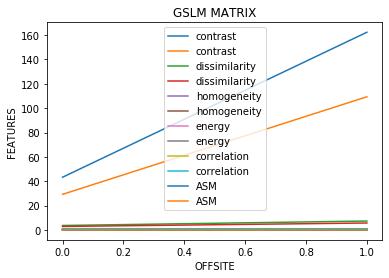

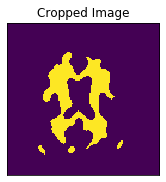

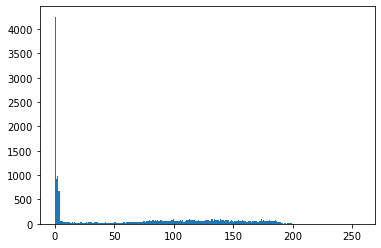

[[3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 ...
 [2 2 2 ... 3 3 3]
 [2 2 2 ... 3 3 3]
 [2 2 2 ... 3 3 3]]
the contrast of the images is  [[ 64.11897146  38.37770669]
 [242.13045635 144.21329365]]
the dissimilarity of the images is  [[4.54096949 3.37586122]
 [9.08519345 6.74231151]]
the homogeneity of the images is  [[0.494676   0.53663291]
 [0.39694375 0.45194686]]
the energy of the images is  [[0.25398831 0.26349344]
 [0.2389097  0.25417421]]
the correlation of the images is  [[0.25398831 0.26349344]
 [0.2389097  0.25417421]]
the ASM of the images is  [[0.06451006 0.06942879]
 [0.05707785 0.06460453]]


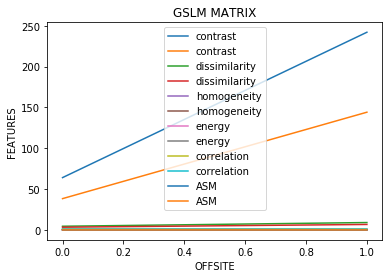

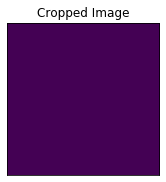

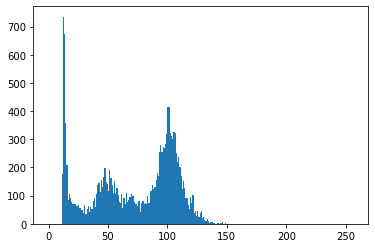

[[15 15 15 ... 15 16 16]
 [15 15 14 ... 15 15 16]
 [15 15 14 ... 15 15 15]
 ...
 [15 15 14 ... 14 14 15]
 [15 15 14 ... 14 15 15]
 [15 15 15 ... 14 15 15]]
the contrast of the images is  [[ 30.3390748   22.796875  ]
 [112.72482639  85.02560764]]
the dissimilarity of the images is  [[3.265625   2.91387795]
 [6.49789187 5.7922247 ]]
the homogeneity of the images is  [[0.43720739 0.45833939]
 [0.29216986 0.31762356]]
the energy of the images is  [[0.06430587 0.06476276]
 [0.05187828 0.05057723]]
the correlation of the images is  [[0.06430587 0.06476276]
 [0.05187828 0.05057723]]
the ASM of the images is  [[0.00413524 0.00419422]
 [0.00269136 0.00255806]]


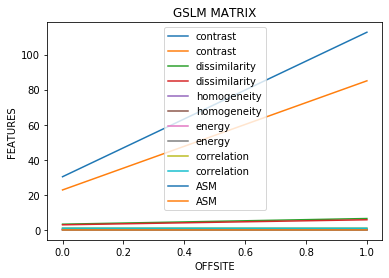

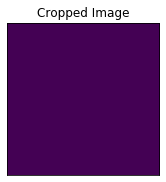

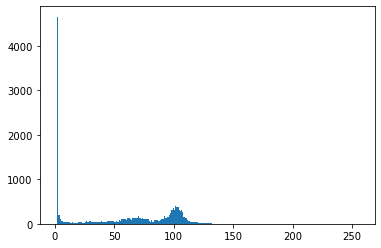

[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]
the contrast of the images is  [[21.91658465 19.25227608]
 [82.72643849 72.14949157]]
the dissimilarity of the images is  [[2.59436516 2.27011565]
 [5.18427579 4.52411954]]
the homogeneity of the images is  [[0.55165796 0.57802425]
 [0.44042719 0.46763974]]
the energy of the images is  [[0.27347508 0.27717723]
 [0.25924073 0.26647666]]
the correlation of the images is  [[0.27347508 0.27717723]
 [0.25924073 0.26647666]]
the ASM of the images is  [[0.07478862 0.07682721]
 [0.06720575 0.07100981]]


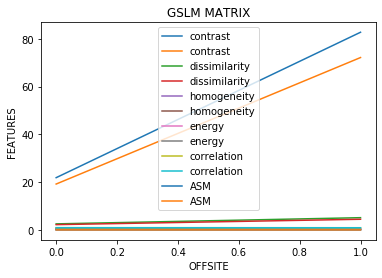

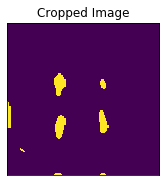

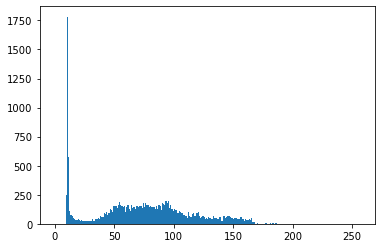

[[ 9  9 10 ...  9  9  9]
 [ 9  9  9 ...  9  9  9]
 [ 9  9  9 ...  9  9  9]
 ...
 [10 10 10 ...  9  9  9]
 [10 10 10 ...  9  9  9]
 [10 10 10 ...  9  9  9]]
the contrast of the images is  [[ 47.5203002   32.35291585]
 [179.80220734 122.06702629]]
the dissimilarity of the images is  [[4.3171752  3.40237451]
 [8.62958829 6.78416419]]
the homogeneity of the images is  [[0.36410489 0.4066748 ]
 [0.25377503 0.28037097]]
the energy of the images is  [[0.10802947 0.10463463]
 [0.09897411 0.09202049]]
the correlation of the images is  [[0.10802947 0.10463463]
 [0.09897411 0.09202049]]
the ASM of the images is  [[0.01167037 0.0109484 ]
 [0.00979588 0.00846777]]


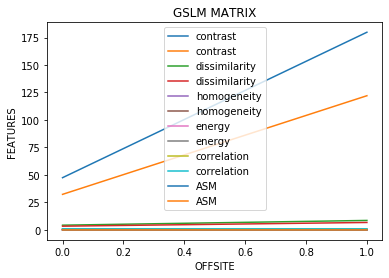

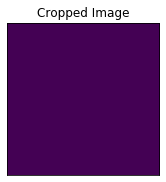

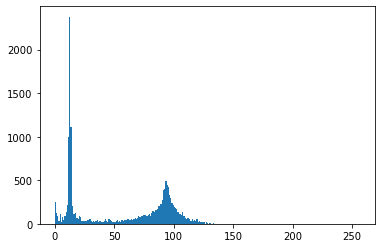

[[ 0  0  1 ... 11 11 11]
 [ 0  0  1 ... 11 11 11]
 [ 0  0  1 ... 11 11 11]
 ...
 [ 0  0  1 ... 10 10 10]
 [ 0  0  1 ...  9  9  9]
 [ 0  0  1 ...  9  9  9]]
the contrast of the images is  [[23.17956447 22.67101378]
 [87.10081845 85.18222966]]
the dissimilarity of the images is  [[2.33421506 2.18097933]
 [4.67534722 4.36303323]]
the homogeneity of the images is  [[0.57126931 0.61160196]
 [0.43518988 0.48989671]]
the energy of the images is  [[0.15589809 0.16110351]
 [0.13814825 0.14501124]]
the correlation of the images is  [[0.15589809 0.16110351]
 [0.13814825 0.14501124]]
the ASM of the images is  [[0.02430422 0.02595434]
 [0.01908494 0.02102826]]


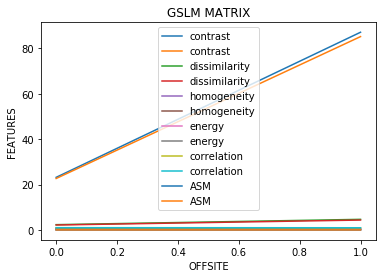

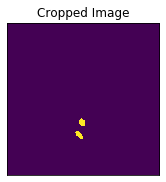

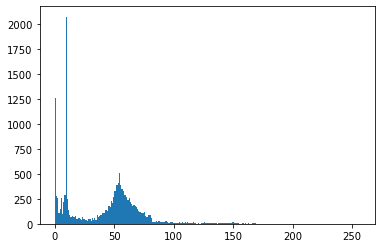

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[22.01500984 12.90637303]
 [82.25533234 48.046813  ]]
the dissimilarity of the images is  [[2.68663878 1.94537402]
 [5.37289187 3.86960565]]
the homogeneity of the images is  [[0.48905345 0.58545167]
 [0.3416451  0.47441857]]
the energy of the images is  [[0.13607327 0.1519329 ]
 [0.11804793 0.14433244]]
the correlation of the images is  [[0.13607327 0.1519329 ]
 [0.11804793 0.14433244]]
the ASM of the images is  [[0.01851593 0.02308361]
 [0.01393531 0.02083185]]


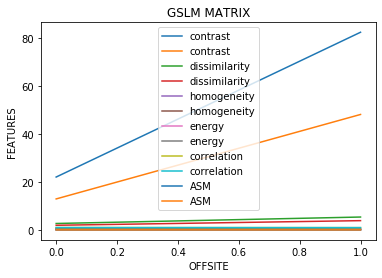

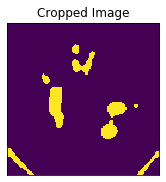

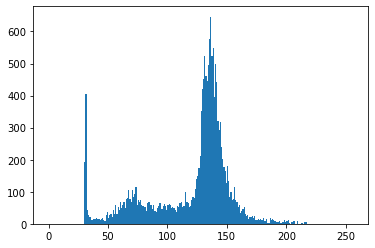

[[31 31 31 ... 31 31 31]
 [31 31 31 ... 31 31 31]
 [31 31 31 ... 31 31 31]
 ...
 [31 31 31 ... 30 30 30]
 [31 31 31 ... 30 30 30]
 [31 31 31 ... 30 30 30]]
the contrast of the images is  [[ 40.65120571  30.40649606]
 [152.51903522 114.42007688]]
the dissimilarity of the images is  [[3.82898622 3.21542815]
 [7.59356399 6.37320188]]
the homogeneity of the images is  [[0.39654218 0.43777097]
 [0.25257743 0.29207012]]
the energy of the images is  [[0.05500022 0.05946363]
 [0.04058258 0.04474498]]
the correlation of the images is  [[0.05500022 0.05946363]
 [0.04058258 0.04474498]]
the ASM of the images is  [[0.00302502 0.00353592]
 [0.00164695 0.00200211]]


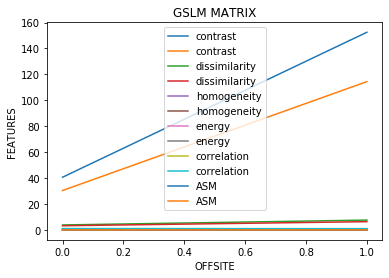

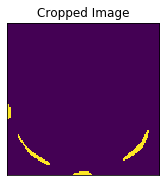

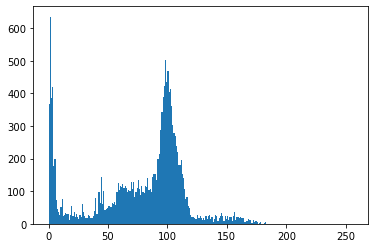

[[88 88 96 ... 46 46 46]
 [87 88 90 ... 44 44 44]
 [78 80 85 ... 44 44 44]
 ...
 [ 3  3  4 ...  3  3  3]
 [ 4  4  4 ...  4  4  4]
 [ 5  5  5 ...  5  5  5]]
the contrast of the images is  [[ 54.81859006  45.12592274]
 [207.25111607 170.54960317]]
the dissimilarity of the images is  [[3.9031127  3.75043061]
 [7.79737103 7.47842262]]
the homogeneity of the images is  [[0.46704844 0.42737096]
 [0.33201028 0.28327613]]
the energy of the images is  [[0.06400125 0.0595959 ]
 [0.05169774 0.04650403]]
the correlation of the images is  [[0.06400125 0.0595959 ]
 [0.05169774 0.04650403]]
the ASM of the images is  [[0.00409616 0.00355167]
 [0.00267266 0.00216262]]


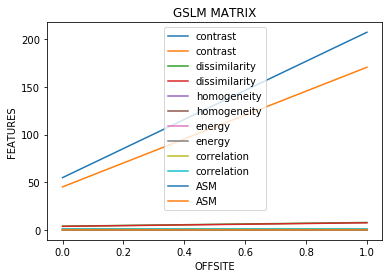

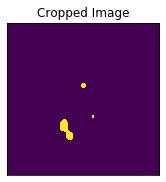

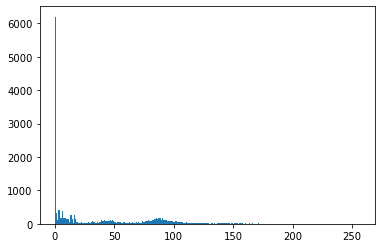

[[21 21 18 ... 17 20 20]
 [21 19 16 ... 15 18 20]
 [20 18 15 ... 14 17 18]
 ...
 [39 35 33 ... 33 36 40]
 [42 40 38 ... 39 41 43]
 [44 42 39 ... 40 43 45]]
the contrast of the images is  [[17.07554134 12.66849163]
 [63.51618304 47.38833085]]
the dissimilarity of the images is  [[2.18799213 1.80148868]
 [4.33116319 3.57087054]]
the homogeneity of the images is  [[0.6018027  0.63522095]
 [0.52298415 0.55279683]]
the energy of the images is  [[0.36905996 0.37010177]
 [0.3579954  0.3602172 ]]
the correlation of the images is  [[0.36905996 0.37010177]
 [0.3579954  0.3602172 ]]
the ASM of the images is  [[0.13620525 0.13697532]
 [0.12816071 0.12975643]]


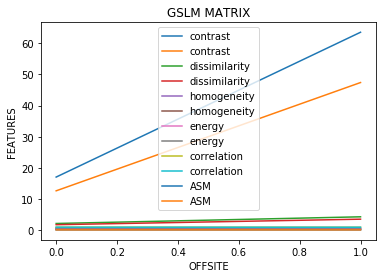

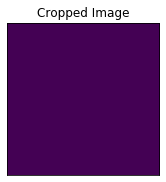

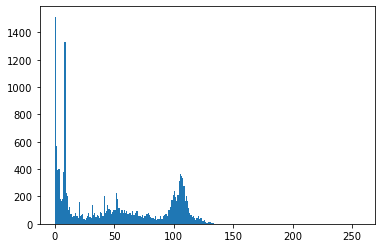

[[31 30 29 ... 60 65 67]
 [26 26 25 ... 57 61 65]
 [21 20 20 ... 55 57 61]
 ...
 [ 4  4  3 ... 32 42 51]
 [ 5  4  4 ... 32 42 52]
 [ 5  5  4 ... 32 43 52]]
the contrast of the images is  [[17.70958415  6.18171752]
 [65.67051091 23.04817708]]
the dissimilarity of the images is  [[2.46216781 1.36823327]
 [4.86631944 2.70876736]]
the homogeneity of the images is  [[0.52146544 0.6386421 ]
 [0.3817043  0.52529461]]
the energy of the images is  [[0.11677177 0.13520693]
 [0.10004596 0.12760149]]
the correlation of the images is  [[0.11677177 0.13520693]
 [0.10004596 0.12760149]]
the ASM of the images is  [[0.01363565 0.01828091]
 [0.01000919 0.01628214]]


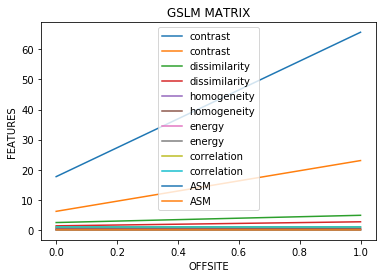

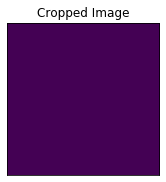

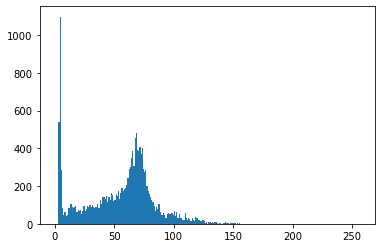

[[4 4 4 ... 4 4 4]
 [4 4 4 ... 4 4 4]
 [4 4 4 ... 4 4 4]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]
the contrast of the images is  [[ 28.49852362  28.24421752]
 [107.89825149 106.72358631]]
the dissimilarity of the images is  [[3.2230561  3.06988189]
 [6.43508185 6.11966766]]
the homogeneity of the images is  [[0.4366137  0.4652047 ]
 [0.30153333 0.32876426]]
the energy of the images is  [[0.07843042 0.07817469]
 [0.06635808 0.0649602 ]]
the correlation of the images is  [[0.07843042 0.07817469]
 [0.06635808 0.0649602 ]]
the ASM of the images is  [[0.00615133 0.00611128]
 [0.00440339 0.00421983]]


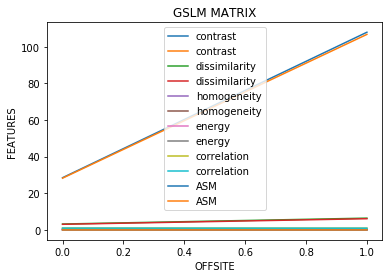

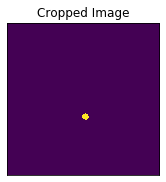

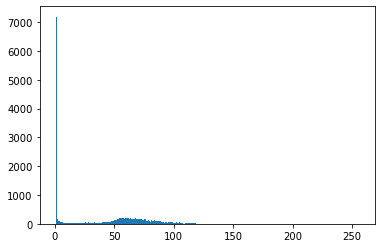

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
the contrast of the images is  [[26.34338091 14.04330709]
 [97.38268849 52.39112103]]
the dissimilarity of the images is  [[2.59854823 1.86441929]
 [5.19432044 3.71614583]]
the homogeneity of the images is  [[0.60553755 0.63585008]
 [0.51727603 0.54633856]]
the energy of the images is  [[0.42796671 0.43189847]
 [0.41598826 0.42393909]]
the correlation of the images is  [[0.42796671 0.43189847]
 [0.41598826 0.42393909]]
the ASM of the images is  [[0.1831555  0.18653628]
 [0.17304623 0.17972435]]


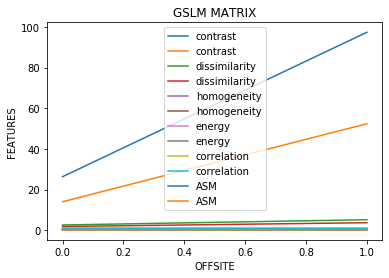

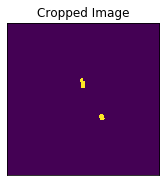

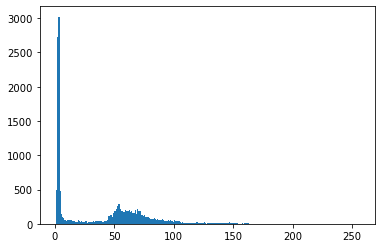

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
the contrast of the images is  [[15.41178642  8.73874262]
 [58.62617808 33.02591766]]
the dissimilarity of the images is  [[2.14406988 1.55173474]
 [4.28714038 3.09263393]]
the homogeneity of the images is  [[0.58364099 0.6359712 ]
 [0.48339695 0.53271409]]
the energy of the images is  [[0.23419173 0.23990639]
 [0.21593496 0.22679653]]
the correlation of the images is  [[0.23419173 0.23990639]
 [0.21593496 0.22679653]]
the ASM of the images is  [[0.05484576 0.05755507]
 [0.0466279  0.05143667]]


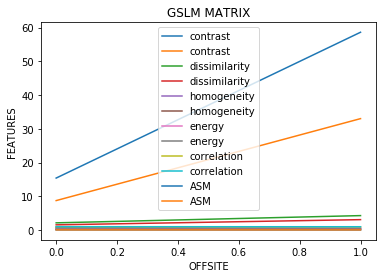

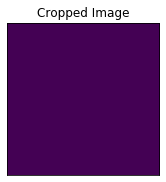

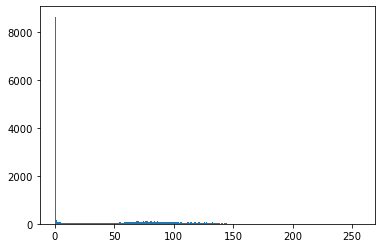

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 36.5828002   28.4710876 ]
 [135.75905258 106.13454861]]
the dissimilarity of the images is  [[3.06828248 2.6363189 ]
 [6.13058036 5.25706845]]
the homogeneity of the images is  [[0.62589745 0.63738326]
 [0.5651097  0.57619234]]
the energy of the images is  [[0.51837124 0.5193009 ]
 [0.50794977 0.50980356]]
the correlation of the images is  [[0.51837124 0.5193009 ]
 [0.50794977 0.50980356]]
the ASM of the images is  [[0.26870874 0.26967343]
 [0.25801297 0.25989967]]


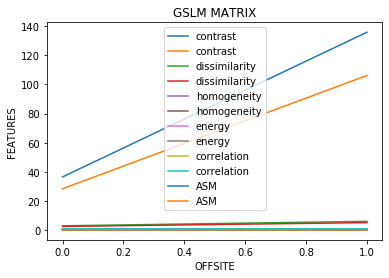

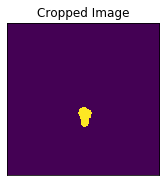

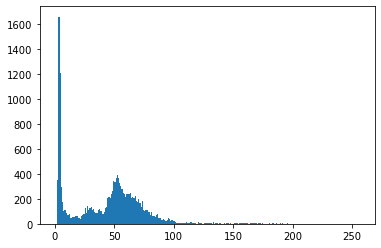

[[3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]
the contrast of the images is  [[16.36552657 13.24261811]
 [61.05381944 49.63963294]]
the dissimilarity of the images is  [[2.3836122  2.23818898]
 [4.74441964 4.45808532]]
the homogeneity of the images is  [[0.49343999 0.49721479]
 [0.36154595 0.36662828]]
the energy of the images is  [[0.12123907 0.11784915]
 [0.10868396 0.1035277 ]]
the correlation of the images is  [[0.12123907 0.11784915]
 [0.10868396 0.1035277 ]]
the ASM of the images is  [[0.01469891 0.01388842]
 [0.0118122  0.01071798]]


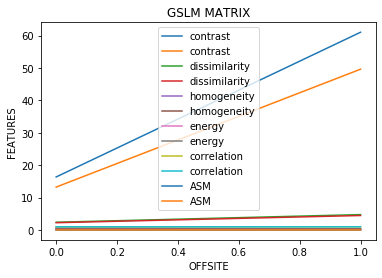

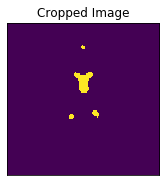

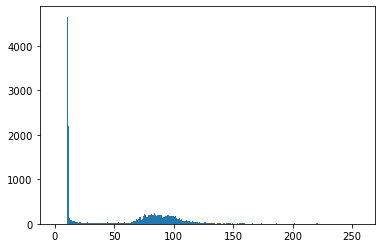

[[10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 ...
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]]
the contrast of the images is  [[ 30.74126476  24.57351132]
 [114.78602431  91.12915427]]
the dissimilarity of the images is  [[2.83403051 2.39290108]
 [5.64949157 4.76605903]]
the homogeneity of the images is  [[0.57765693 0.60780679]
 [0.48519425 0.5109422 ]]
the energy of the images is  [[0.2977261  0.30116139]
 [0.28103294 0.2883756 ]]
the correlation of the images is  [[0.2977261  0.30116139]
 [0.28103294 0.2883756 ]]
the ASM of the images is  [[0.08864083 0.09069818]
 [0.07897951 0.08316049]]


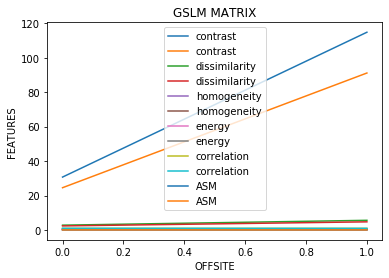

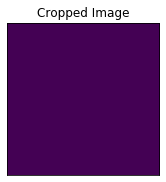

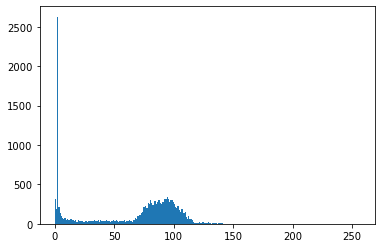

[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[15.9406373  17.32664862]
 [61.22321429 65.49355159]]
the dissimilarity of the images is  [[2.4789001  2.46419783]
 [4.95734127 4.92311508]]
the homogeneity of the images is  [[0.47349673 0.48375968]
 [0.34520672 0.34800321]]
the energy of the images is  [[0.15468451 0.15599867]
 [0.14237866 0.14671445]]
the correlation of the images is  [[0.15468451 0.15599867]
 [0.14237866 0.14671445]]
the ASM of the images is  [[0.0239273  0.02433559]
 [0.02027168 0.02152513]]


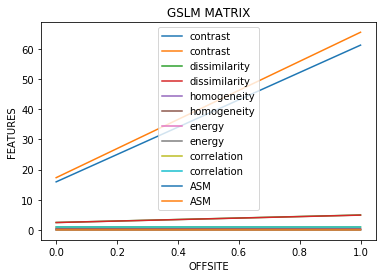

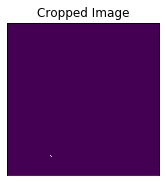

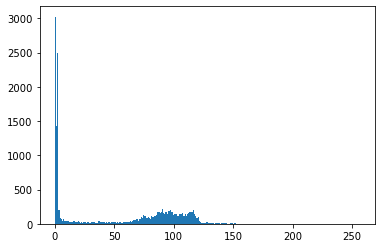

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 34.21653543  30.43153297]
 [129.94109623 115.0250496 ]]
the dissimilarity of the images is  [[2.82738681 2.49932333]
 [5.66889881 4.99727183]]
the homogeneity of the images is  [[0.57689846 0.61729668]
 [0.47224198 0.52328608]]
the energy of the images is  [[0.23004985 0.24495494]
 [0.20825979 0.23535148]]
the correlation of the images is  [[0.23004985 0.24495494]
 [0.20825979 0.23535148]]
the ASM of the images is  [[0.05292293 0.06000292]
 [0.04337214 0.05539032]]


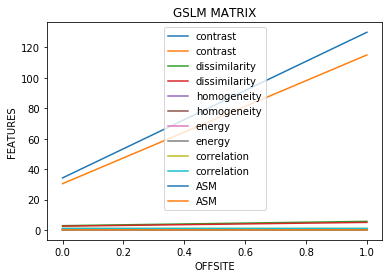

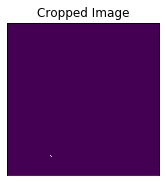

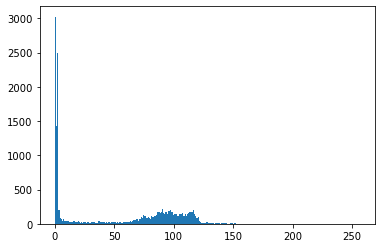

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 34.21653543  30.43153297]
 [129.94109623 115.0250496 ]]
the dissimilarity of the images is  [[2.82738681 2.49932333]
 [5.66889881 4.99727183]]
the homogeneity of the images is  [[0.57689846 0.61729668]
 [0.47224198 0.52328608]]
the energy of the images is  [[0.23004985 0.24495494]
 [0.20825979 0.23535148]]
the correlation of the images is  [[0.23004985 0.24495494]
 [0.20825979 0.23535148]]
the ASM of the images is  [[0.05292293 0.06000292]
 [0.04337214 0.05539032]]


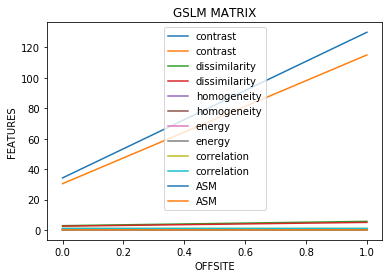

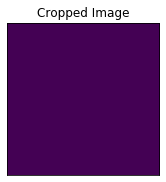

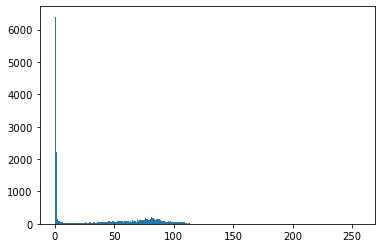

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[26.34338091 10.71770423]
 [97.18167163 39.71347966]]
the dissimilarity of the images is  [[2.43380906 1.32314222]
 [4.87896825 2.62208581]]
the homogeneity of the images is  [[0.65618113 0.72192649]
 [0.57334002 0.64335365]]
the energy of the images is  [[0.39722505 0.41259051]
 [0.38126854 0.41121301]]
the correlation of the images is  [[0.39722505 0.41259051]
 [0.38126854 0.41121301]]
the ASM of the images is  [[0.15778774 0.17023093]
 [0.1453657  0.16909614]]


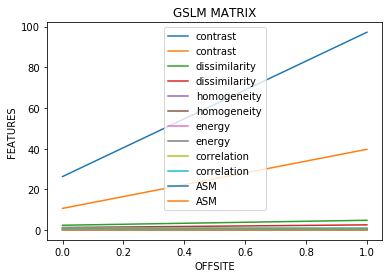

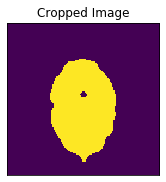

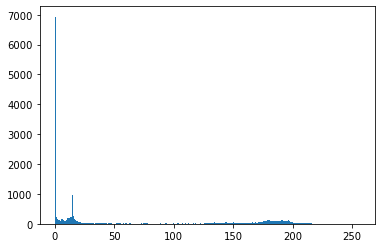

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 37.1855315   19.19082185]
 [144.57080853  73.71347966]]
the dissimilarity of the images is  [[2.59830217 1.68626969]
 [5.21899802 3.3796503 ]]
the homogeneity of the images is  [[0.64724838 0.72216342]
 [0.57419255 0.64676014]]
the energy of the images is  [[0.41504776 0.42715423]
 [0.40194156 0.42571918]]
the correlation of the images is  [[0.41504776 0.42715423]
 [0.40194156 0.42571918]]
the ASM of the images is  [[0.17226464 0.18246073]
 [0.16155702 0.18123682]]


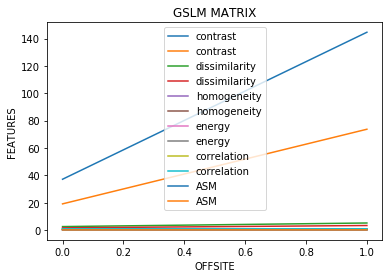

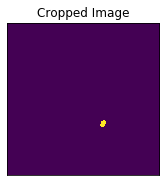

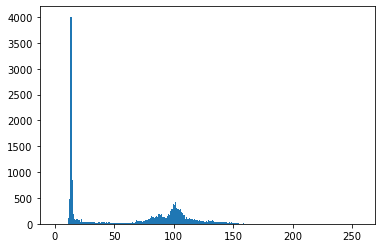

[[18 18 18 ... 12 12 12]
 [18 19 19 ... 12 12 12]
 [19 19 19 ... 12 12 12]
 ...
 [34 35 35 ... 11 11 11]
 [30 31 31 ... 11 11 11]
 [29 30 30 ... 11 11 11]]
the contrast of the images is  [[ 29.40434301  20.89000984]
 [110.28143601  78.85528274]]
the dissimilarity of the images is  [[2.66861467 2.1761811 ]
 [5.34232391 4.34672619]]
the homogeneity of the images is  [[0.56740716 0.59147973]
 [0.44996019 0.47373074]]
the energy of the images is  [[0.23659512 0.23957332]
 [0.21995947 0.22544203]]
the correlation of the images is  [[0.23659512 0.23957332]
 [0.21995947 0.22544203]]
the ASM of the images is  [[0.05597725 0.05739538]
 [0.04838217 0.05082411]]


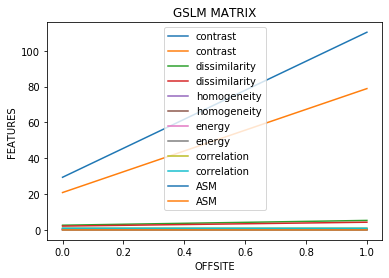

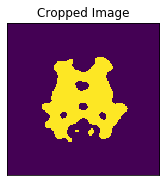

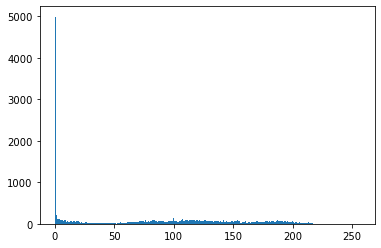

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 5 4 4]
 [0 0 0 ... 4 4 3]
 [0 0 0 ... 4 3 3]]
the contrast of the images is  [[ 46.0066437   43.36023622]
 [173.62090774 163.43359375]]
the dissimilarity of the images is  [[3.84940945 3.79859744]
 [7.70324901 7.58984375]]
the homogeneity of the images is  [[0.47787623 0.47885721]
 [0.38880689 0.38661105]]
the energy of the images is  [[0.29317446 0.29409523]
 [0.28075506 0.28268801]]
the correlation of the images is  [[0.29317446 0.29409523]
 [0.28075506 0.28268801]]
the ASM of the images is  [[0.08595127 0.086492  ]
 [0.0788234  0.07991251]]


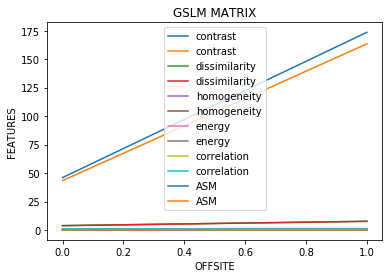

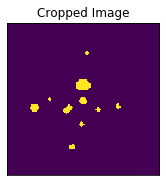

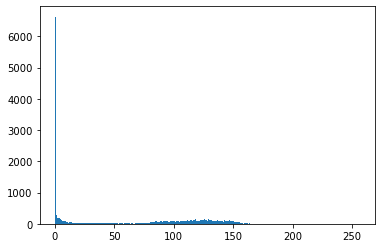

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 34.2078002   36.0070128 ]
 [131.71639385 137.93303571]]
the dissimilarity of the images is  [[2.98794291 3.10014764]
 [5.97420635 6.19605655]]
the homogeneity of the images is  [[0.56795896 0.5657016 ]
 [0.48513648 0.48496039]]
the energy of the images is  [[0.39384707 0.39345941]
 [0.3821765  0.38141245]]
the correlation of the images is  [[0.39384707 0.39345941]
 [0.3821765  0.38141245]]
the ASM of the images is  [[0.15511551 0.15481031]
 [0.14605888 0.14547545]]


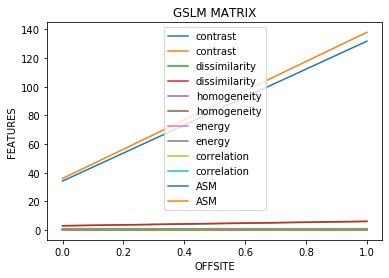

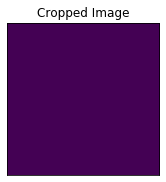

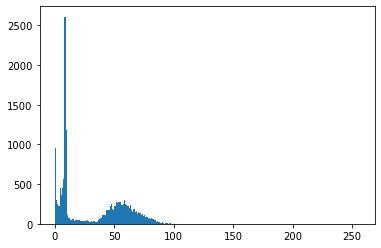

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 7.80893209  5.98665108]
 [29.73611111 22.61966766]]
the dissimilarity of the images is  [[1.53334154 1.2152436 ]
 [3.07118056 2.43402778]]
the homogeneity of the images is  [[0.59421866 0.66294708]
 [0.4551592  0.53375374]]
the energy of the images is  [[0.16650707 0.17540625]
 [0.14609799 0.16009302]]
the correlation of the images is  [[0.16650707 0.17540625]
 [0.14609799 0.16009302]]
the ASM of the images is  [[0.0277246  0.03076735]
 [0.02134462 0.02562978]]


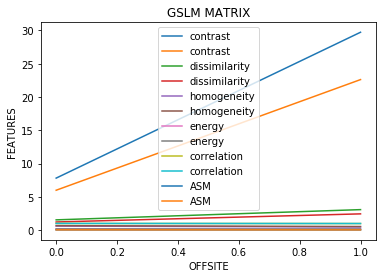

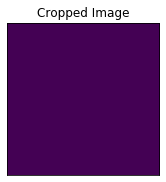

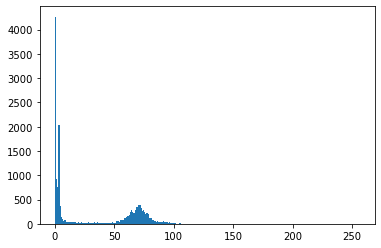

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[12.96665846 11.86220472]
 [49.55729167 45.13392857]]
the dissimilarity of the images is  [[1.58378445 1.40145177]
 [3.17757937 2.80877976]]
the homogeneity of the images is  [[0.6853833  0.71286686]
 [0.57725076 0.60685039]]
the energy of the images is  [[0.27867725 0.28572152]
 [0.26046923 0.27235751]]
the correlation of the images is  [[0.27867725 0.28572152]
 [0.26046923 0.27235751]]
the ASM of the images is  [[0.07766101 0.08163679]
 [0.06784422 0.07417861]]


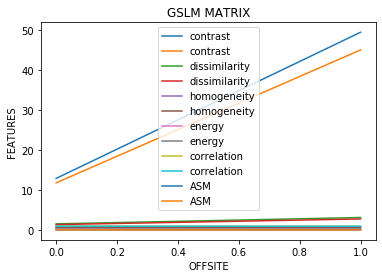

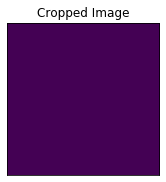

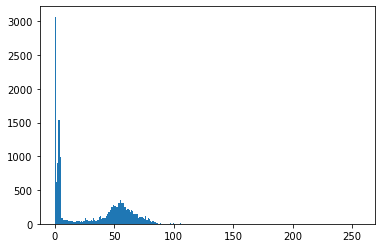

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[10.3836122   9.8078248 ]
 [38.65432788 36.4358879 ]]
the dissimilarity of the images is  [[1.71899606 1.54441437]
 [3.43297371 3.07899306]]
the homogeneity of the images is  [[0.60691872 0.63508629]
 [0.48353695 0.50943131]]
the energy of the images is  [[0.20694476 0.20853614]
 [0.18888611 0.19193181]]
the correlation of the images is  [[0.20694476 0.20853614]
 [0.18888611 0.19193181]]
the ASM of the images is  [[0.04282614 0.04348732]
 [0.03567796 0.03683782]]


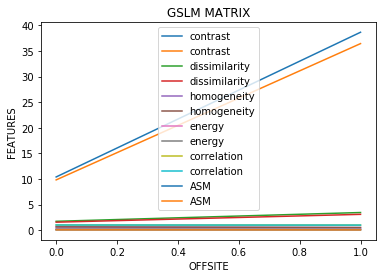

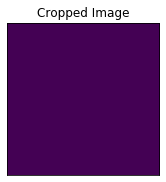

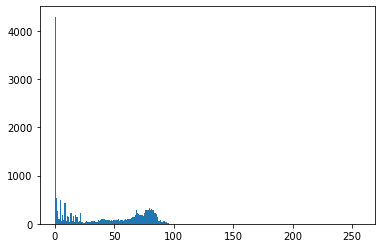

[[24 24 21 ... 22 26 26]
 [24 22 19 ... 21 24 26]
 [22 20 17 ... 19 22 24]
 ...
 [44 40 37 ... 39 42 44]
 [47 45 42 ... 43 46 48]
 [49 47 44 ... 46 48 50]]
the contrast of the images is  [[17.76999262 14.02380659]
 [65.45027282 52.01432292]]
the dissimilarity of the images is  [[2.19605069 1.86743356]
 [4.34499008 3.69425843]]
the homogeneity of the images is  [[0.57813732 0.61288855]
 [0.4690038  0.50703383]]
the energy of the images is  [[0.25413797 0.25790843]
 [0.24083377 0.24745122]]
the correlation of the images is  [[0.25413797 0.25790843]
 [0.24083377 0.24745122]]
the ASM of the images is  [[0.06458611 0.06651676]
 [0.0580009  0.06123211]]


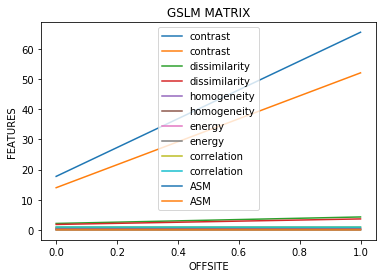

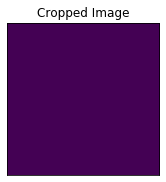

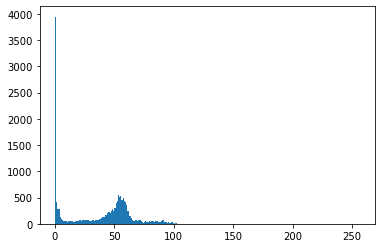

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[12.81108514  9.9461122 ]
 [48.62946429 37.04718502]]
the dissimilarity of the images is  [[1.88699557 1.53186516]
 [3.77591766 3.05065724]]
the homogeneity of the images is  [[0.58862079 0.63533826]
 [0.45929369 0.51013793]]
the energy of the images is  [[0.23425582 0.24099184]
 [0.21923748 0.2312358 ]]
the correlation of the images is  [[0.23425582 0.24099184]
 [0.21923748 0.2312358 ]]
the ASM of the images is  [[0.05487579 0.05807707]
 [0.04806507 0.05346999]]


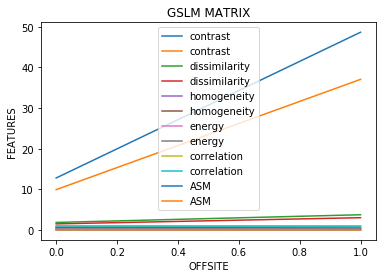

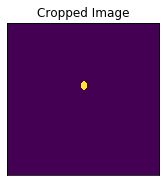

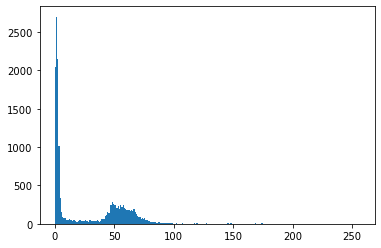

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 9.61306594  6.8113312 ]
 [36.05505952 25.35745288]]
the dissimilarity of the images is  [[1.60002461 1.26174951]
 [3.19717262 2.52077133]]
the homogeneity of the images is  [[0.62948038 0.67404263]
 [0.51816075 0.55868598]]
the energy of the images is  [[0.2204053  0.22136248]
 [0.19086486 0.19323593]]
the correlation of the images is  [[0.2204053  0.22136248]
 [0.19086486 0.19323593]]
the ASM of the images is  [[0.0485785  0.04900135]
 [0.03642939 0.03734012]]


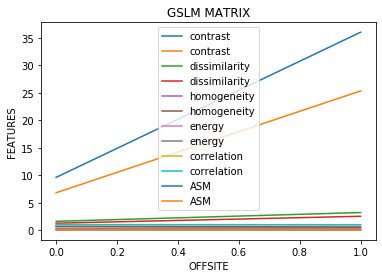

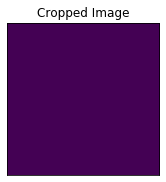

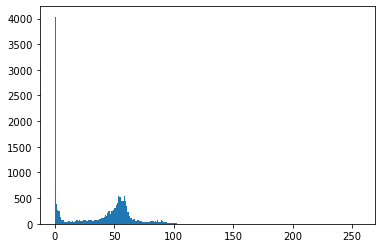

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[12.93823819 10.09012057]
 [49.10844494 37.58730159]]
the dissimilarity of the images is  [[1.89985236 1.54669045]
 [3.80040923 3.08097718]]
the homogeneity of the images is  [[0.58793518 0.63398871]
 [0.46056508 0.508548  ]]
the energy of the images is  [[0.2394119  0.24586477]
 [0.22446386 0.23617532]]
the correlation of the images is  [[0.2394119  0.24586477]
 [0.22446386 0.23617532]]
the ASM of the images is  [[0.05731806 0.06044949]
 [0.05038402 0.05577878]]


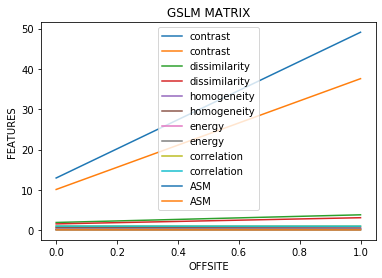

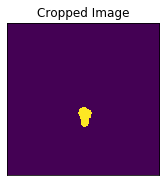

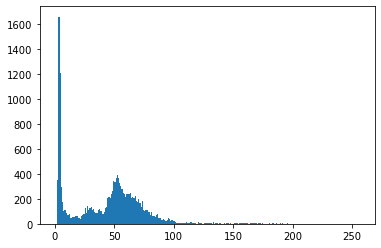

[[3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]
the contrast of the images is  [[16.36552657 13.24261811]
 [61.05381944 49.63963294]]
the dissimilarity of the images is  [[2.3836122  2.23818898]
 [4.74441964 4.45808532]]
the homogeneity of the images is  [[0.49343999 0.49721479]
 [0.36154595 0.36662828]]
the energy of the images is  [[0.12123907 0.11784915]
 [0.10868396 0.1035277 ]]
the correlation of the images is  [[0.12123907 0.11784915]
 [0.10868396 0.1035277 ]]
the ASM of the images is  [[0.01469891 0.01388842]
 [0.0118122  0.01071798]]


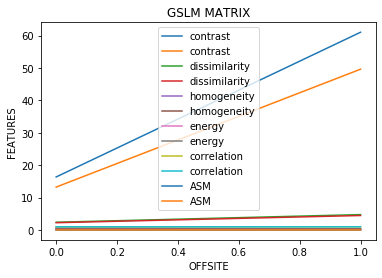

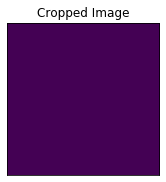

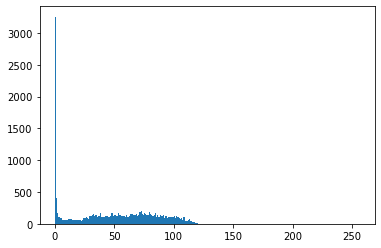

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[11.91455463 10.17710384]
 [44.77635169 38.17745536]]
the dissimilarity of the images is  [[2.23037648 2.06268455]
 [4.45901538 4.11904762]]
the homogeneity of the images is  [[0.48425865 0.49607088]
 [0.35377677 0.36621153]]
the energy of the images is  [[0.18817851 0.19279341]
 [0.17450862 0.18349946]]
the correlation of the images is  [[0.18817851 0.19279341]
 [0.17450862 0.18349946]]
the ASM of the images is  [[0.03541115 0.0371693 ]
 [0.03045326 0.03367205]]


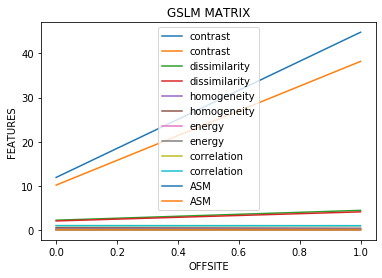

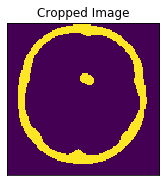

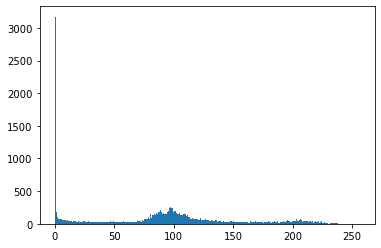

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 94.78629429  79.92845719]
 [367.74578373 307.95994544]]
the dissimilarity of the images is  [[ 5.28297244  4.78721703]
 [10.61135913  9.59672619]]
the homogeneity of the images is  [[0.41707363 0.43246144]
 [0.30322411 0.32406832]]
the energy of the images is  [[0.18116083 0.18639175]
 [0.16741838 0.17697277]]
the correlation of the images is  [[0.18116083 0.18639175]
 [0.16741838 0.17697277]]
the ASM of the images is  [[0.03281925 0.03474188]
 [0.02802891 0.03131936]]


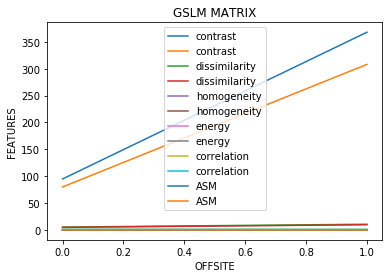

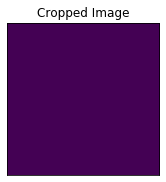

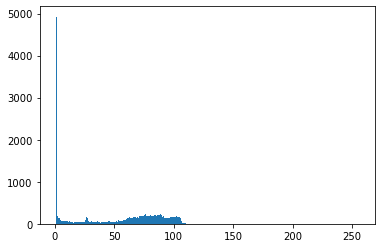

[[28 27 25 ...  1  1  1]
 [27 25 25 ...  1  1  1]
 [25 25 20 ...  1  1  1]
 ...
 [30 30 30 ...  1  1  1]
 [30 30 32 ...  1  1  1]
 [30 32 32 ...  1  1  1]]
the contrast of the images is  [[20.87543061 16.85451526]
 [79.18712798 63.29774306]]
the dissimilarity of the images is  [[2.52983514 2.19457431]
 [5.06597222 4.37574405]]
the homogeneity of the images is  [[0.5400458  0.56478515]
 [0.43167189 0.45770265]]
the energy of the images is  [[0.28861993 0.294373  ]
 [0.27455813 0.28605497]]
the correlation of the images is  [[0.28861993 0.294373  ]
 [0.27455813 0.28605497]]
the ASM of the images is  [[0.08330147 0.08665546]
 [0.07538217 0.08182745]]


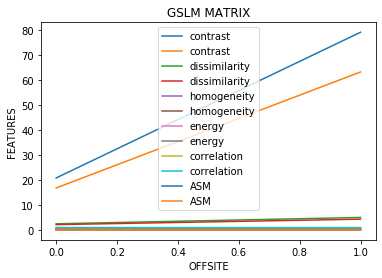

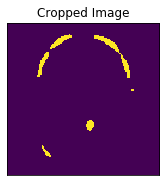

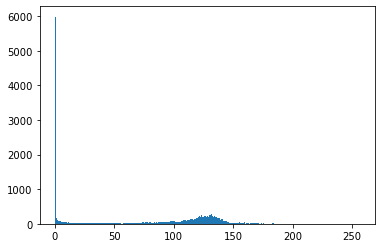

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 67.01906988  54.31871309]
 [253.24144345 204.6703869 ]]
the dissimilarity of the images is  [[3.84042815 3.29226132]
 [7.7016369  6.59771825]]
the homogeneity of the images is  [[0.5680196  0.5893782 ]
 [0.47075792 0.49183247]]
the energy of the images is  [[0.3533239  0.35662085]
 [0.33991274 0.34648821]]
the correlation of the images is  [[0.3533239  0.35662085]
 [0.33991274 0.34648821]]
the ASM of the images is  [[0.12483778 0.12717843]
 [0.11554067 0.12005408]]


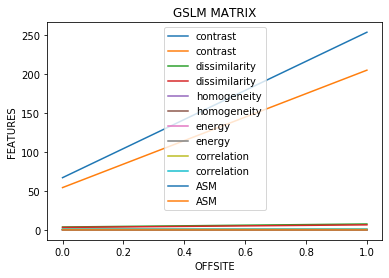

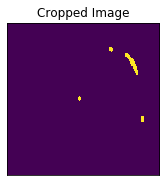

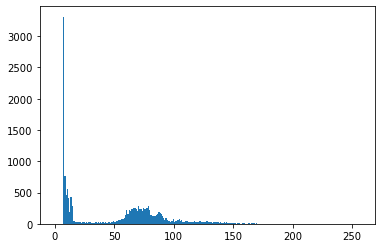

[[18 17 16 ... 15 17 17]
 [17 16 15 ... 15 16 17]
 [16 15 14 ... 14 15 15]
 ...
 [14 13 13 ... 13 14 14]
 [14 14 13 ... 13 14 15]
 [15 14 14 ... 14 15 15]]
the contrast of the images is  [[ 40.78610974  35.56877461]
 [154.67702133 135.25527034]]
the dissimilarity of the images is  [[3.11398868 2.89972933]
 [6.22798859 5.80016121]]
the homogeneity of the images is  [[0.52830659 0.55986078]
 [0.41067213 0.43964792]]
the energy of the images is  [[0.19804185 0.19853176]
 [0.18638742 0.18591161]]
the correlation of the images is  [[0.19804185 0.19853176]
 [0.18638742 0.18591161]]
the ASM of the images is  [[0.03922057 0.03941486]
 [0.03474027 0.03456313]]


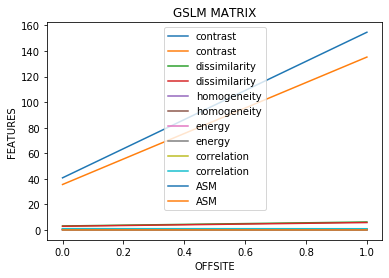

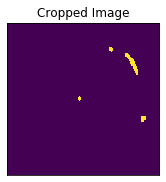

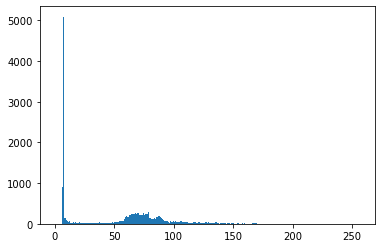

[[6 6 6 ... 6 6 6]
 [6 6 6 ... 6 6 6]
 [6 6 6 ... 6 6 6]
 ...
 [6 6 6 ... 6 6 6]
 [6 6 6 ... 6 6 6]
 [6 6 6 ... 6 6 6]]
the contrast of the images is  [[ 40.9554626   35.85322343]
 [155.44103423 136.33420139]]
the dissimilarity of the images is  [[3.02817421 2.84116634]
 [6.06839038 5.69642857]]
the homogeneity of the images is  [[0.57209083 0.59282742]
 [0.47285062 0.48240885]]
the energy of the images is  [[0.30455301 0.30226774]
 [0.29210573 0.28808653]]
the correlation of the images is  [[0.30455301 0.30226774]
 [0.29210573 0.28808653]]
the ASM of the images is  [[0.09275254 0.09136579]
 [0.08532576 0.08299385]]


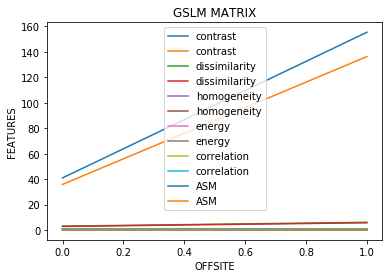

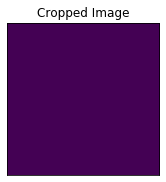

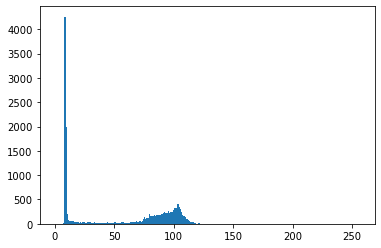

[[8 8 8 ... 9 9 9]
 [8 8 8 ... 9 9 9]
 [8 8 8 ... 9 9 9]
 ...
 [8 8 8 ... 8 8 8]
 [9 9 9 ... 8 8 8]
 [9 9 9 ... 8 8 8]]
the contrast of the images is  [[21.17931841 18.08864419]
 [80.31845238 68.58339534]]
the dissimilarity of the images is  [[2.29152313 2.00670522]
 [4.59176587 4.01729911]]
the homogeneity of the images is  [[0.59289177 0.61745105]
 [0.48258079 0.49987434]]
the energy of the images is  [[0.26860182 0.26552227]
 [0.25046182 0.24405757]]
the correlation of the images is  [[0.26860182 0.26552227]
 [0.25046182 0.24405757]]
the ASM of the images is  [[0.07214694 0.07050207]
 [0.06273112 0.0595641 ]]


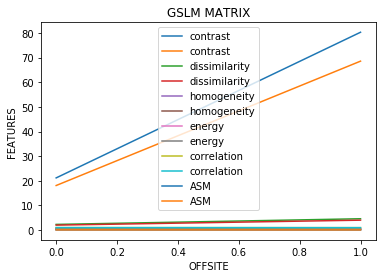

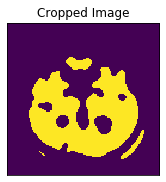

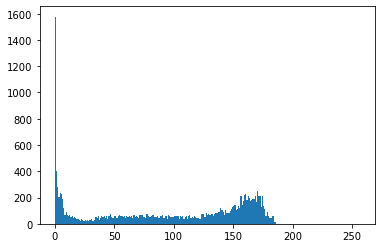

[[ 7  6  5 ...  0  0  0]
 [ 7  6  5 ...  0  0  0]
 [ 7  6  5 ...  0  0  0]
 ...
 [ 8  8  7 ...  3  3  3]
 [ 9  9  8 ...  4  4  4]
 [10  9  8 ...  5  5  5]]
the contrast of the images is  [[ 63.23455955  55.26574803]
 [238.20665923 207.45548115]]
the dissimilarity of the images is  [[4.61078986 4.34965551]
 [9.22092014 8.69320437]]
the homogeneity of the images is  [[0.42111194 0.41492688]
 [0.2890504  0.28442297]]
the energy of the images is  [[0.09555495 0.09360927]
 [0.08681606 0.08238554]]
the correlation of the images is  [[0.09555495 0.09360927]
 [0.08681606 0.08238554]]
the ASM of the images is  [[0.00913075 0.0087627 ]
 [0.00753703 0.00678738]]


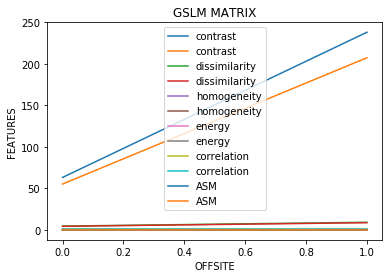

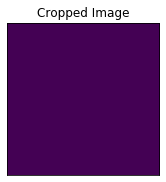

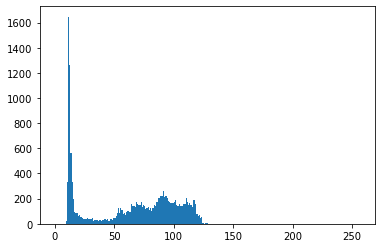

[[11 11 11 ...  9  9  9]
 [11 11 11 ...  9  9  9]
 [11 11 11 ...  9  9  9]
 ...
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]]
the contrast of the images is  [[14.23812746 12.08655266]
 [53.34802827 45.28025794]]
the dissimilarity of the images is  [[2.23025344 2.0835999 ]
 [4.45765129 4.16679067]]
the homogeneity of the images is  [[0.50969816 0.51376982]
 [0.37177325 0.37431127]]
the energy of the images is  [[0.12095038 0.11801461]
 [0.10603861 0.10106585]]
the correlation of the images is  [[0.12095038 0.11801461]
 [0.10603861 0.10106585]]
the ASM of the images is  [[0.01462899 0.01392745]
 [0.01124419 0.01021431]]


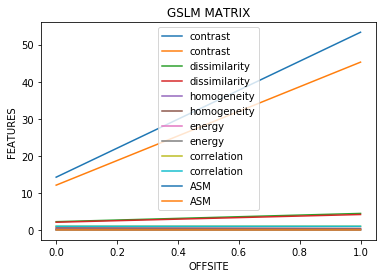

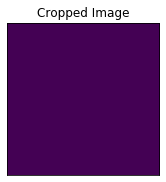

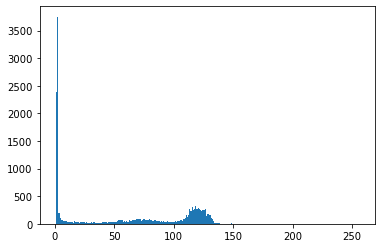

[[1 1 2 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 2 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
the contrast of the images is  [[19.54835138 14.02934301]
 [73.88151042 52.84827629]]
the dissimilarity of the images is  [[2.27595965 1.849594  ]
 [4.55586558 3.69673859]]
the homogeneity of the images is  [[0.59639897 0.62100652]
 [0.48236426 0.50496338]]
the energy of the images is  [[0.24663117 0.24779766]
 [0.22136974 0.2253621 ]]
the correlation of the images is  [[0.24663117 0.24779766]
 [0.22136974 0.2253621 ]]
the ASM of the images is  [[0.06082693 0.06140368]
 [0.04900456 0.05078807]]


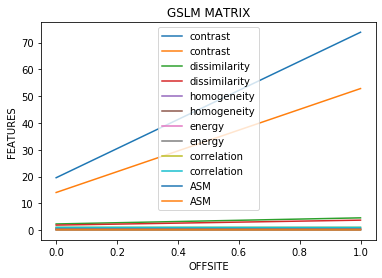

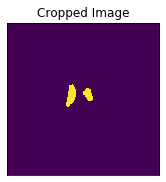

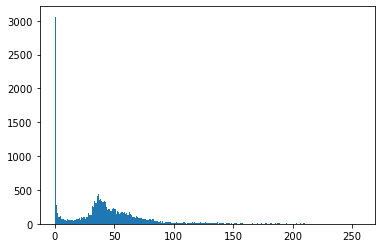

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 27.13994833  20.31711368]
 [101.63157242  76.32626488]]
the dissimilarity of the images is  [[2.99784695 2.78303396]
 [5.97730655 5.55530754]]
the homogeneity of the images is  [[0.46827424 0.47933711]
 [0.34869715 0.36144959]]
the energy of the images is  [[0.18034287 0.18010668]
 [0.16872583 0.16760936]]
the correlation of the images is  [[0.18034287 0.18010668]
 [0.16872583 0.16760936]]
the ASM of the images is  [[0.03252355 0.03243841]
 [0.0284684  0.0280929 ]]


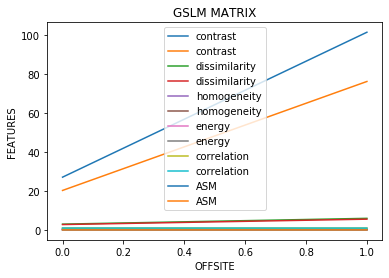

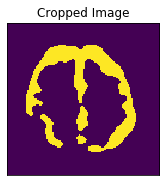

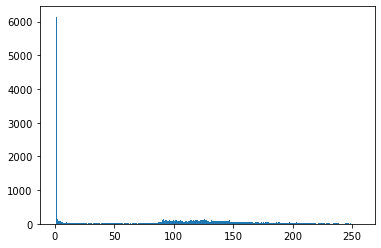

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
the contrast of the images is  [[ 59.15797244  57.39886811]
 [225.28224206 217.83221726]]
the dissimilarity of the images is  [[4.37746063 4.15255906]
 [8.76897321 8.29712302]]
the homogeneity of the images is  [[0.51394864 0.52018921]
 [0.43979213 0.44044632]]
the energy of the images is  [[0.36357619 0.36329315]
 [0.35161216 0.35101266]]
the correlation of the images is  [[0.36357619 0.36329315]
 [0.35161216 0.35101266]]
the ASM of the images is  [[0.13218764 0.13198191]
 [0.12363111 0.12320989]]


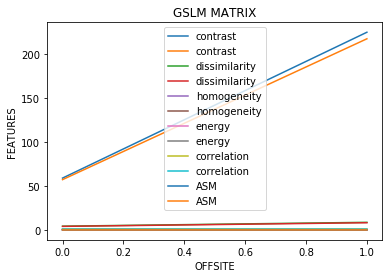

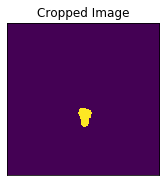

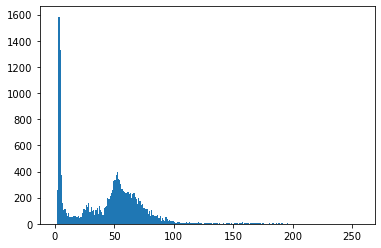

[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]
the contrast of the images is  [[16.35383858 13.15231299]
 [60.9983879  49.28311012]]
the dissimilarity of the images is  [[2.37315453 2.22650098]
 [4.72557044 4.4343998 ]]
the homogeneity of the images is  [[0.49713991 0.49944883]
 [0.36497675 0.36995137]]
the energy of the images is  [[0.12214974 0.11854709]
 [0.11004552 0.10455402]]
the correlation of the images is  [[0.12214974 0.11854709]
 [0.11004552 0.10455402]]
the ASM of the images is  [[0.01492056 0.01405341]
 [0.01211002 0.01093154]]


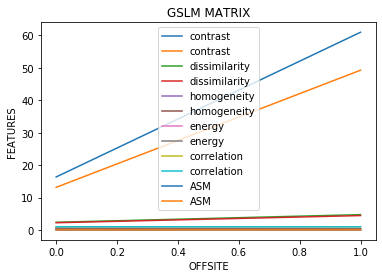

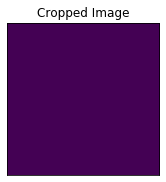

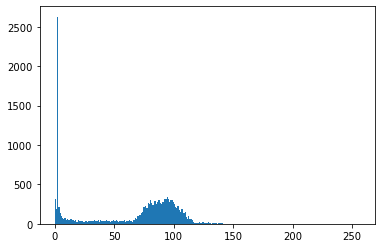

[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[15.9406373  17.32664862]
 [61.22321429 65.49355159]]
the dissimilarity of the images is  [[2.4789001  2.46419783]
 [4.95734127 4.92311508]]
the homogeneity of the images is  [[0.47349673 0.48375968]
 [0.34520672 0.34800321]]
the energy of the images is  [[0.15468451 0.15599867]
 [0.14237866 0.14671445]]
the correlation of the images is  [[0.15468451 0.15599867]
 [0.14237866 0.14671445]]
the ASM of the images is  [[0.0239273  0.02433559]
 [0.02027168 0.02152513]]


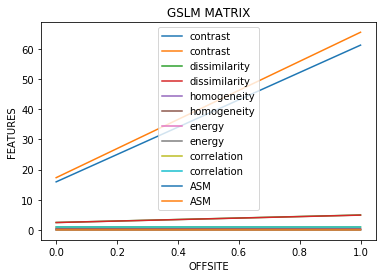

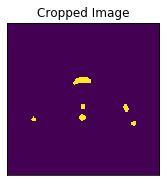

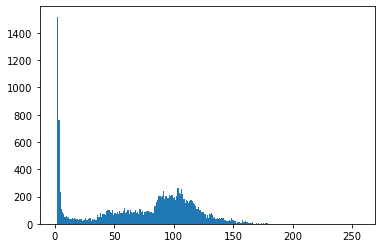

[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]
the contrast of the images is  [[ 27.74489419  26.31010089]
 [103.75204613  98.34114583]]
the dissimilarity of the images is  [[3.33692175 3.212906  ]
 [6.66065228 6.4031498 ]]
the homogeneity of the images is  [[0.40776673 0.41875932]
 [0.27837239 0.287753  ]]
the energy of the images is  [[0.09687557 0.09451119]
 [0.08623778 0.08221054]]
the correlation of the images is  [[0.09687557 0.09451119]
 [0.08623778 0.08221054]]
the ASM of the images is  [[0.00938488 0.00893237]
 [0.00743695 0.00675857]]


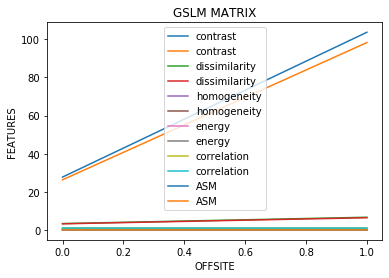

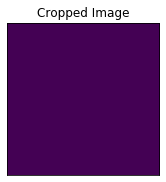

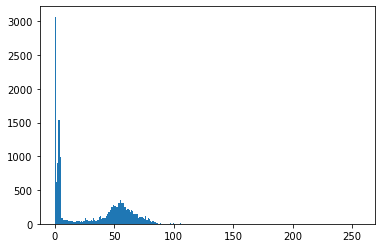

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[10.3836122   9.8078248 ]
 [38.65432788 36.4358879 ]]
the dissimilarity of the images is  [[1.71899606 1.54441437]
 [3.43297371 3.07899306]]
the homogeneity of the images is  [[0.60691872 0.63508629]
 [0.48353695 0.50943131]]
the energy of the images is  [[0.20694476 0.20853614]
 [0.18888611 0.19193181]]
the correlation of the images is  [[0.20694476 0.20853614]
 [0.18888611 0.19193181]]
the ASM of the images is  [[0.04282614 0.04348732]
 [0.03567796 0.03683782]]


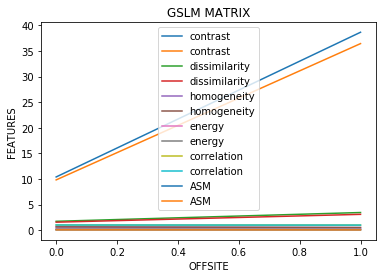

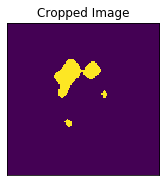

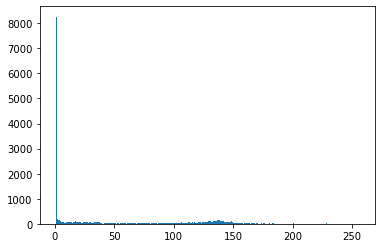

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
the contrast of the images is  [[21.43885335 16.07098917]
 [82.34176587 61.79030258]]
the dissimilarity of the images is  [[2.27177657 1.83193898]
 [4.54972718 3.67571925]]
the homogeneity of the images is  [[0.63381379 0.67810262]
 [0.56594788 0.60101264]]
the energy of the images is  [[0.49384448 0.49511433]
 [0.48288331 0.48536491]]
the correlation of the images is  [[0.49384448 0.49511433]
 [0.48288331 0.48536491]]
the ASM of the images is  [[0.24388237 0.2451382 ]
 [0.23317629 0.2355791 ]]


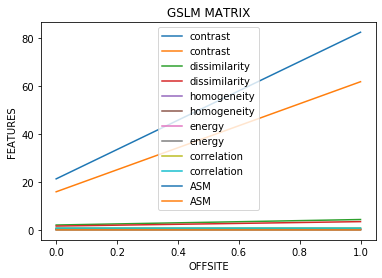

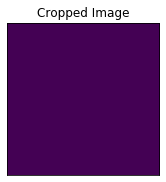

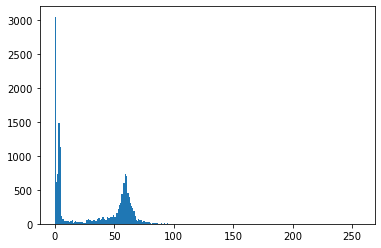

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[11.4406373  12.15643455]
 [42.52858383 45.29315476]]
the dissimilarity of the images is  [[1.55407234 1.45269439]
 [3.10906498 2.90339782]]
the homogeneity of the images is  [[0.67739768 0.70649743]
 [0.55149412 0.59087537]]
the energy of the images is  [[0.21173351 0.21421282]
 [0.19290591 0.19636014]]
the correlation of the images is  [[0.21173351 0.21421282]
 [0.19290591 0.19636014]]
the ASM of the images is  [[0.04483108 0.04588713]
 [0.03721269 0.0385573 ]]


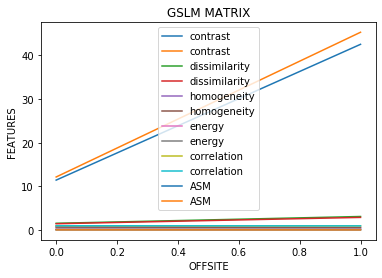

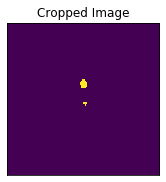

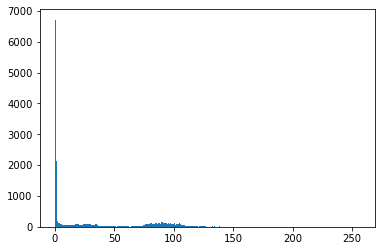

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[14.55081201 12.61897146]
 [55.16914683 47.2984871 ]]
the dissimilarity of the images is  [[1.78112697 1.60802165]
 [3.55716766 3.21453373]]
the homogeneity of the images is  [[0.67095355 0.68618717]
 [0.59449981 0.60566237]]
the energy of the images is  [[0.41461597 0.41569475]
 [0.39921763 0.40214919]]
the correlation of the images is  [[0.41461597 0.41569475]
 [0.39921763 0.40214919]]
the ASM of the images is  [[0.1719064  0.17280212]
 [0.15937472 0.16172397]]


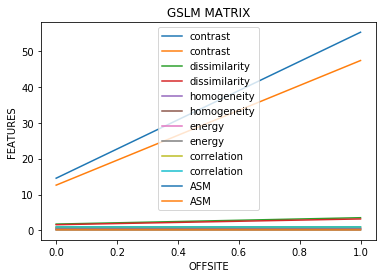

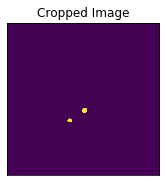

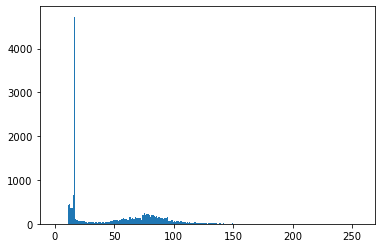

[[16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]
 ...
 [16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]]
the contrast of the images is  [[16.55942421  9.57517224]
 [61.52380952 35.37884425]]
the dissimilarity of the images is  [[2.21026083 1.63275098]
 [4.41530258 3.26029266]]
the homogeneity of the images is  [[0.58612678 0.61918375]
 [0.47388791 0.50641083]]
the energy of the images is  [[0.27640811 0.27918824]
 [0.26112802 0.26492717]]
the correlation of the images is  [[0.27640811 0.27918824]
 [0.26112802 0.26492717]]
the ASM of the images is  [[0.07640144 0.07794608]
 [0.06818785 0.07018641]]


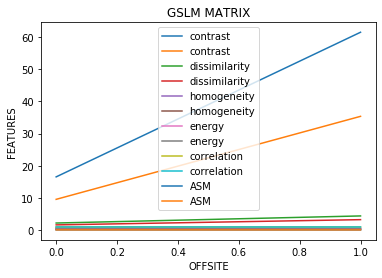

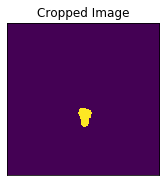

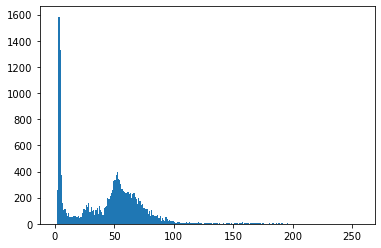

[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]
the contrast of the images is  [[16.35383858 13.15231299]
 [60.9983879  49.28311012]]
the dissimilarity of the images is  [[2.37315453 2.22650098]
 [4.72557044 4.4343998 ]]
the homogeneity of the images is  [[0.49713991 0.49944883]
 [0.36497675 0.36995137]]
the energy of the images is  [[0.12214974 0.11854709]
 [0.11004552 0.10455402]]
the correlation of the images is  [[0.12214974 0.11854709]
 [0.11004552 0.10455402]]
the ASM of the images is  [[0.01492056 0.01405341]
 [0.01211002 0.01093154]]


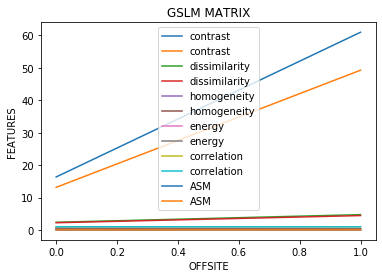

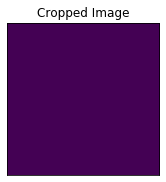

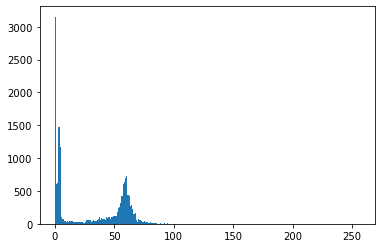

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[11.52405266 12.15335876]
 [42.82570685 45.29427083]]
the dissimilarity of the images is  [[1.55887057 1.45773868]
 [3.11972966 2.91542659]]
the homogeneity of the images is  [[0.67790357 0.70492303]
 [0.55360029 0.58827453]]
the energy of the images is  [[0.21642642 0.21854194]
 [0.19783965 0.20078824]]
the correlation of the images is  [[0.21642642 0.21854194]
 [0.19783965 0.20078824]]
the ASM of the images is  [[0.0468404  0.04776058]
 [0.03914053 0.04031592]]


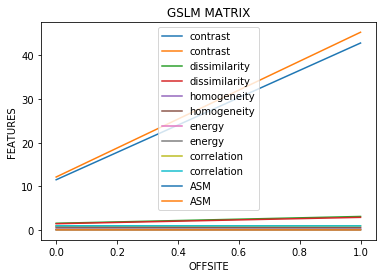

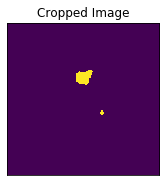

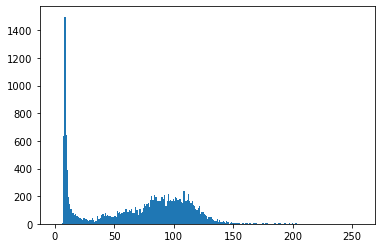

[[7 7 7 ... 7 7 7]
 [7 7 7 ... 7 7 7]
 [7 7 7 ... 7 7 7]
 ...
 [7 7 7 ... 7 7 6]
 [7 7 7 ... 6 6 6]
 [7 7 7 ... 6 6 6]]
the contrast of the images is  [[ 33.04459892  33.46167569]
 [122.97581845 123.10212054]]
the dissimilarity of the images is  [[3.49587844 3.40926427]
 [6.96924603 6.78924851]]
the homogeneity of the images is  [[0.43029637 0.44199913]
 [0.30059392 0.3102962 ]]
the energy of the images is  [[0.09909995 0.10008852]
 [0.0874619  0.08844185]]
the correlation of the images is  [[0.09909995 0.10008852]
 [0.0874619  0.08844185]]
the ASM of the images is  [[0.0098208  0.01001771]
 [0.00764958 0.00782196]]


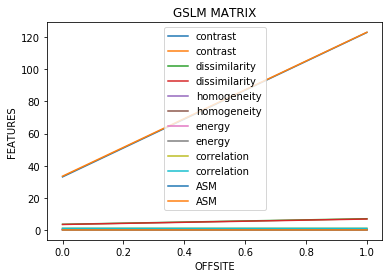

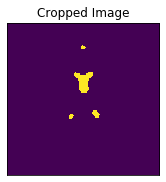

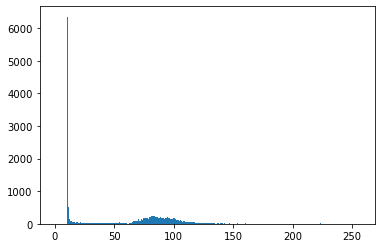

[[10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 ...
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]]
the contrast of the images is  [[ 30.94143701  24.91375492]
 [115.6421131   92.32421875]]
the dissimilarity of the images is  [[2.83870571 2.41117126]
 [5.66269841 4.79904514]]
the homogeneity of the images is  [[0.57844378 0.60785055]
 [0.48547703 0.51398033]]
the energy of the images is  [[0.37585507 0.37753044]
 [0.36265399 0.36664527]]
the correlation of the images is  [[0.37585507 0.37753044]
 [0.36265399 0.36664527]]
the ASM of the images is  [[0.14126703 0.14252923]
 [0.13151791 0.13442876]]


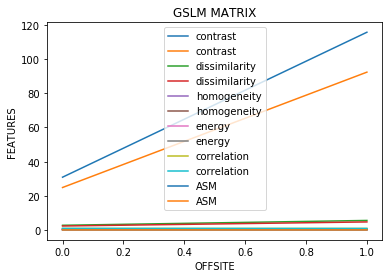

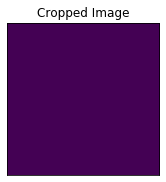

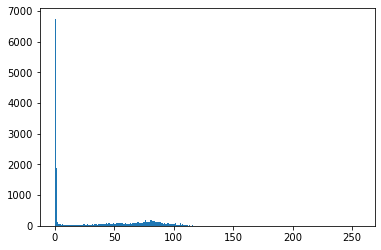

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[26.36454232 10.86072835]
 [97.16282242 40.23604911]]
the dissimilarity of the images is  [[2.43639272 1.3304626 ]
 [4.88368056 2.63609871]]
the homogeneity of the images is  [[0.65677514 0.7223193 ]
 [0.57473047 0.64390786]]
the energy of the images is  [[0.41276316 0.42717668]
 [0.39765241 0.42567752]]
the correlation of the images is  [[0.41276316 0.42717668]
 [0.39765241 0.42567752]]
the ASM of the images is  [[0.17037343 0.18247991]
 [0.15812744 0.18120135]]


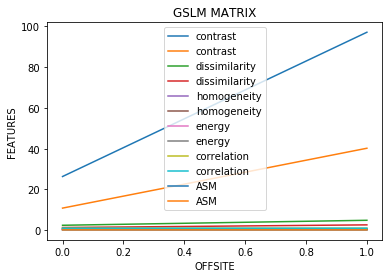

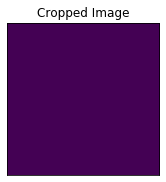

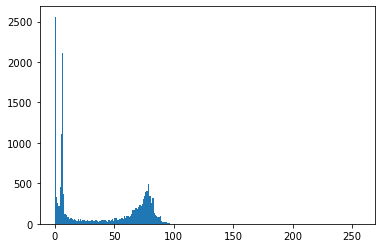

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 7.35297736  5.3402436 ]
 [28.39608135 20.37041171]]
the dissimilarity of the images is  [[1.47133366 1.1437623 ]
 [2.95200893 2.29154266]]
the homogeneity of the images is  [[0.62007983 0.69431212]
 [0.49089757 0.58827868]]
the energy of the images is  [[0.19501104 0.20968153]
 [0.17347778 0.19885944]]
the correlation of the images is  [[0.19501104 0.20968153]
 [0.17347778 0.19885944]]
the ASM of the images is  [[0.03802931 0.04396634]
 [0.03009454 0.03954508]]


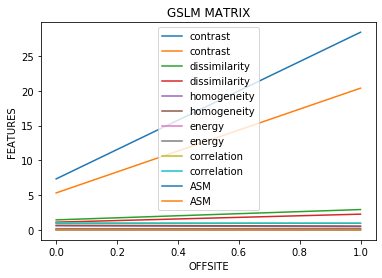

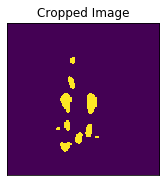

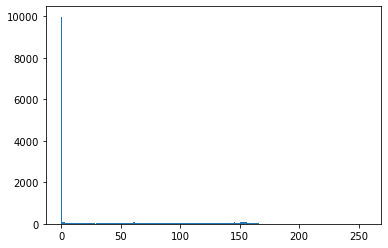

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 31.4484498   12.91769193]
 [118.12078373  47.72364831]]
the dissimilarity of the images is  [[2.62081693 1.46555118]
 [5.25508433 2.92317708]]
the homogeneity of the images is  [[0.69420546 0.7323088 ]
 [0.64221706 0.67264799]]
the energy of the images is  [[0.59888404 0.60388324]
 [0.58812134 0.59822689]]
the correlation of the images is  [[0.59888404 0.60388324]
 [0.58812134 0.59822689]]
the ASM of the images is  [[0.3586621  0.36467497]
 [0.34588671 0.35787541]]


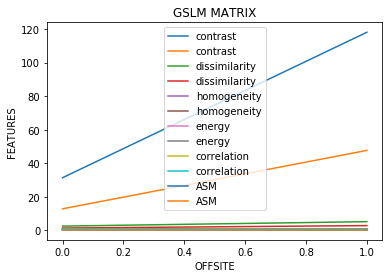

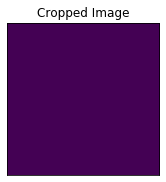

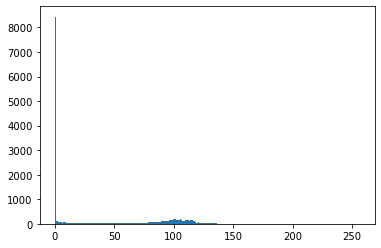

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[19.28703248  8.02878937]
 [75.17770337 30.71341766]]
the dissimilarity of the images is  [[2.1070374  1.28703248]
 [4.22953869 2.57465278]]
the homogeneity of the images is  [[0.65374103 0.71300226]
 [0.584095   0.63441952]]
the energy of the images is  [[0.50376786 0.50943127]
 [0.49177187 0.5035241 ]]
the correlation of the images is  [[0.50376786 0.50943127]
 [0.49177187 0.5035241 ]]
the ASM of the images is  [[0.25378205 0.25952022]
 [0.24183958 0.25353652]]


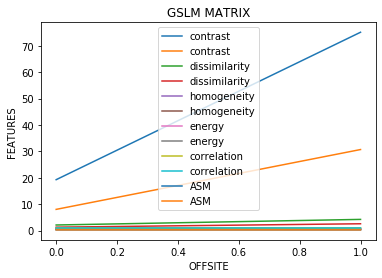

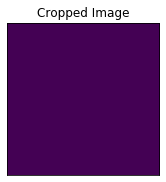

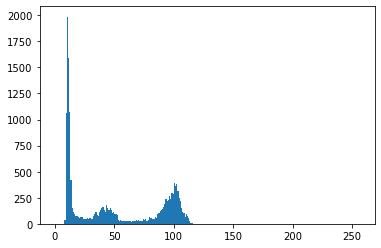

[[ 9  9  9 ... 10  9  9]
 [ 9  9  9 ... 10  9  9]
 [ 9  9  9 ...  9  9  9]
 ...
 [ 9  9  9 ...  8  8  8]
 [ 9  9  9 ...  8  8  8]
 [ 9  9  9 ...  8  8  8]]
the contrast of the images is  [[ 8.94758858  7.87432333]
 [33.97259425 29.69804067]]
the dissimilarity of the images is  [[1.57406496 1.47151821]
 [3.14980159 2.94407242]]
the homogeneity of the images is  [[0.62413267 0.6361336 ]
 [0.49838403 0.50706721]]
the energy of the images is  [[0.16438283 0.16071359]
 [0.14489432 0.1393333 ]]
the correlation of the images is  [[0.16438283 0.16071359]
 [0.14489432 0.1393333 ]]
the ASM of the images is  [[0.02702172 0.02582886]
 [0.02099436 0.01941377]]


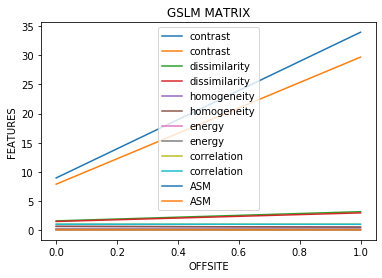

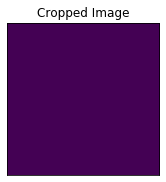

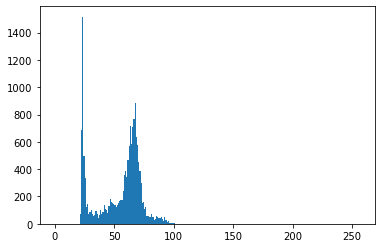

[[40 37 33 ... 22 22 22]
 [40 37 33 ... 22 22 22]
 [40 37 33 ... 22 22 22]
 ...
 [41 37 33 ... 21 21 21]
 [41 37 34 ... 21 21 21]
 [41 37 34 ... 21 21 21]]
the contrast of the images is  [[ 9.00246063  9.07947835]
 [33.01748512 33.59312996]]
the dissimilarity of the images is  [[1.55843996 1.51734744]
 [3.09164187 3.03174603]]
the homogeneity of the images is  [[0.61489628 0.62478535]
 [0.47374903 0.47873972]]
the energy of the images is  [[0.12165253 0.12088766]
 [0.10190353 0.10190414]]
the correlation of the images is  [[0.12165253 0.12088766]
 [0.10190353 0.10190414]]
the ASM of the images is  [[0.01479934 0.01461383]
 [0.01038433 0.01038445]]


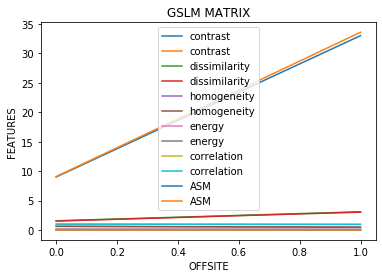

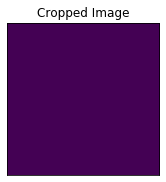

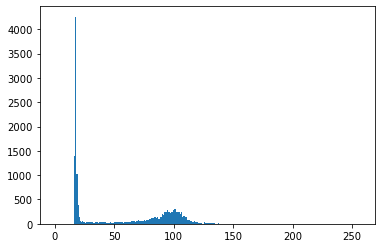

[[16 16 16 ... 18 18 19]
 [16 16 16 ... 18 18 19]
 [16 16 16 ... 18 18 19]
 ...
 [18 18 18 ... 20 20 20]
 [18 18 18 ... 20 21 21]
 [19 19 19 ... 20 21 22]]
the contrast of the images is  [[20.48658957 17.27300689]
 [76.0344122  64.55902778]]
the dissimilarity of the images is  [[2.07221949 1.78125   ]
 [4.13411458 3.55195933]]
the homogeneity of the images is  [[0.63597687 0.65697615]
 [0.52203049 0.54375284]]
the energy of the images is  [[0.26297299 0.26718538]
 [0.24497601 0.25219937]]
the correlation of the images is  [[0.26297299 0.26718538]
 [0.24497601 0.25219937]]
the ASM of the images is  [[0.0691548  0.07138803]
 [0.06001324 0.06360452]]


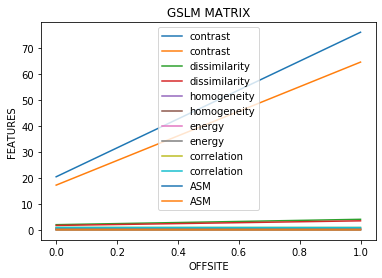

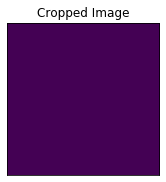

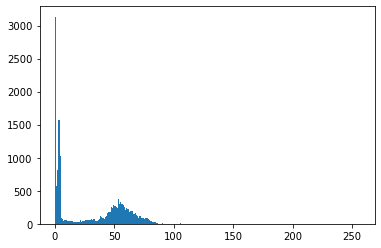

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[10.37456939  9.875     ]
 [38.62828621 36.68346974]]
the dissimilarity of the images is  [[1.71401329 1.54564469]
 [3.42367312 3.08091518]]
the homogeneity of the images is  [[0.60777898 0.63600987]
 [0.48445748 0.50984541]]
the energy of the images is  [[0.21010171 0.21146225]
 [0.19216131 0.19482639]]
the correlation of the images is  [[0.21010171 0.21146225]
 [0.19216131 0.19482639]]
the ASM of the images is  [[0.04414273 0.04471628]
 [0.03692597 0.03795732]]


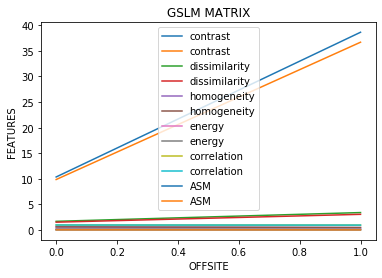

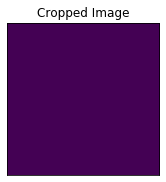

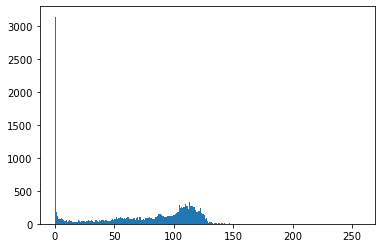

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 43.21278297  43.17089075]
 [160.59077381 159.81039187]]
the dissimilarity of the images is  [[3.74993848 3.66732283]
 [7.47718254 7.29749504]]
the homogeneity of the images is  [[0.46162775 0.46661755]
 [0.33693901 0.34665951]]
the energy of the images is  [[0.18179048 0.18624799]
 [0.1687947  0.17702494]]
the correlation of the images is  [[0.18179048 0.18624799]
 [0.1687947  0.17702494]]
the ASM of the images is  [[0.03304778 0.03468831]
 [0.02849165 0.03133783]]


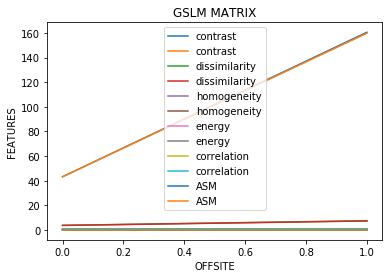

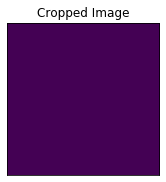

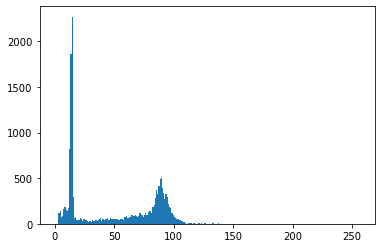

[[3 4 5 ... 8 6 6]
 [3 4 5 ... 8 7 6]
 [3 4 5 ... 8 7 6]
 ...
 [3 3 5 ... 8 6 6]
 [3 3 5 ... 8 7 6]
 [3 3 5 ... 8 7 6]]
the contrast of the images is  [[24.75768947 16.13109006]
 [91.6860119  60.59040179]]
the dissimilarity of the images is  [[2.40323573 1.89942175]
 [4.81187996 3.80034722]]
the homogeneity of the images is  [[0.58062469 0.63994384]
 [0.44675318 0.52568879]]
the energy of the images is  [[0.1679948  0.17465264]
 [0.15031173 0.15675189]]
the correlation of the images is  [[0.1679948  0.17465264]
 [0.15031173 0.15675189]]
the ASM of the images is  [[0.02822225 0.03050355]
 [0.02259362 0.02457115]]


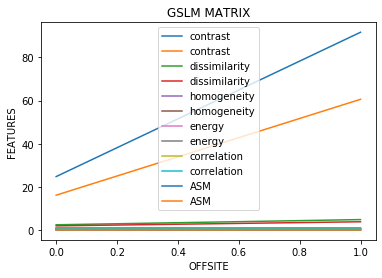

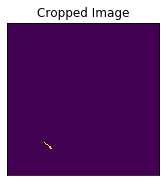

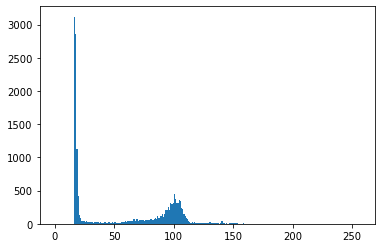

[[16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]
 ...
 [16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]]
the contrast of the images is  [[ 28.25461368  24.53850886]
 [104.94934276  91.59988839]]
the dissimilarity of the images is  [[2.318344   2.0132874 ]
 [4.64577133 4.02907986]]
the homogeneity of the images is  [[0.66324417 0.67978837]
 [0.55853964 0.57435573]]
the energy of the images is  [[0.25053339 0.25068238]
 [0.23102508 0.23170311]]
the correlation of the images is  [[0.25053339 0.25068238]
 [0.23102508 0.23170311]]
the ASM of the images is  [[0.06276698 0.06284166]
 [0.05337259 0.05368633]]


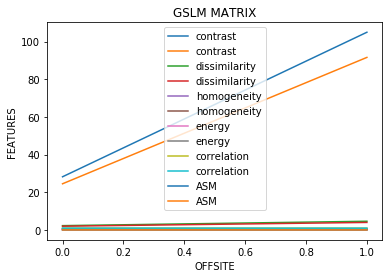

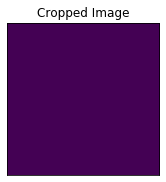

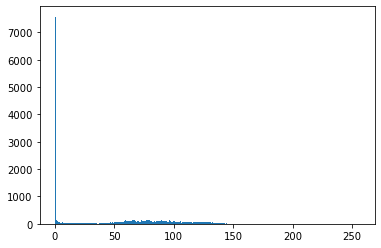

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 33.21382874  25.68737697]
 [123.7078373   95.8922371 ]]
the dissimilarity of the images is  [[3.04601378 2.51267224]
 [6.08618552 5.01897321]]
the homogeneity of the images is  [[0.58550837 0.60860854]
 [0.51235027 0.52977594]]
the energy of the images is  [[0.45108798 0.45247628]
 [0.43946642 0.44221062]]
the correlation of the images is  [[0.45108798 0.45247628]
 [0.43946642 0.44221062]]
the ASM of the images is  [[0.20348036 0.20473478]
 [0.19313073 0.19555024]]


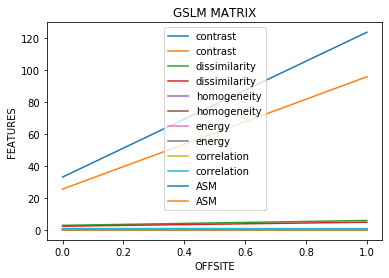

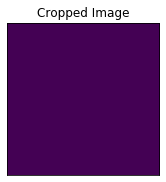

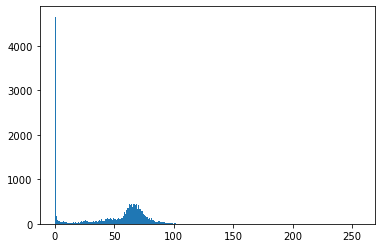

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 34.43245571  20.26648622]
 [127.35962302  75.19494048]]
the dissimilarity of the images is  [[2.94315945 2.13447343]
 [5.89161706 4.25136409]]
the homogeneity of the images is  [[0.57769527 0.61459934]
 [0.45811209 0.50013984]]
the energy of the images is  [[0.27385866 0.28011669]
 [0.25869181 0.27097058]]
the correlation of the images is  [[0.27385866 0.28011669]
 [0.25869181 0.27097058]]
the ASM of the images is  [[0.07499857 0.07846536]
 [0.06692145 0.07342505]]


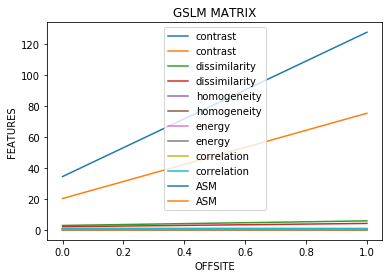

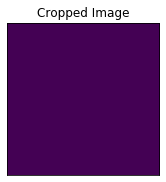

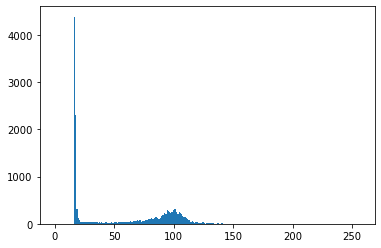

[[16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]
 ...
 [16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]]
the contrast of the images is  [[20.87180118 17.71069144]
 [77.53472222 66.32149058]]
the dissimilarity of the images is  [[2.08353839 1.79484498]
 [4.15922619 3.5858755 ]]
the homogeneity of the images is  [[0.63969031 0.66078678]
 [0.52894622 0.54983409]]
the energy of the images is  [[0.2855785  0.28809845]
 [0.26710687 0.27185498]]
the correlation of the images is  [[0.2855785  0.28809845]
 [0.26710687 0.27185498]]
the ASM of the images is  [[0.08155508 0.08300072]
 [0.07134608 0.07390513]]


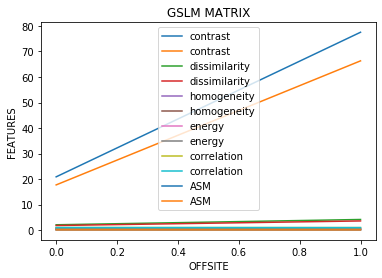

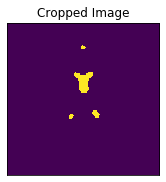

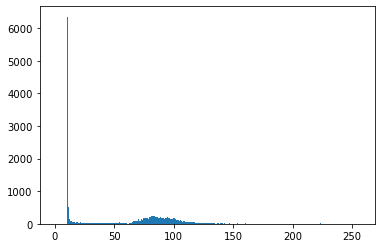

[[10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 ...
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]]
the contrast of the images is  [[ 30.94143701  24.91375492]
 [115.6421131   92.32421875]]
the dissimilarity of the images is  [[2.83870571 2.41117126]
 [5.66269841 4.79904514]]
the homogeneity of the images is  [[0.57844378 0.60785055]
 [0.48547703 0.51398033]]
the energy of the images is  [[0.37585507 0.37753044]
 [0.36265399 0.36664527]]
the correlation of the images is  [[0.37585507 0.37753044]
 [0.36265399 0.36664527]]
the ASM of the images is  [[0.14126703 0.14252923]
 [0.13151791 0.13442876]]


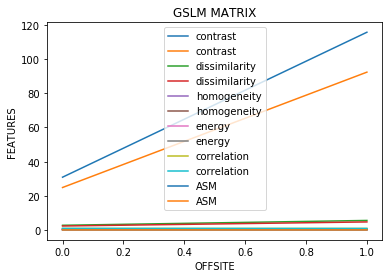

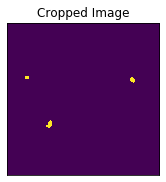

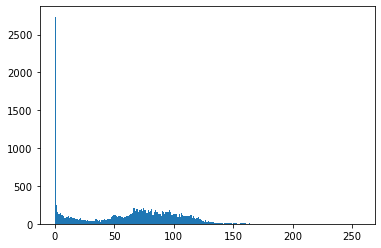

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [57 58 59 ...  0  0  0]
 [57 59 59 ...  0  0  0]
 [57 59 59 ...  0  0  0]]
the contrast of the images is  [[21.81969734 20.41879921]
 [82.91691468 78.04799107]]
the dissimilarity of the images is  [[2.82203494 2.80511811]
 [5.6390129  5.60243056]]
the homogeneity of the images is  [[0.4461534  0.44288628]
 [0.32040369 0.32132369]]
the energy of the images is  [[0.15780125 0.16140977]
 [0.14555467 0.15313299]]
the correlation of the images is  [[0.15780125 0.16140977]
 [0.14555467 0.15313299]]
the ASM of the images is  [[0.02490123 0.02605311]
 [0.02118616 0.02344971]]


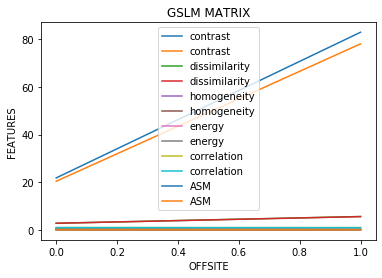

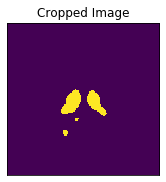

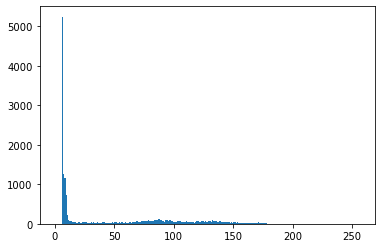

[[6 6 6 ... 6 6 6]
 [6 6 6 ... 6 6 6]
 [6 6 6 ... 6 6 6]
 ...
 [6 6 6 ... 6 6 6]
 [6 6 6 ... 6 6 6]
 [6 6 6 ... 6 6 6]]
the contrast of the images is  [[23.10925197 14.20730807]
 [86.44940476 53.42745536]]
the dissimilarity of the images is  [[2.44032972 1.9109252 ]
 [4.87437996 3.82403274]]
the homogeneity of the images is  [[0.61656667 0.63820327]
 [0.52960467 0.55083192]]
the energy of the images is  [[0.32041484 0.32421143]
 [0.30351516 0.30997696]]
the correlation of the images is  [[0.32041484 0.32421143]
 [0.30351516 0.30997696]]
the ASM of the images is  [[0.10266567 0.10511305]
 [0.09212145 0.09608572]]


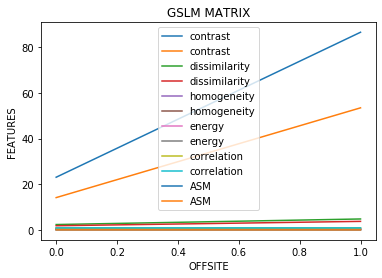

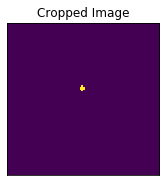

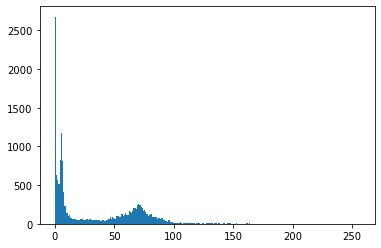

[[44 44 43 ...  8  8  8]
 [44 44 43 ...  7  6  6]
 [45 44 44 ...  5  5  5]
 ...
 [ 0  0  0 ...  5  5  5]
 [ 0  0  0 ...  5  5  5]
 [ 0  0  0 ...  5  5  4]]
the contrast of the images is  [[12.30222687  9.85716043]
 [45.55053323 36.62258185]]
the dissimilarity of the images is  [[1.80677904 1.67162894]
 [3.60559276 3.32434276]]
the homogeneity of the images is  [[0.60727753 0.60867669]
 [0.47986403 0.48890827]]
the energy of the images is  [[0.17679593 0.18172889]
 [0.16010508 0.16977984]]
the correlation of the images is  [[0.17679593 0.18172889]
 [0.16010508 0.16977984]]
the ASM of the images is  [[0.0312568  0.03302539]
 [0.02563364 0.02882519]]


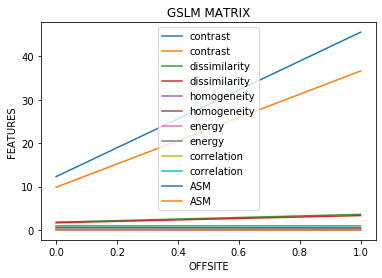

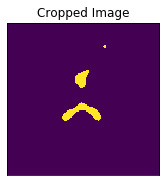

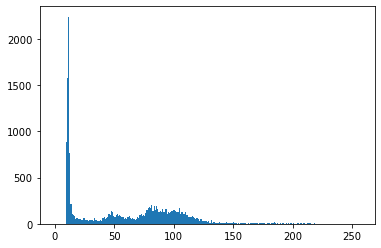

[[9 9 9 ... 9 9 9]
 [9 9 9 ... 9 9 9]
 [9 9 9 ... 9 9 9]
 ...
 [9 9 9 ... 9 9 9]
 [9 9 9 ... 9 9 9]
 [9 9 9 ... 9 9 9]]
the contrast of the images is  [[25.29712106 19.94549705]
 [95.18458581 75.20200893]]
the dissimilarity of the images is  [[2.84670276 2.328125  ]
 [5.68669395 4.63640873]]
the homogeneity of the images is  [[0.50381283 0.55375266]
 [0.38459723 0.44635633]]
the energy of the images is  [[0.15744156 0.17068295]
 [0.13577477 0.15923567]]
the correlation of the images is  [[0.15744156 0.17068295]
 [0.13577477 0.15923567]]
the ASM of the images is  [[0.02478785 0.02913267]
 [0.01843479 0.025356  ]]


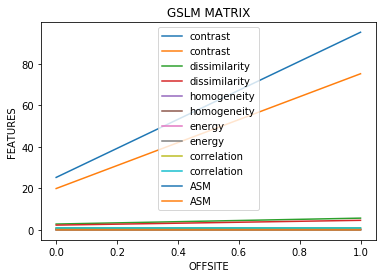

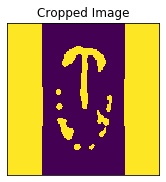

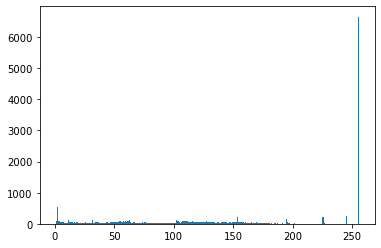

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
the contrast of the images is  [[156.64702264  17.33267717]
 [605.66889881  65.77697173]]
the dissimilarity of the images is  [[ 6.29958169  1.82640256]
 [12.65885417  3.63944692]]
the homogeneity of the images is  [[0.5488818  0.67906749]
 [0.4760219  0.60932765]]
the energy of the images is  [[0.39533445 0.40841511]
 [0.38226247 0.40802967]]
the correlation of the images is  [[0.39533445 0.40841511]
 [0.38226247 0.40802967]]
the ASM of the images is  [[0.15628933 0.1668029 ]
 [0.14612459 0.16648821]]


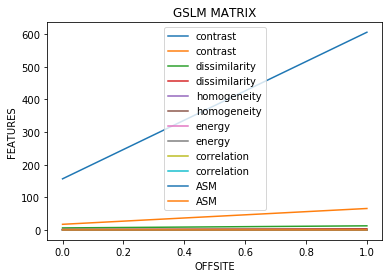

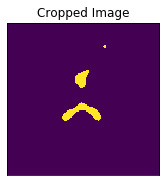

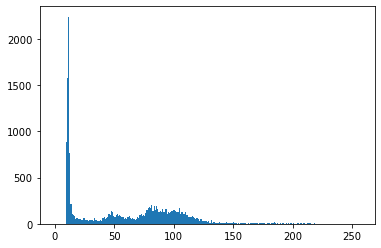

[[9 9 9 ... 9 9 9]
 [9 9 9 ... 9 9 9]
 [9 9 9 ... 9 9 9]
 ...
 [9 9 9 ... 9 9 9]
 [9 9 9 ... 9 9 9]
 [9 9 9 ... 9 9 9]]
the contrast of the images is  [[25.29712106 19.94549705]
 [95.18458581 75.20200893]]
the dissimilarity of the images is  [[2.84670276 2.328125  ]
 [5.68669395 4.63640873]]
the homogeneity of the images is  [[0.50381283 0.55375266]
 [0.38459723 0.44635633]]
the energy of the images is  [[0.15744156 0.17068295]
 [0.13577477 0.15923567]]
the correlation of the images is  [[0.15744156 0.17068295]
 [0.13577477 0.15923567]]
the ASM of the images is  [[0.02478785 0.02913267]
 [0.01843479 0.025356  ]]


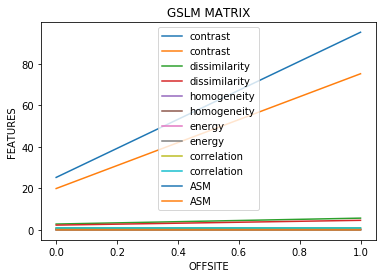

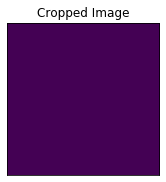

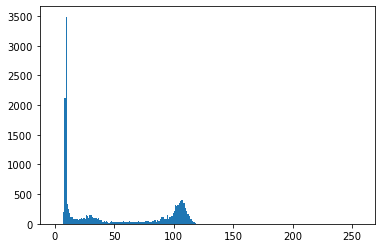

[[7 7 8 ... 9 9 9]
 [7 7 8 ... 9 9 9]
 [7 7 8 ... 9 8 8]
 ...
 [7 7 8 ... 8 8 8]
 [7 7 8 ... 8 8 8]
 [7 7 8 ... 8 8 8]]
the contrast of the images is  [[12.94525098  8.83759843]
 [49.74541171 33.7266245 ]]
the dissimilarity of the images is  [[1.85002461 1.48191437]
 [3.70858135 2.96422371]]
the homogeneity of the images is  [[0.60309413 0.64604867]
 [0.48209379 0.52660223]]
the energy of the images is  [[0.22617127 0.22906666]
 [0.20156158 0.20675867]]
the correlation of the images is  [[0.22617127 0.22906666]
 [0.20156158 0.20675867]]
the ASM of the images is  [[0.05115344 0.05247154]
 [0.04062707 0.04274915]]


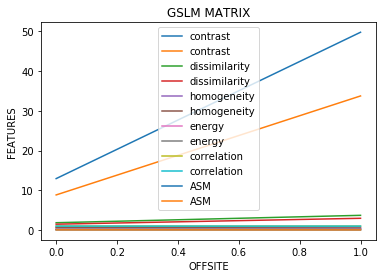

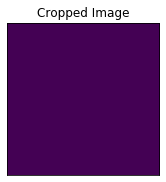

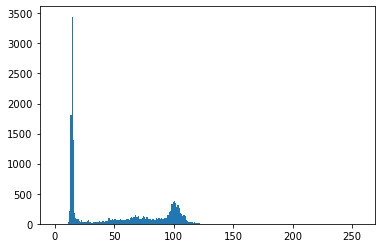

[[12 12 12 ... 14 14 14]
 [12 12 12 ... 14 14 14]
 [12 12 12 ... 14 14 14]
 ...
 [11 12 12 ... 14 14 14]
 [11 11 12 ... 14 14 14]
 [11 11 11 ... 14 14 14]]
the contrast of the images is  [[17.88318159 11.93116388]
 [66.94394841 44.95634921]]
the dissimilarity of the images is  [[2.09270423 1.61029774]
 [4.1984127  3.22172619]]
the homogeneity of the images is  [[0.62723656 0.66521006]
 [0.50742008 0.55258225]]
the energy of the images is  [[0.22569265 0.2275638 ]
 [0.19972559 0.20310327]]
the correlation of the images is  [[0.22569265 0.2275638 ]
 [0.19972559 0.20310327]]
the ASM of the images is  [[0.05093717 0.05178528]
 [0.03989031 0.04125094]]


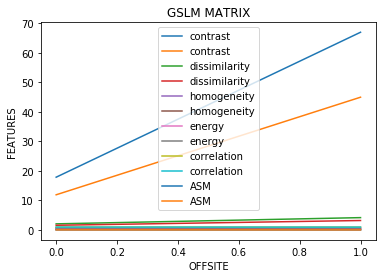

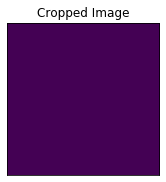

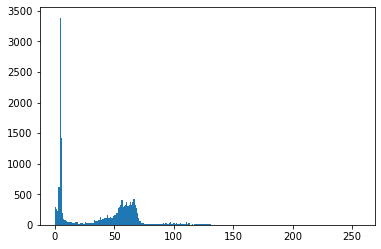

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [5 5 5 ... 4 4 4]
 [5 5 5 ... 5 4 4]
 [5 5 5 ... 5 5 4]]
the contrast of the images is  [[ 30.65458907  11.62949065]
 [113.34511409  43.65383185]]
the dissimilarity of the images is  [[2.40914124 1.50141486]
 [4.82936508 2.98629712]]
the homogeneity of the images is  [[0.63923337 0.65983987]
 [0.51550894 0.52800479]]
the energy of the images is  [[0.20854823 0.21047377]
 [0.18637856 0.19042464]]
the correlation of the images is  [[0.20854823 0.21047377]
 [0.18637856 0.19042464]]
the ASM of the images is  [[0.04349236 0.04429921]
 [0.03473697 0.03626155]]


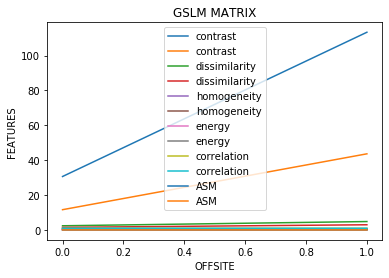

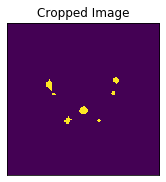

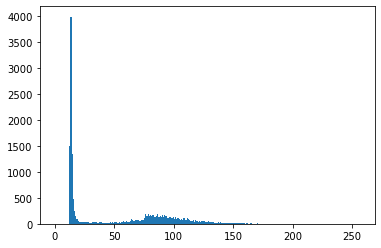

[[12 12 12 ... 13 13 13]
 [12 12 12 ... 13 13 13]
 [12 12 12 ... 13 13 13]
 ...
 [12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]]
the contrast of the images is  [[24.81619094 17.72311762]
 [92.9859251  65.83773562]]
the dissimilarity of the images is  [[2.6831939  2.21044537]
 [5.35869296 4.3983755 ]]
the homogeneity of the images is  [[0.57179281 0.59748101]
 [0.47871777 0.50428458]]
the energy of the images is  [[0.25582186 0.25726373]
 [0.23775753 0.24033555]]
the correlation of the images is  [[0.25582186 0.25726373]
 [0.23775753 0.24033555]]
the ASM of the images is  [[0.06544482 0.06618463]
 [0.05652864 0.05776118]]


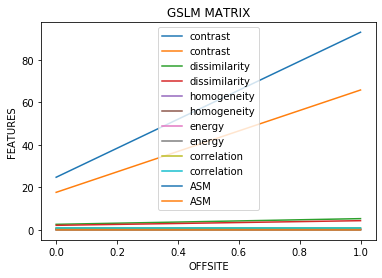

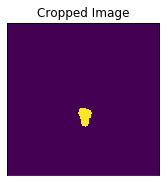

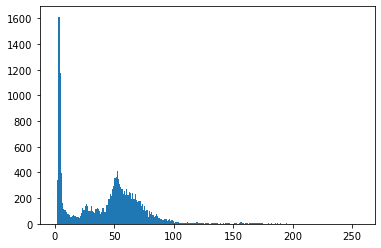

[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]
the contrast of the images is  [[15.56108514 12.53266486]
 [58.21329365 47.03676835]]
the dissimilarity of the images is  [[2.32314222 2.17993356]
 [4.62822421 4.34145585]]
the homogeneity of the images is  [[0.49828329 0.50007547]
 [0.36633537 0.37014778]]
the energy of the images is  [[0.11954765 0.11584733]
 [0.10777627 0.10207775]]
the correlation of the images is  [[0.11954765 0.11584733]
 [0.10777627 0.10207775]]
the ASM of the images is  [[0.01429164 0.0134206 ]
 [0.01161572 0.01041987]]


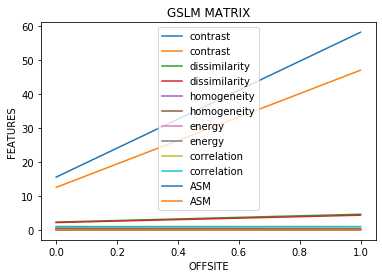

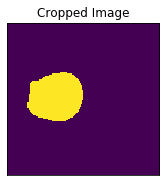

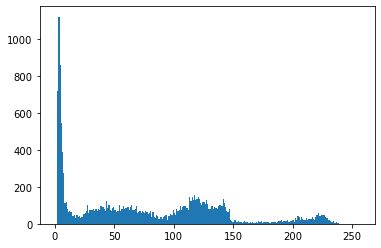

[[3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 ...
 [3 3 3 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]
the contrast of the images is  [[ 27.1015625   23.49710876]
 [102.30927579  89.40910218]]
the dissimilarity of the images is  [[3.05321112 2.89056348]
 [6.12884425 5.80133929]]
the homogeneity of the images is  [[0.4458306  0.46698466]
 [0.31354315 0.32462077]]
the energy of the images is  [[0.08867736 0.08293664]
 [0.073908   0.06580611]]
the correlation of the images is  [[0.08867736 0.08293664]
 [0.073908   0.06580611]]
the ASM of the images is  [[0.00786367 0.00687849]
 [0.00546239 0.00433044]]


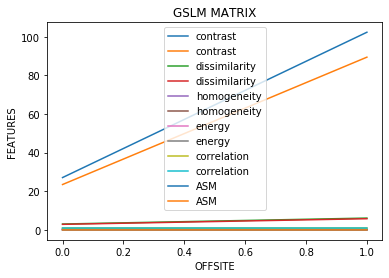

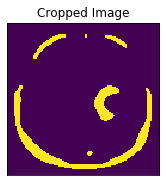

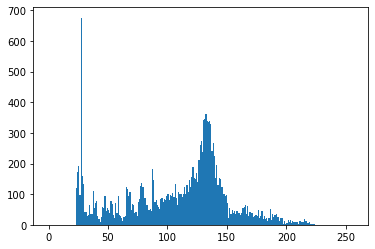

[[118 110 103 ... 103 110 117]
 [110 108  98 ...  97 107 110]
 [103 100  92 ...  91 100 103]
 ...
 [102 100  91 ...  90  99 102]
 [110 107  96 ...  95 106 109]
 [117 110 102 ... 102 109 116]]
the contrast of the images is  [[ 60.39339321  59.34313484]
 [226.56343006 222.24658978]]
the dissimilarity of the images is  [[4.51187254 4.42913386]
 [8.93880208 8.78081597]]
the homogeneity of the images is  [[0.40920518 0.42359019]
 [0.28149763 0.29579219]]
the energy of the images is  [[0.05160761 0.05381807]
 [0.04262102 0.04489633]]
the correlation of the images is  [[0.05160761 0.05381807]
 [0.04262102 0.04489633]]
the ASM of the images is  [[0.00266335 0.00289638]
 [0.00181655 0.00201568]]


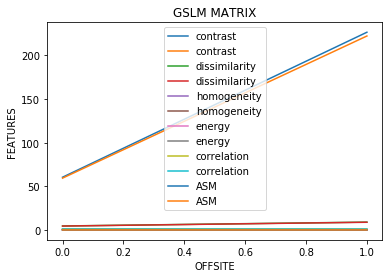

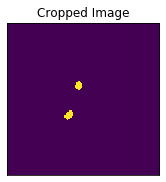

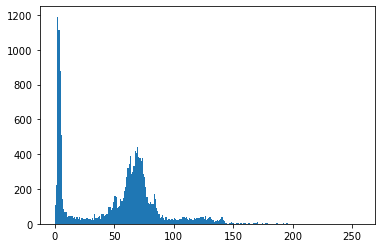

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
the contrast of the images is  [[15.97902313 13.89185531]
 [60.18012153 52.04408482]]
the dissimilarity of the images is  [[2.25239911 1.98474409]
 [4.51035466 3.95876736]]
the homogeneity of the images is  [[0.52716459 0.56873046]
 [0.38720935 0.43560452]]
the energy of the images is  [[0.1045993  0.11169079]
 [0.08837184 0.09722641]]
the correlation of the images is  [[0.1045993  0.11169079]
 [0.08837184 0.09722641]]
the ASM of the images is  [[0.01094101 0.01247483]
 [0.00780958 0.00945298]]


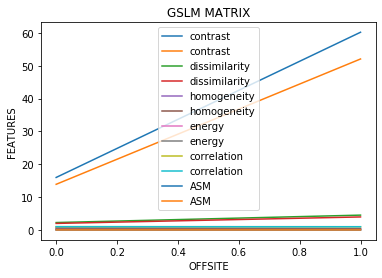

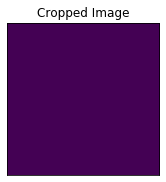

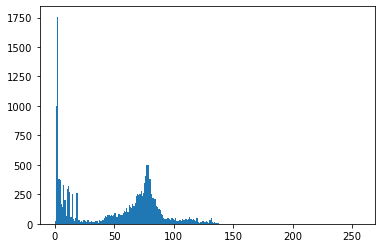

[[24 24 20 ... 20 24 24]
 [24 22 18 ... 18 22 24]
 [22 19 17 ... 17 20 22]
 ...
 [22 19 17 ... 17 20 22]
 [24 22 18 ... 18 22 24]
 [24 24 20 ... 20 24 24]]
the contrast of the images is  [[ 40.3414124   30.66006398]
 [149.99516369 113.88789683]]
the dissimilarity of the images is  [[3.14788386 2.52866634]
 [6.25868056 5.0406746 ]]
the homogeneity of the images is  [[0.51902911 0.58044192]
 [0.39130904 0.4574137 ]]
the energy of the images is  [[0.11782241 0.12479348]
 [0.1012957  0.11132969]]
the correlation of the images is  [[0.11782241 0.12479348]
 [0.1012957  0.11132969]]
the ASM of the images is  [[0.01388212 0.01557341]
 [0.01026082 0.0123943 ]]


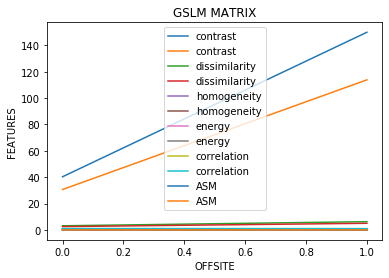

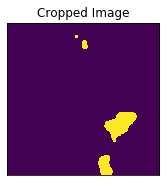

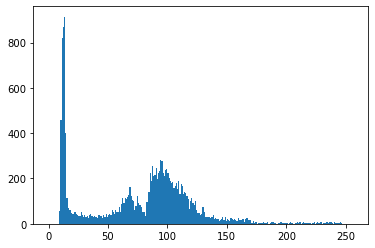

[[10 10 11 ... 11 11 11]
 [10 10 11 ... 11 11 11]
 [10 10 11 ... 11 11 11]
 ...
 [ 9  9  9 ... 10 10 10]
 [ 9  9  9 ... 10 10 10]
 [10  9  9 ... 10 10 10]]
the contrast of the images is  [[24.89603839 17.3992372 ]
 [94.75434028 65.65556796]]
the dissimilarity of the images is  [[3.05142717 2.4082185 ]
 [6.11049107 4.79954117]]
the homogeneity of the images is  [[0.46052467 0.50678124]
 [0.33616495 0.37130255]]
the energy of the images is  [[0.08511576 0.0889636 ]
 [0.06935427 0.07462794]]
the correlation of the images is  [[0.08511576 0.0889636 ]
 [0.06935427 0.07462794]]
the ASM of the images is  [[0.00724469 0.00791452]
 [0.00481002 0.00556933]]


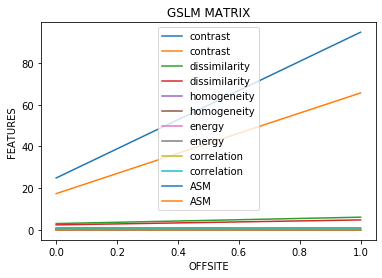

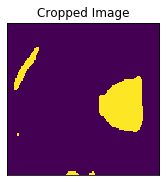

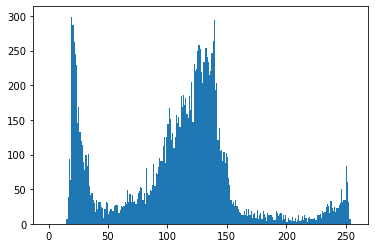

[[63 64 69 ... 22 22 22]
 [64 66 67 ... 22 22 22]
 [66 67 67 ... 22 22 22]
 ...
 [55 48 47 ... 59 57 55]
 [56 55 48 ... 57 55 53]
 [62 56 55 ... 55 53 50]]
the contrast of the images is  [[ 50.01088829  38.57105069]
 [189.78763641 146.02957589]]
the dissimilarity of the images is  [[3.9562623  3.59504183]
 [7.90792411 7.16474454]]
the homogeneity of the images is  [[0.40578429 0.40905307]
 [0.26374    0.26310599]]
the energy of the images is  [[0.04238337 0.04023948]
 [0.032433   0.02975108]]
the correlation of the images is  [[0.04238337 0.04023948]
 [0.032433   0.02975108]]
the ASM of the images is  [[0.00179635 0.00161922]
 [0.0010519  0.00088513]]


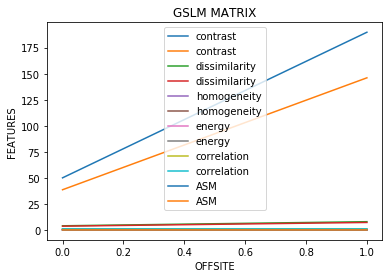

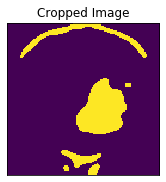

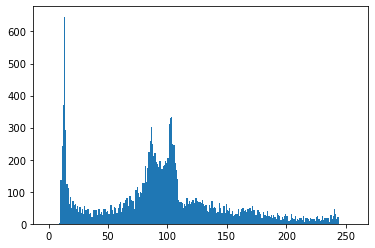

[[32 31 27 ... 11 11 11]
 [31 27 25 ... 11 11 11]
 [27 25 21 ... 11 11 11]
 ...
 [37 37 33 ... 11 12 12]
 [32 32 31 ... 12 12 12]
 [31 31 31 ... 12 12 12]]
the contrast of the images is  [[ 58.32431102  49.40182087]
 [220.04830109 188.54780506]]
the dissimilarity of the images is  [[4.59338091 4.17691929]
 [9.16759673 8.33066716]]
the homogeneity of the images is  [[0.38838774 0.40225238]
 [0.26096363 0.27741319]]
the energy of the images is  [[0.05059808 0.0521296 ]
 [0.03907861 0.04094054]]
the correlation of the images is  [[0.05059808 0.0521296 ]
 [0.03907861 0.04094054]]
the ASM of the images is  [[0.00256017 0.00271749]
 [0.00152714 0.00167613]]


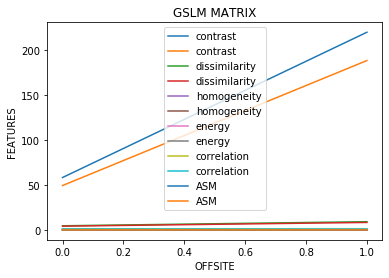

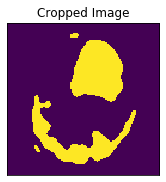

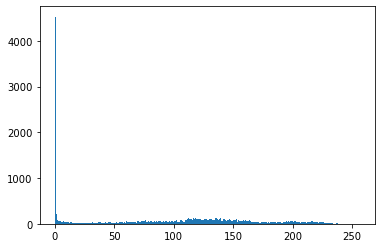

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 63.22034941  48.90692667]
 [237.96701389 186.07750496]]
the dissimilarity of the images is  [[4.5515502  3.87592274]
 [9.11123512 7.75322421]]
the homogeneity of the images is  [[0.45148245 0.46663122]
 [0.35569935 0.37015844]]
the energy of the images is  [[0.26319735 0.26745394]
 [0.2492974  0.25843486]]
the correlation of the images is  [[0.26319735 0.26745394]
 [0.2492974  0.25843486]]
the ASM of the images is  [[0.06927285 0.07153161]
 [0.06214919 0.06678858]]


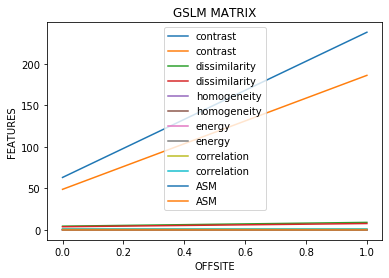

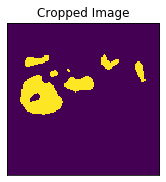

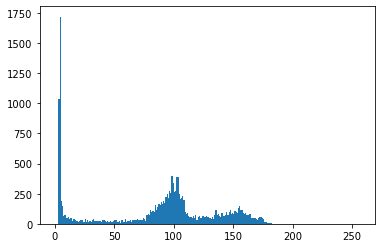

[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 4]
 [3 3 3 ... 4 4 4]
 [3 3 3 ... 4 4 4]]
the contrast of the images is  [[ 42.14394685  36.25935039]
 [160.7374752  137.64316716]]
the dissimilarity of the images is  [[3.38853346 3.30056594]
 [6.77108135 6.59343998]]
the homogeneity of the images is  [[0.50350644 0.48582529]
 [0.37337999 0.35836792]]
the energy of the images is  [[0.11373428 0.11232392]
 [0.0984613  0.09584365]]
the correlation of the images is  [[0.11373428 0.11232392]
 [0.0984613  0.09584365]]
the ASM of the images is  [[0.01293549 0.01261666]
 [0.00969463 0.009186  ]]


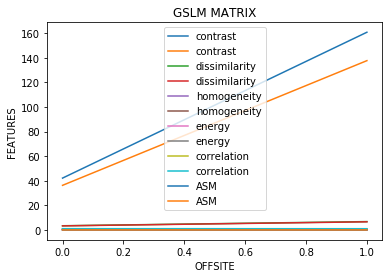

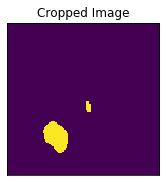

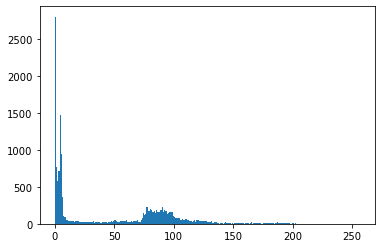

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[21.96259843 16.32418799]
 [83.37388393 62.77120536]]
the dissimilarity of the images is  [[2.50356791 1.97957677]
 [5.02058532 3.95982143]]
the homogeneity of the images is  [[0.57034601 0.6269461 ]
 [0.46068831 0.5277472 ]]
the energy of the images is  [[0.1898869  0.20265082]
 [0.17040848 0.19314538]]
the correlation of the images is  [[0.1898869  0.20265082]
 [0.17040848 0.19314538]]
the ASM of the images is  [[0.03605704 0.04106735]
 [0.02903905 0.03730514]]


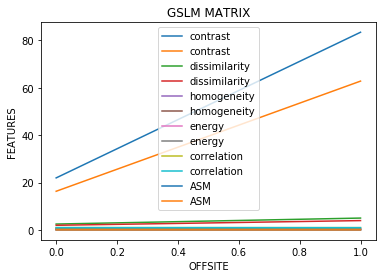

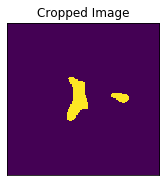

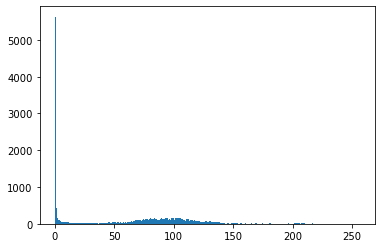

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 49.52196112  43.55757874]
 [187.09548611 163.17931548]]
the dissimilarity of the images is  [[3.71598179 3.33366142]
 [7.44419643 6.66170635]]
the homogeneity of the images is  [[0.53092496 0.54824962]
 [0.43868213 0.45266134]]
the energy of the images is  [[0.33274155 0.33038516]
 [0.32046959 0.31571465]]
the correlation of the images is  [[0.33274155 0.33038516]
 [0.32046959 0.31571465]]
the ASM of the images is  [[0.11071694 0.10915435]
 [0.10270076 0.09967574]]


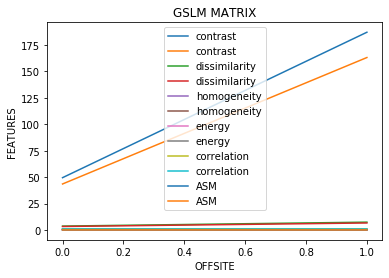

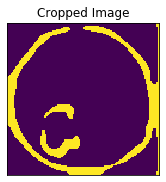

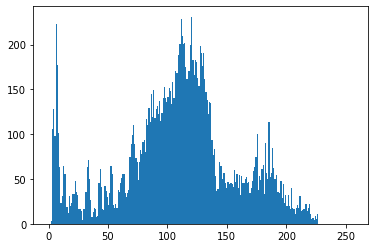

[[ 98  92  85 ... 173 195 197]
 [ 92  87  79 ... 168 192 195]
 [ 83  76  71 ... 162 188 192]
 ...
 [ 69  68  60 ... 156 183 189]
 [ 77  77  68 ... 160 186 190]
 [ 85  77  69 ... 164 189 192]]
the contrast of the images is  [[ 97.02614419  71.18473179]
 [367.30977183 269.95281498]]
the dissimilarity of the images is  [[ 6.01703986  5.18042569]
 [11.96279762 10.2922247 ]]
the homogeneity of the images is  [[0.32045236 0.33471111]
 [0.2025009  0.20979983]]
the energy of the images is  [[0.02833012 0.02873589]
 [0.02131733 0.02154796]]
the correlation of the images is  [[0.02833012 0.02873589]
 [0.02131733 0.02154796]]
the ASM of the images is  [[0.0008026  0.00082575]
 [0.00045443 0.00046431]]


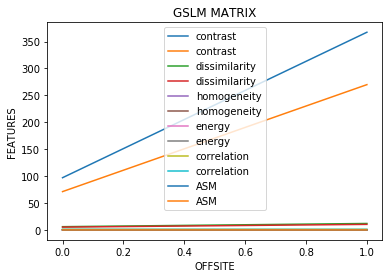

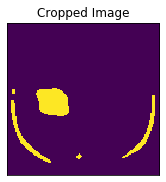

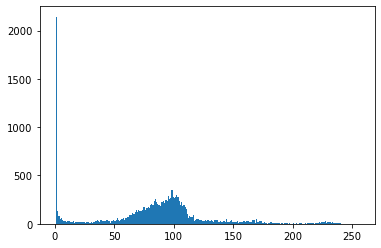

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
the contrast of the images is  [[ 70.12007874  58.6050689 ]
 [263.45616319 221.70548115]]
the dissimilarity of the images is  [[4.41006398 4.08366142]
 [8.81082589 8.16728671]]
the homogeneity of the images is  [[0.44740417 0.44067148]
 [0.31637344 0.31093332]]
the energy of the images is  [[0.12656097 0.12724678]
 [0.11620237 0.11730942]]
the correlation of the images is  [[0.12656097 0.12724678]
 [0.11620237 0.11730942]]
the ASM of the images is  [[0.01601768 0.01619174]
 [0.01350299 0.0137615 ]]


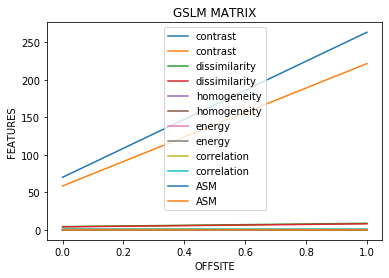

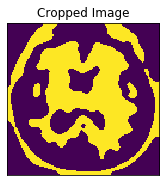

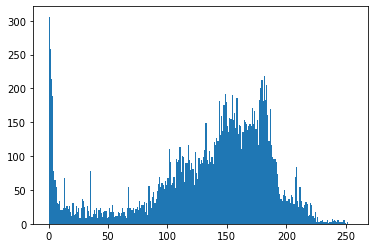

[[  4   4   4 ...  98 128 138]
 [  4   4   3 ...  99 129 138]
 [  4   3   3 ... 100 130 138]
 ...
 [  9  10  12 ... 104 134 143]
 [ 10  10  11 ... 104 135 144]
 [ 10  10  11 ... 105 135 144]]
the contrast of the images is  [[109.00590551  76.14431594]
 [414.44190228 286.62946429]]
the dissimilarity of the images is  [[ 6.37450787  5.3503937 ]
 [12.68024554 10.62748016]]
the homogeneity of the images is  [[0.2983882  0.32547668]
 [0.177946   0.20556009]]
the energy of the images is  [[0.03123858 0.03341506]
 [0.02382744 0.02667951]]
the correlation of the images is  [[0.03123858 0.03341506]
 [0.02382744 0.02667951]]
the ASM of the images is  [[0.00097585 0.00111657]
 [0.00056775 0.0007118 ]]


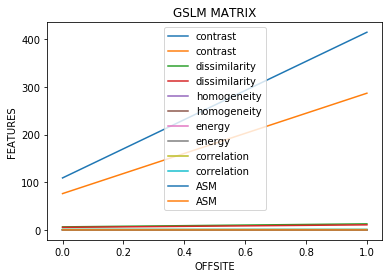

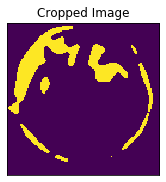

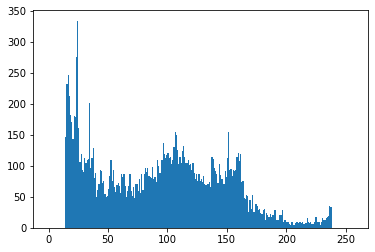

[[36 36 36 ... 46 55 63]
 [36 36 36 ... 46 55 63]
 [35 35 35 ... 46 55 63]
 ...
 [29 29 29 ... 26 27 30]
 [29 29 29 ... 25 26 27]
 [29 29 28 ... 25 25 25]]
the contrast of the images is  [[ 79.01974656  71.90434301]
 [301.85398065 274.02579365]]
the dissimilarity of the images is  [[ 5.36029774  5.23234498]
 [10.67714534 10.46130952]]
the homogeneity of the images is  [[0.36351757 0.35606135]
 [0.24317454 0.23424999]]
the energy of the images is  [[0.03829922 0.03395374]
 [0.03103746 0.02583695]]
the correlation of the images is  [[0.03829922 0.03395374]
 [0.03103746 0.02583695]]
the ASM of the images is  [[0.00146683 0.00115286]
 [0.00096332 0.00066755]]


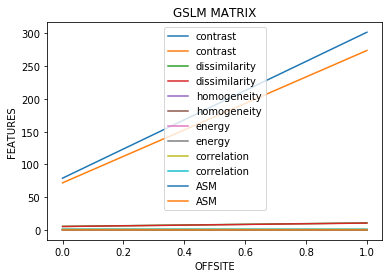

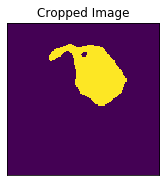

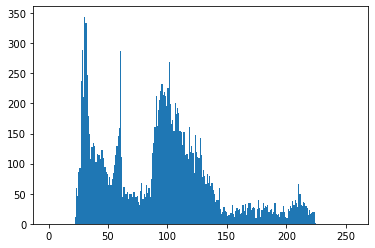

[[61 61 61 ... 67 68 70]
 [61 61 61 ... 64 67 68]
 [61 61 61 ... 62 64 67]
 ...
 [28 28 27 ... 22 22 22]
 [27 27 27 ... 22 22 22]
 [27 27 27 ... 22 22 22]]
the contrast of the images is  [[ 24.49421752  32.18688484]
 [ 92.73053075 120.20095486]]
the dissimilarity of the images is  [[3.08833661 3.24421752]
 [6.17708333 6.48642113]]
the homogeneity of the images is  [[0.4434405  0.46361303]
 [0.31091626 0.31883135]]
the energy of the images is  [[0.04621755 0.04481909]
 [0.03613792 0.03382247]]
the correlation of the images is  [[0.04621755 0.04481909]
 [0.03613792 0.03382247]]
the ASM of the images is  [[0.00213606 0.00200875]
 [0.00130595 0.00114396]]


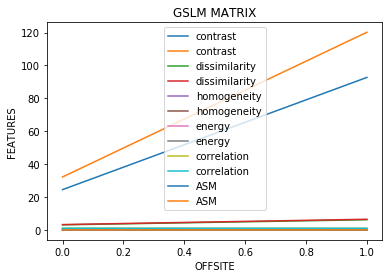

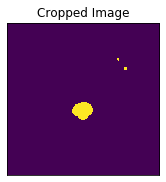

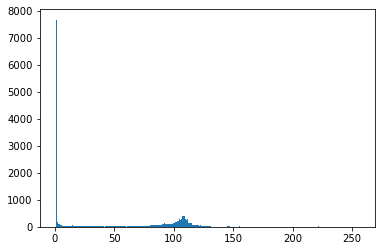

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
the contrast of the images is  [[ 32.29872047  33.93147146]
 [122.34858631 128.44246032]]
the dissimilarity of the images is  [[2.47465551 2.63804134]
 [4.95746528 5.29005456]]
the homogeneity of the images is  [[0.65916927 0.65209521]
 [0.57991917 0.57252635]]
the energy of the images is  [[0.45923519 0.45907259]
 [0.4482245  0.447864  ]]
the correlation of the images is  [[0.45923519 0.45907259]
 [0.4482245  0.447864  ]]
the ASM of the images is  [[0.21089696 0.21074765]
 [0.2009052  0.20058217]]


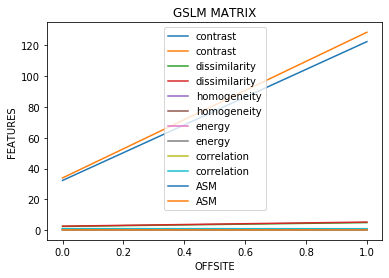

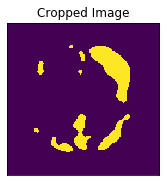

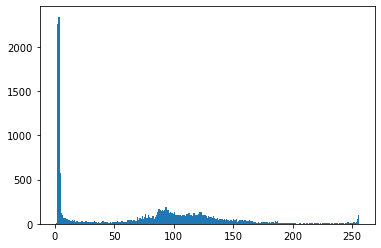

[[1 1 1 ... 2 2 2]
 [1 1 2 ... 2 2 2]
 [1 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 3 ... 2 2 2]]
the contrast of the images is  [[ 51.02319144  48.16110974]
 [193.83116319 181.65854415]]
the dissimilarity of the images is  [[4.12284695 3.77171506]
 [8.26072669 7.54024058]]
the homogeneity of the images is  [[0.47658438 0.50014156]
 [0.37677478 0.39644808]]
the energy of the images is  [[0.18342735 0.1806019 ]
 [0.16665427 0.16265503]]
the correlation of the images is  [[0.18342735 0.1806019 ]
 [0.16665427 0.16265503]]
the ASM of the images is  [[0.03364559 0.03261705]
 [0.02777365 0.02645666]]


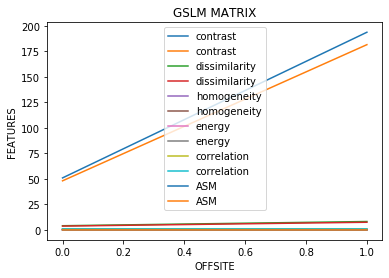

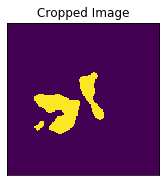

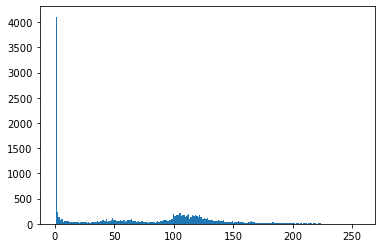

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
the contrast of the images is  [[ 37.34196604  32.95903051]
 [140.91840278 124.35987103]]
the dissimilarity of the images is  [[3.46807333 3.36380413]
 [6.93179563 6.72668651]]
the homogeneity of the images is  [[0.48362988 0.47448928]
 [0.37219692 0.36512534]]
the energy of the images is  [[0.23938854 0.23843563]
 [0.22668856 0.22596107]]
the correlation of the images is  [[0.23938854 0.23843563]
 [0.22668856 0.22596107]]
the ASM of the images is  [[0.05730687 0.05685155]
 [0.0513877  0.0510584 ]]


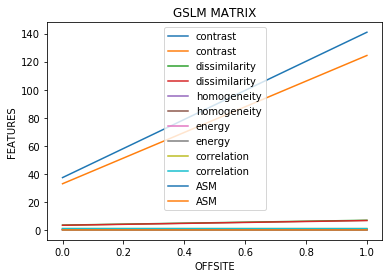

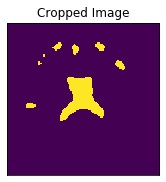

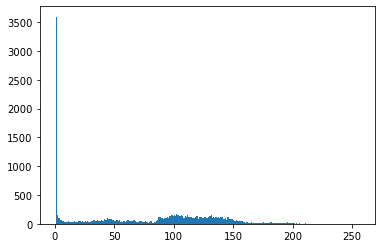

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
the contrast of the images is  [[ 64.14345472  60.3839813 ]
 [240.47259425 226.09517609]]
the dissimilarity of the images is  [[4.69291339 4.53703248]
 [9.37586806 9.08327133]]
the homogeneity of the images is  [[0.42141683 0.4324498 ]
 [0.31937315 0.323972  ]]
the energy of the images is  [[0.20932797 0.20650633]
 [0.19881796 0.1930011 ]]
the correlation of the images is  [[0.20932797 0.20650633]
 [0.19881796 0.1930011 ]]
the ASM of the images is  [[0.0438182  0.04264486]
 [0.03952858 0.03724942]]


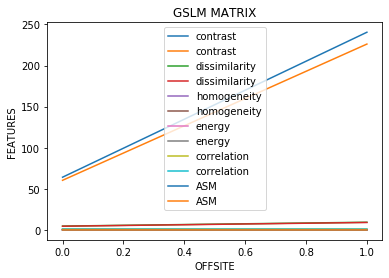

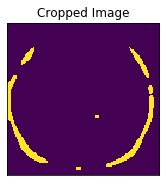

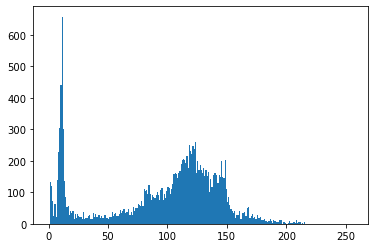

[[ 2  2  2 ... 11 11 11]
 [ 2  2  2 ... 11 11 11]
 [ 3  3  3 ... 11 11 11]
 ...
 [ 1  1  1 ...  8  8  8]
 [ 1  1  1 ...  8  8  8]
 [ 1  1  1 ...  8  8  8]]
the contrast of the images is  [[ 68.20084892  62.83464567]
 [259.94295635 237.96738591]]
the dissimilarity of the images is  [[4.57880167 4.26377953]
 [9.14806548 8.52281746]]
the homogeneity of the images is  [[0.39164308 0.42001919]
 [0.2620942  0.27908049]]
the energy of the images is  [[0.05228864 0.05119829]
 [0.04149618 0.03959676]]
the correlation of the images is  [[0.05228864 0.05119829]
 [0.04149618 0.03959676]]
the ASM of the images is  [[0.0027341  0.00262126]
 [0.00172193 0.0015679 ]]


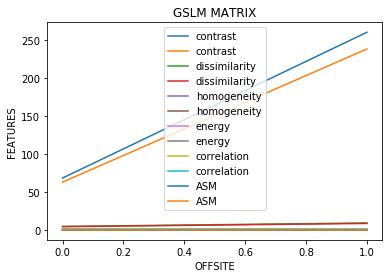

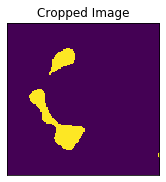

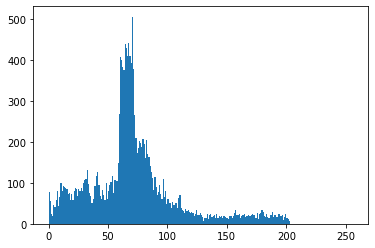

[[75 70 69 ... 64 70 71]
 [70 69 64 ... 63 64 70]
 [69 64 59 ... 59 62 63]
 ...
 [54 53 52 ... 37 40 40]
 [53 53 52 ... 37 40 40]
 [53 53 51 ... 37 40 40]]
the contrast of the images is  [[ 26.54016978  18.2210876 ]
 [100.74441964  69.2485119 ]]
the dissimilarity of the images is  [[3.31539124 2.51624016]
 [6.60553075 5.01190476]]
the homogeneity of the images is  [[0.38627726 0.47216713]
 [0.24924406 0.32321303]]
the energy of the images is  [[0.04609404 0.05042656]
 [0.03405599 0.03745532]]
the correlation of the images is  [[0.04609404 0.05042656]
 [0.03405599 0.03745532]]
the ASM of the images is  [[0.00212466 0.00254284]
 [0.00115981 0.0014029 ]]


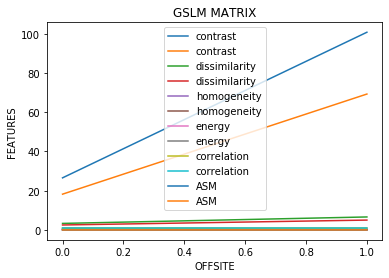

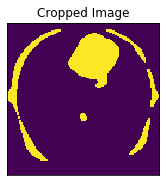

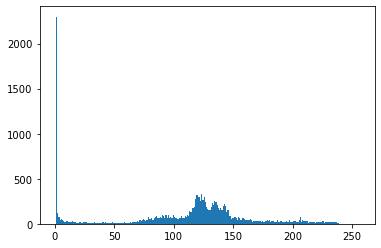

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
the contrast of the images is  [[ 96.86675689  73.59498031]
 [367.76190476 275.53404018]]
the dissimilarity of the images is  [[ 5.28998524  4.51648622]
 [10.57800099  9.01184276]]
the homogeneity of the images is  [[0.42070446 0.45094722]
 [0.2951943  0.32544309]]
the energy of the images is  [[0.13404803 0.13606495]
 [0.12292275 0.12598209]]
the correlation of the images is  [[0.13404803 0.13606495]
 [0.12292275 0.12598209]]
the ASM of the images is  [[0.01796887 0.01851367]
 [0.01511    0.01587149]]


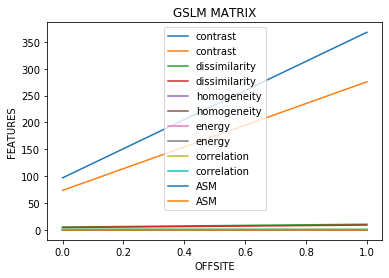

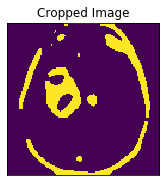

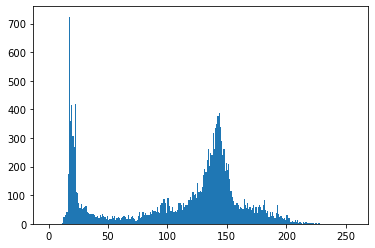

[[15 15 15 ... 33 33 33]
 [15 15 15 ... 30 31 31]
 [14 14 14 ... 27 27 28]
 ...
 [18 18 18 ... 57 64 69]
 [19 19 19 ... 62 70 71]
 [19 19 19 ... 69 71 77]]
the contrast of the images is  [[ 92.29060039  52.17901083]
 [349.8640253  196.70027282]]
the dissimilarity of the images is  [[ 5.41006398  4.01550197]
 [10.8312872   7.96775794]]
the homogeneity of the images is  [[0.41075043 0.44148764]
 [0.2800985  0.31922032]]
the energy of the images is  [[0.06089051 0.06587166]
 [0.04837327 0.05634581]]
the correlation of the images is  [[0.06089051 0.06587166]
 [0.04837327 0.05634581]]
the ASM of the images is  [[0.00370765 0.00433908]
 [0.00233997 0.00317485]]


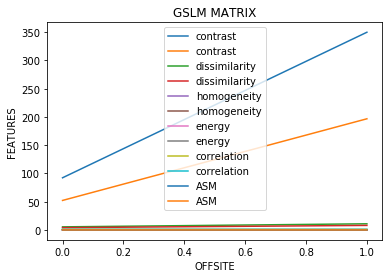

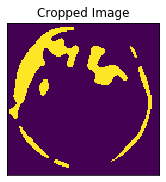

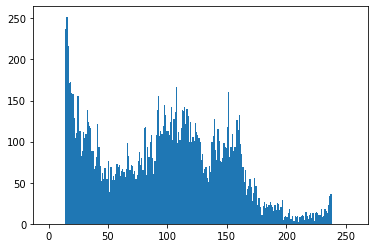

[[ 37  36  36 ...  77  96 103]
 [ 36  36  35 ...  80 100 103]
 [ 36  35  35 ...  82 103 107]
 ...
 [ 35  35  35 ...  91 116 125]
 [ 35  35  35 ...  91 116 125]
 [ 35  35  35 ...  92 116 125]]
the contrast of the images is  [[ 93.52675935  75.26691683]
 [355.5562376  286.93253968]]
the dissimilarity of the images is  [[ 5.92402805  5.3468873 ]
 [11.80673363 10.69233631]]
the homogeneity of the images is  [[0.34368851 0.35779357]
 [0.22081757 0.24148761]]
the energy of the images is  [[0.03338328 0.03340843]
 [0.02656116 0.02624801]]
the correlation of the images is  [[0.03338328 0.03340843]
 [0.02656116 0.02624801]]
the ASM of the images is  [[0.00111444 0.00111612]
 [0.0007055  0.00068896]]


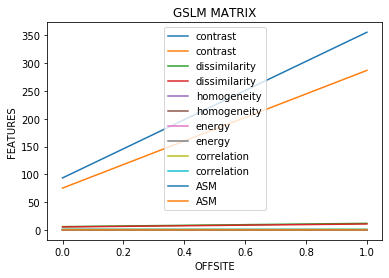

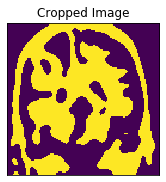

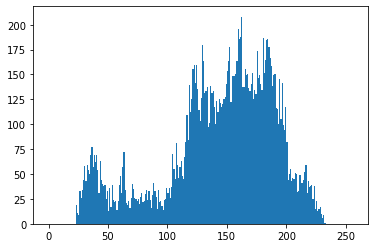

[[42 42 43 ... 62 68 74]
 [42 42 42 ... 60 67 73]
 [39 40 41 ... 60 66 72]
 ...
 [62 64 80 ... 79 88 94]
 [62 67 84 ... 80 89 95]
 [62 68 85 ... 81 89 96]]
the contrast of the images is  [[ 89.26863927  35.92002953]
 [335.83965774 136.63417659]]
the dissimilarity of the images is  [[ 6.15766486  4.0984252 ]
 [12.26339286  8.15575397]]
the homogeneity of the images is  [[0.27314267 0.3034384 ]
 [0.1501897  0.17566035]]
the energy of the images is  [[0.02226853 0.02427928]
 [0.01569582 0.01760127]]
the correlation of the images is  [[0.02226853 0.02427928]
 [0.01569582 0.01760127]]
the ASM of the images is  [[0.00049589 0.00058948]
 [0.00024636 0.0003098 ]]


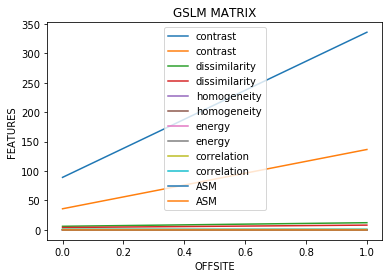

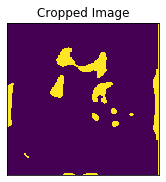

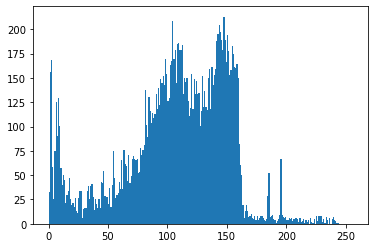

[[ 56  47  39 ... 154 185 195]
 [ 56  47  39 ... 154 185 195]
 [ 55  47  40 ... 154 185 195]
 ...
 [ 53  44  35 ... 153 185 195]
 [ 53  44  34 ... 153 185 195]
 [ 53  44  34 ... 153 185 195]]
the contrast of the images is  [[ 76.0695128   38.64812992]
 [287.27318948 144.72997272]]
the dissimilarity of the images is  [[ 5.19574311  3.95140256]
 [10.29129464  7.86204117]]
the homogeneity of the images is  [[0.31733474 0.36448894]
 [0.19433871 0.23298908]]
the energy of the images is  [[0.02953099 0.03122138]
 [0.02210044 0.02319939]]
the correlation of the images is  [[0.02953099 0.03122138]
 [0.02210044 0.02319939]]
the ASM of the images is  [[0.00087208 0.00097477]
 [0.00048843 0.00053821]]


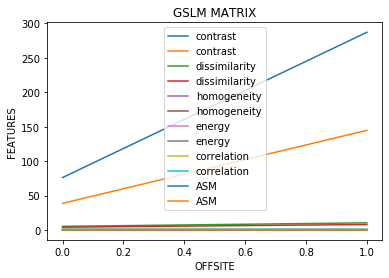

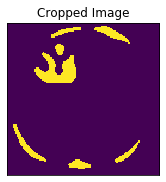

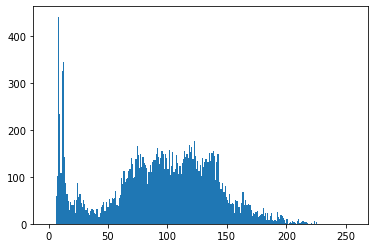

[[ 57  56  50 ... 152 154 155]
 [ 56  51  48 ... 150 152 154]
 [ 51  49  43 ... 145 146 146]
 ...
 [  6   6   6 ...   8   8   8]
 [  6   6   6 ...   8   8   8]
 [  6   6   6 ...   8   8   8]]
the contrast of the images is  [[ 55.32689469  70.51279528]
 [209.13585069 267.12251984]]
the dissimilarity of the images is  [[4.55179626 4.91535433]
 [9.08699157 9.81758433]]
the homogeneity of the images is  [[0.33485649 0.36389412]
 [0.21351115 0.23735656]]
the energy of the images is  [[0.04152044 0.04071439]
 [0.03453501 0.03255264]]
the correlation of the images is  [[0.04152044 0.04071439]
 [0.03453501 0.03255264]]
the ASM of the images is  [[0.00172395 0.00165766]
 [0.00119267 0.00105967]]


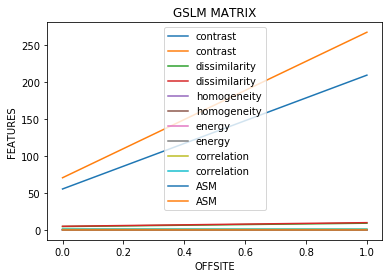

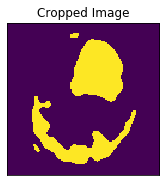

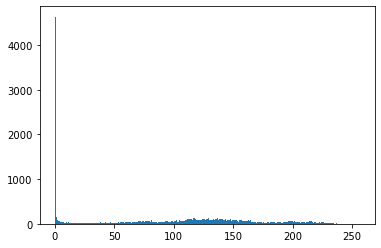

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 63.72010335  49.32701772]
 [239.80084325 187.78521825]]
the dissimilarity of the images is  [[4.55031988 3.88238189]
 [9.11160714 7.76773313]]
the homogeneity of the images is  [[0.45521575 0.46992987]
 [0.36046675 0.37409608]]
the energy of the images is  [[0.26997605 0.27360706]
 [0.25611175 0.26414658]]
the correlation of the images is  [[0.26997605 0.27360706]
 [0.25611175 0.26414658]]
the ASM of the images is  [[0.07288707 0.07486082]
 [0.06559323 0.06977341]]


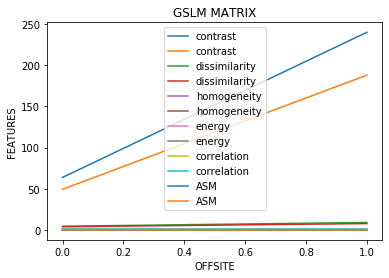

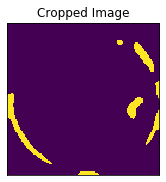

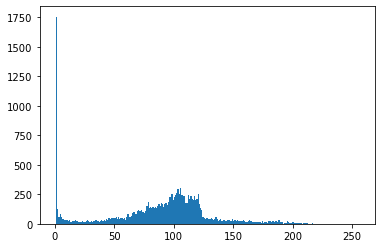

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
the contrast of the images is  [[ 69.17359744  59.49956939]
 [262.57514881 224.97085813]]
the dissimilarity of the images is  [[4.52472933 4.38576526]
 [9.01450893 8.74417163]]
the homogeneity of the images is  [[0.42132198 0.41005713]
 [0.29259725 0.28554929]]
the energy of the images is  [[0.10481396 0.10524866]
 [0.09536375 0.09625067]]
the correlation of the images is  [[0.10481396 0.10524866]
 [0.09536375 0.09625067]]
the ASM of the images is  [[0.01098597 0.01107728]
 [0.00909424 0.00926419]]


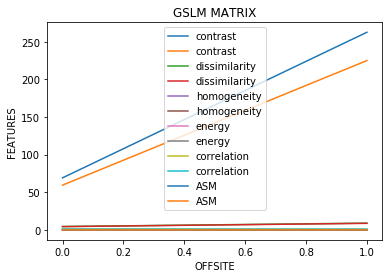

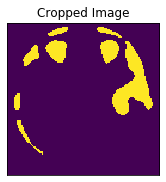

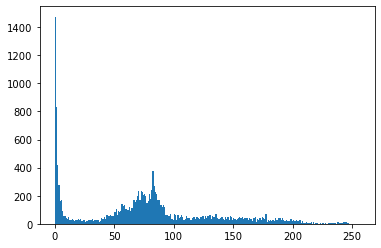

[[1 1 1 ... 2 1 1]
 [1 1 1 ... 2 1 1]
 [1 1 1 ... 2 1 1]
 ...
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 86.63355069  59.59774852]
 [332.63529266 226.48549107]]
the dissimilarity of the images is  [[ 5.01986959  4.2960753 ]
 [10.06200397  8.58866567]]
the homogeneity of the images is  [[0.45888587 0.44212172]
 [0.33710213 0.31694497]]
the energy of the images is  [[0.09600765 0.09960695]
 [0.08310905 0.08942559]]
the correlation of the images is  [[0.09600765 0.09960695]
 [0.08310905 0.08942559]]
the ASM of the images is  [[0.00921747 0.00992154]
 [0.00690711 0.00799694]]


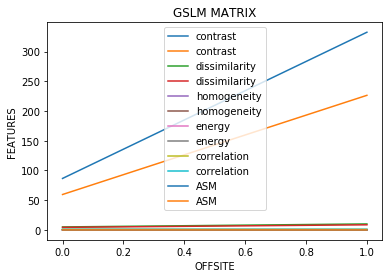

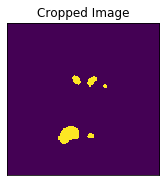

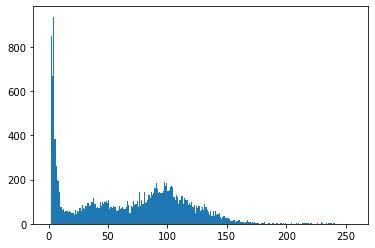

[[4 4 3 ... 8 9 9]
 [4 4 4 ... 9 9 9]
 [4 4 4 ... 9 9 9]
 ...
 [7 7 6 ... 3 3 3]
 [7 7 7 ... 3 3 3]
 [8 7 7 ... 3 3 3]]
the contrast of the images is  [[ 29.21382874  29.65495817]
 [108.98933532 109.9077381 ]]
the dissimilarity of the images is  [[3.42039862 3.29078494]
 [6.82762897 6.55381944]]
the homogeneity of the images is  [[0.41646891 0.42523842]
 [0.28316754 0.29209181]]
the energy of the images is  [[0.07596226 0.07865751]
 [0.06271486 0.06782759]]
the correlation of the images is  [[0.07596226 0.07865751]
 [0.06271486 0.06782759]]
the ASM of the images is  [[0.00577026 0.006187  ]
 [0.00393315 0.00460058]]


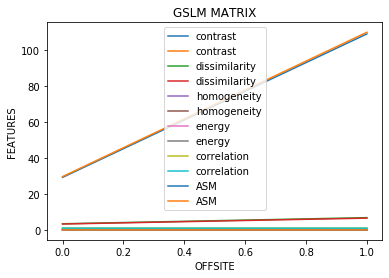

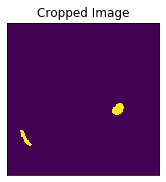

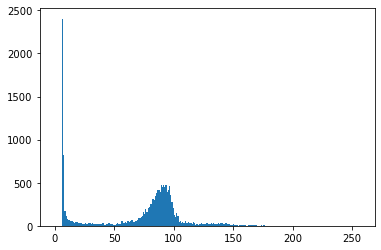

[[6 6 6 ... 6 6 6]
 [6 6 6 ... 6 6 6]
 [6 6 6 ... 6 6 6]
 ...
 [6 6 6 ... 6 6 6]
 [6 6 6 ... 6 6 6]
 [6 6 6 ... 6 6 6]]
the contrast of the images is  [[ 33.29841289  24.41510827]
 [125.32744296  92.75136409]]
the dissimilarity of the images is  [[2.77565207 2.5605315 ]
 [5.54929315 5.11941964]]
the homogeneity of the images is  [[0.54082198 0.54521301]
 [0.40359749 0.40793635]]
the energy of the images is  [[0.15134159 0.14742992]
 [0.13787725 0.12938958]]
the correlation of the images is  [[0.15134159 0.14742992]
 [0.13787725 0.12938958]]
the ASM of the images is  [[0.02290428 0.02173558]
 [0.01901014 0.01674166]]


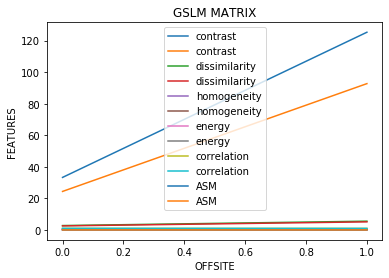

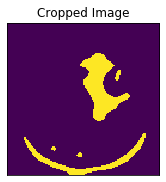

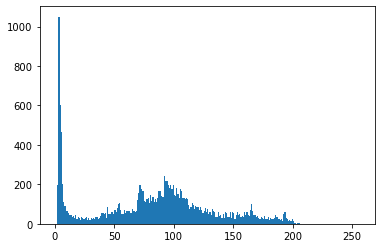

[[ 2  2  2 ...  2  2  2]
 [ 2  2  2 ...  2  2  2]
 [ 3  2  2 ...  2  2  2]
 ...
 [ 3  3  3 ... 19 20 20]
 [ 3  3  3 ... 22 24 25]
 [ 3  3  3 ... 24 25 26]]
the contrast of the images is  [[ 56.34971703  50.24981545]
 [214.51946925 189.85193452]]
the dissimilarity of the images is  [[4.55210384 4.03758612]
 [9.1186756  8.06361607]]
the homogeneity of the images is  [[0.38701556 0.41370436]
 [0.26377605 0.27978733]]
the energy of the images is  [[0.07307387 0.0703675 ]
 [0.06346725 0.05807608]]
the correlation of the images is  [[0.07307387 0.0703675 ]
 [0.06346725 0.05807608]]
the ASM of the images is  [[0.00533979 0.00495158]
 [0.00402809 0.00337283]]


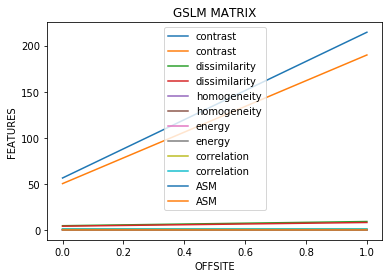

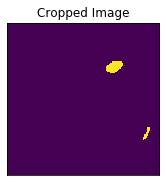

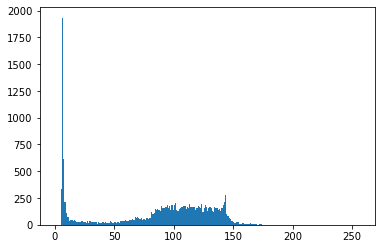

[[5 5 5 ... 6 6 6]
 [5 5 5 ... 6 6 6]
 [5 5 5 ... 6 6 6]
 ...
 [6 6 6 ... 6 6 6]
 [6 6 6 ... 6 6 6]
 [7 7 7 ... 7 7 7]]
the contrast of the images is  [[ 56.60808317  41.96635089]
 [214.27250744 158.57800099]]
the dissimilarity of the images is  [[4.26457923 3.71487451]
 [8.53391617 7.41158234]]
the homogeneity of the images is  [[0.41037633 0.4204284 ]
 [0.2920753  0.29930198]]
the energy of the images is  [[0.11621356 0.11574455]
 [0.10479985 0.10371329]]
the correlation of the images is  [[0.11621356 0.11574455]
 [0.10479985 0.10371329]]
the ASM of the images is  [[0.01350559 0.0133968 ]
 [0.01098301 0.01075645]]


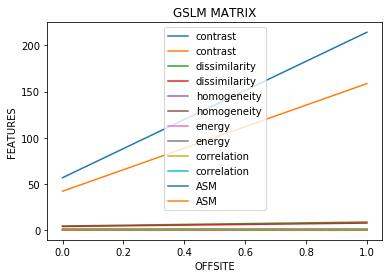

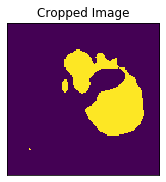

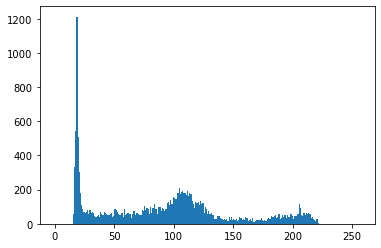

[[20 20 20 ... 18 18 18]
 [20 20 20 ... 18 18 18]
 [19 19 19 ... 17 17 17]
 ...
 [18 18 18 ... 17 17 17]
 [19 19 19 ... 17 17 17]
 [19 19 19 ... 18 18 18]]
the contrast of the images is  [[ 55.62506152  44.88318159]
 [209.02771577 170.61631944]]
the dissimilarity of the images is  [[4.56662156 4.02245325]
 [9.1296503  8.02616567]]
the homogeneity of the images is  [[0.39275561 0.41179904]
 [0.27487792 0.29319413]]
the energy of the images is  [[0.07741451 0.08131785]
 [0.0651832  0.07255755]]
the correlation of the images is  [[0.07741451 0.08131785]
 [0.0651832  0.07255755]]
the ASM of the images is  [[0.00599301 0.00661259]
 [0.00424885 0.0052646 ]]


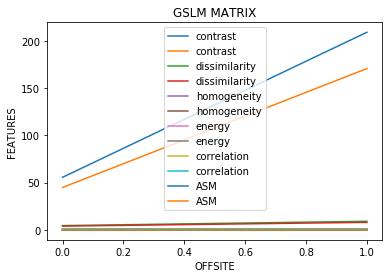

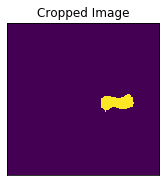

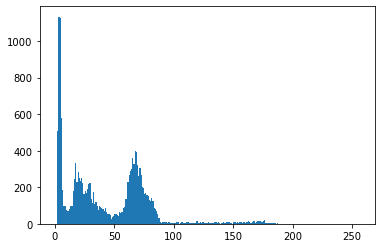

[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 2 3 3]
 [3 3 3 ... 2 3 3]]
the contrast of the images is  [[14.81569882 11.38773376]
 [56.03397817 43.47767857]]
the dissimilarity of the images is  [[2.1363189  1.93780758]
 [4.27380952 3.87896825]]
the homogeneity of the images is  [[0.5370792  0.54971489]
 [0.39774938 0.4078039 ]]
the energy of the images is  [[0.10023605 0.10092533]
 [0.08410654 0.08481198]]
the correlation of the images is  [[0.10023605 0.10092533]
 [0.08410654 0.08481198]]
the ASM of the images is  [[0.01004727 0.01018592]
 [0.00707391 0.00719307]]


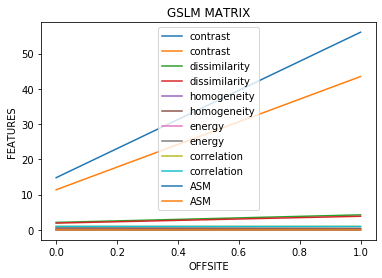

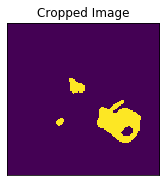

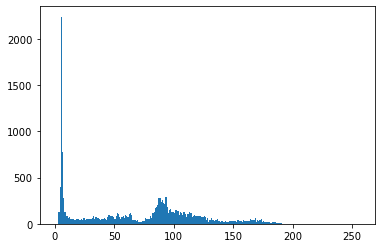

[[4 4 5 ... 3 3 3]
 [4 4 5 ... 3 3 3]
 [4 5 5 ... 4 3 3]
 ...
 [5 5 5 ... 4 3 3]
 [5 5 5 ... 4 3 3]
 [5 5 5 ... 4 3 3]]
the contrast of the images is  [[22.62961368 22.7820497 ]
 [85.65866815 86.24857391]]
the dissimilarity of the images is  [[2.84307333 2.87998278]
 [5.68781002 5.75849454]]
the homogeneity of the images is  [[0.47643795 0.46287646]
 [0.34800186 0.34108854]]
the energy of the images is  [[0.1343003  0.1331037 ]
 [0.12070176 0.11920804]]
the correlation of the images is  [[0.1343003  0.1331037 ]
 [0.12070176 0.11920804]]
the ASM of the images is  [[0.01803657 0.0177166 ]
 [0.01456891 0.01421056]]


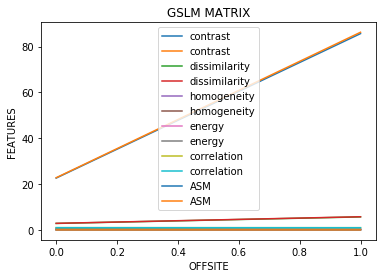

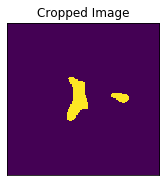

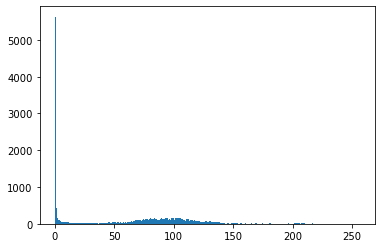

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 49.52196112  43.55757874]
 [187.09548611 163.17931548]]
the dissimilarity of the images is  [[3.71598179 3.33366142]
 [7.44419643 6.66170635]]
the homogeneity of the images is  [[0.53092496 0.54824962]
 [0.43868213 0.45266134]]
the energy of the images is  [[0.33274155 0.33038516]
 [0.32046959 0.31571465]]
the correlation of the images is  [[0.33274155 0.33038516]
 [0.32046959 0.31571465]]
the ASM of the images is  [[0.11071694 0.10915435]
 [0.10270076 0.09967574]]


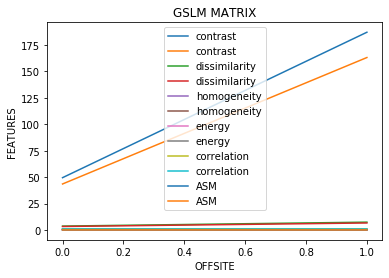

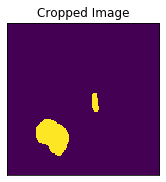

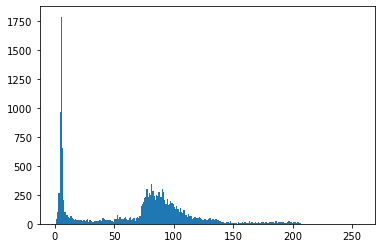

[[1 1 1 ... 4 4 4]
 [1 1 1 ... 4 4 4]
 [1 1 1 ... 4 4 4]
 ...
 [2 2 3 ... 4 4 4]
 [2 2 3 ... 4 4 4]
 [2 2 3 ... 4 4 4]]
the contrast of the images is  [[ 29.76587106  23.6394562 ]
 [112.43092758  90.40656002]]
the dissimilarity of the images is  [[3.28813976 2.77688238]
 [6.57911706 5.5500372 ]]
the homogeneity of the images is  [[0.44780863 0.50001435]
 [0.3229396  0.37946214]]
the energy of the images is  [[0.1191899  0.12022586]
 [0.10657487 0.10508726]]
the correlation of the images is  [[0.1191899  0.12022586]
 [0.10657487 0.10508726]]
the ASM of the images is  [[0.01420623 0.01445426]
 [0.0113582  0.01104333]]


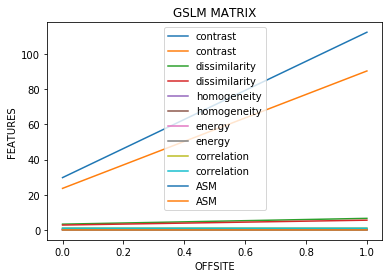

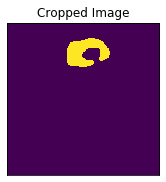

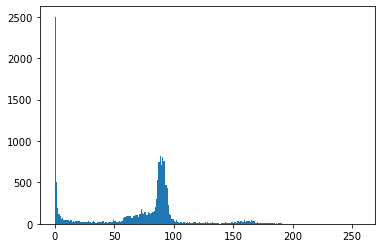

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 27.69592766  24.6320128 ]
 [103.70523313  93.55543155]]
the dissimilarity of the images is  [[2.53734006 2.3972687 ]
 [5.07986111 4.79476687]]
the homogeneity of the images is  [[0.59452544 0.59784817]
 [0.47004277 0.47502089]]
the energy of the images is  [[0.16584033 0.16502008]
 [0.14970477 0.14659729]]
the correlation of the images is  [[0.16584033 0.16502008]
 [0.14970477 0.14659729]]
the ASM of the images is  [[0.02750302 0.02723163]
 [0.02241152 0.02149077]]


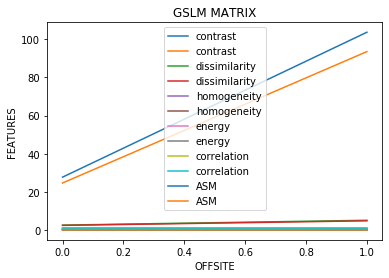

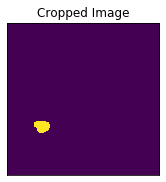

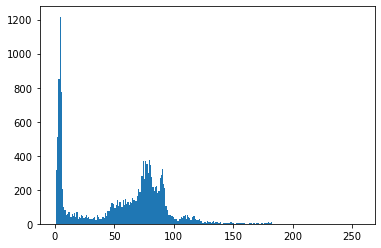

[[2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
the contrast of the images is  [[ 44.11460384  37.38447343]
 [166.56938244 141.16269841]]
the dissimilarity of the images is  [[3.43091781 3.31656004]
 [6.8718378  6.64446925]]
the homogeneity of the images is  [[0.50087187 0.50020334]
 [0.37238551 0.3676275 ]]
the energy of the images is  [[0.10146039 0.09611371]
 [0.08890426 0.08106476]]
the correlation of the images is  [[0.10146039 0.09611371]
 [0.08890426 0.08106476]]
the ASM of the images is  [[0.01029421 0.00923784]
 [0.00790397 0.0065715 ]]


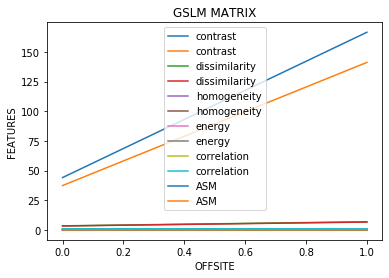

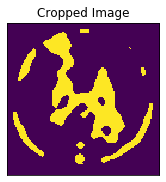

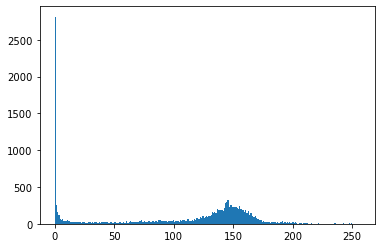

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 84.18417815  68.71555118]
 [320.26116071 263.60565476]]
the dissimilarity of the images is  [[4.97182579 4.38656496]
 [9.95052083 8.76438492]]
the homogeneity of the images is  [[0.41728643 0.4555493 ]
 [0.29904591 0.33557358]]
the energy of the images is  [[0.16471852 0.16480788]
 [0.15438029 0.15387889]]
the correlation of the images is  [[0.16471852 0.16480788]
 [0.15438029 0.15387889]]
the ASM of the images is  [[0.02713219 0.02716164]
 [0.02383328 0.02367871]]


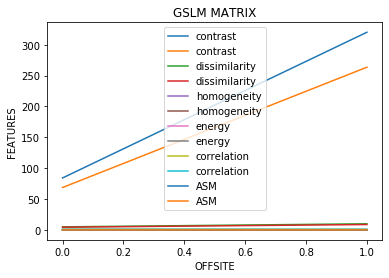

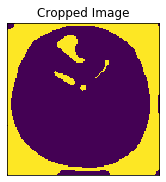

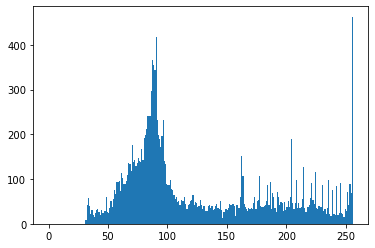

[[ 57  63  70 ... 153 148 143]
 [ 63  67  83 ... 159 153 148]
 [ 70  83  90 ... 165 153 153]
 ...
 [165 172 180 ... 155 148 141]
 [157 164 171 ... 148 141 138]
 [151 157 164 ... 141 138 132]]
the contrast of the images is  [[ 74.27706693  61.7253937 ]
 [281.8484003  230.89732143]]
the dissimilarity of the images is  [[ 5.07271161  4.54072343]
 [10.12692212  8.99950397]]
the homogeneity of the images is  [[0.35274215 0.37718327]
 [0.2279604  0.25138684]]
the energy of the images is  [[0.04185364 0.04376034]
 [0.03359016 0.03504006]]
the correlation of the images is  [[0.04185364 0.04376034]
 [0.03359016 0.03504006]]
the ASM of the images is  [[0.00175173 0.00191497]
 [0.0011283  0.00122781]]


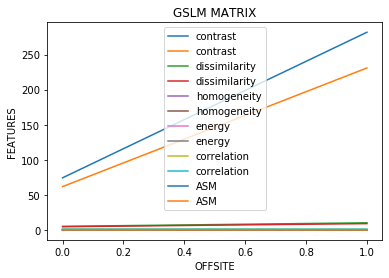

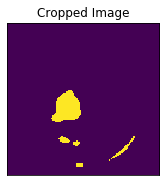

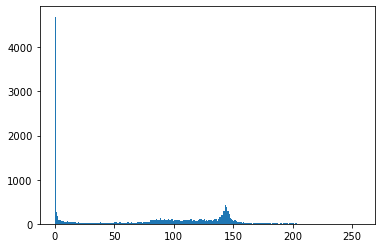

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [13 13 14 ...  0  0  0]
 [17 17 17 ...  0  0  0]
 [17 17 17 ...  0  0  0]]
the contrast of the images is  [[ 42.93147146  51.74821604]
 [164.43365575 197.91517857]]
the dissimilarity of the images is  [[3.60580709 3.65864911]
 [7.23239087 7.32676091]]
the homogeneity of the images is  [[0.50784253 0.53718235]
 [0.40692638 0.43780679]]
the energy of the images is  [[0.27585957 0.2785136 ]
 [0.26247536 0.26768037]]
the correlation of the images is  [[0.27585957 0.2785136 ]
 [0.26247536 0.26768037]]
the ASM of the images is  [[0.0760985  0.07756983]
 [0.06889332 0.07165278]]


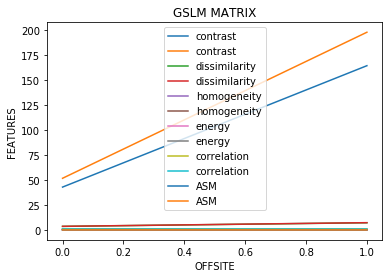

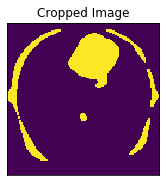

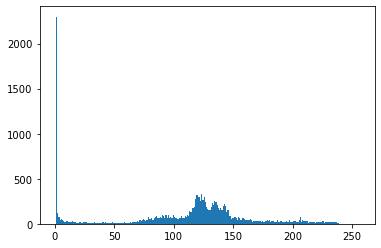

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
the contrast of the images is  [[ 96.86675689  73.59498031]
 [367.76190476 275.53404018]]
the dissimilarity of the images is  [[ 5.28998524  4.51648622]
 [10.57800099  9.01184276]]
the homogeneity of the images is  [[0.42070446 0.45094722]
 [0.2951943  0.32544309]]
the energy of the images is  [[0.13404803 0.13606495]
 [0.12292275 0.12598209]]
the correlation of the images is  [[0.13404803 0.13606495]
 [0.12292275 0.12598209]]
the ASM of the images is  [[0.01796887 0.01851367]
 [0.01511    0.01587149]]


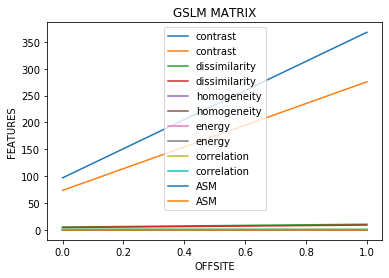

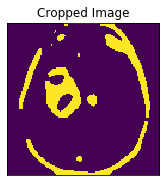

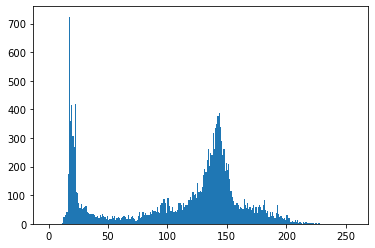

[[15 15 15 ... 33 33 33]
 [15 15 15 ... 30 31 31]
 [14 14 14 ... 27 27 28]
 ...
 [18 18 18 ... 57 64 69]
 [19 19 19 ... 62 70 71]
 [19 19 19 ... 69 71 77]]
the contrast of the images is  [[ 92.29060039  52.17901083]
 [349.8640253  196.70027282]]
the dissimilarity of the images is  [[ 5.41006398  4.01550197]
 [10.8312872   7.96775794]]
the homogeneity of the images is  [[0.41075043 0.44148764]
 [0.2800985  0.31922032]]
the energy of the images is  [[0.06089051 0.06587166]
 [0.04837327 0.05634581]]
the correlation of the images is  [[0.06089051 0.06587166]
 [0.04837327 0.05634581]]
the ASM of the images is  [[0.00370765 0.00433908]
 [0.00233997 0.00317485]]


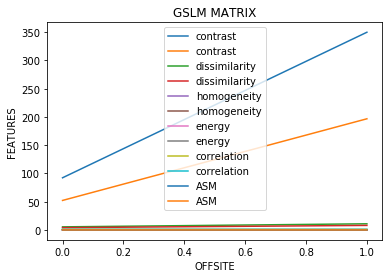

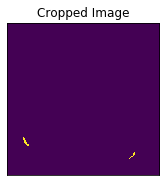

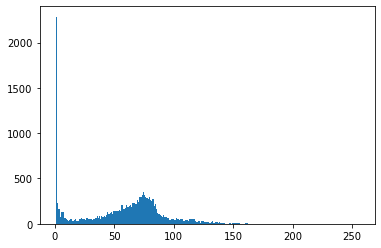

[[ 7  7  7 ...  7  7  7]
 [ 6  6  6 ...  6  6  6]
 [ 5  5  5 ...  5  5  5]
 ...
 [13 11 10 ...  1  1  1]
 [13 13 10 ...  1  1  1]
 [13 13 10 ...  1  1  1]]
the contrast of the images is  [[ 59.05419537  41.33144685]
 [223.66524058 155.25055804]]
the dissimilarity of the images is  [[4.1281373  3.51648622]
 [8.25762649 7.01953125]]
the homogeneity of the images is  [[0.47159215 0.45595716]
 [0.34636601 0.32427799]]
the energy of the images is  [[0.13368521 0.13694762]
 [0.12145908 0.12819436]]
the correlation of the images is  [[0.13368521 0.13694762]
 [0.12145908 0.12819436]]
the ASM of the images is  [[0.01787174 0.01875465]
 [0.01475231 0.01643379]]


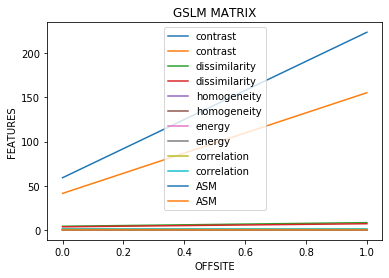

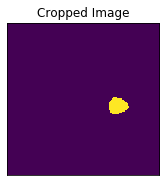

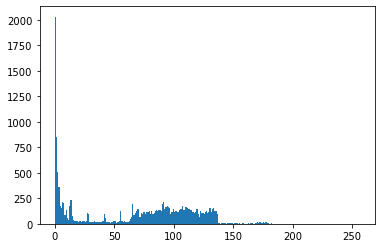

[[64 54 41 ... 11 14 14]
 [64 54 41 ... 10 14 14]
 [64 54 41 ... 10 13 14]
 ...
 [67 61 61 ... 13 15 16]
 [58 58 55 ... 14 16 17]
 [58 55 53 ... 16 17 18]]
the contrast of the images is  [[ 32.88533465  30.30198081]
 [122.63082837 113.94630456]]
the dissimilarity of the images is  [[2.98019193 2.73382136]
 [5.89248512 5.47519841]]
the homogeneity of the images is  [[0.50096391 0.52918342]
 [0.37484479 0.39864658]]
the energy of the images is  [[0.13003379 0.12855133]
 [0.11995472 0.11577155]]
the correlation of the images is  [[0.13003379 0.12855133]
 [0.11995472 0.11577155]]
the ASM of the images is  [[0.01690879 0.01652544]
 [0.01438913 0.01340305]]


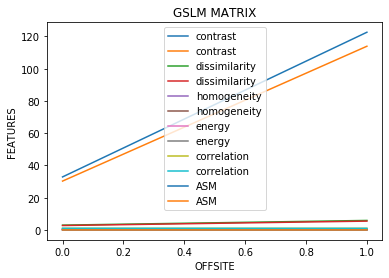

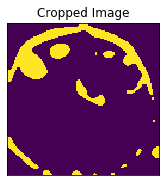

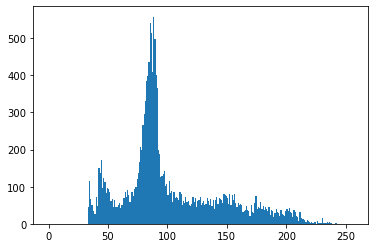

[[ 33  33  33 ... 110 116 118]
 [ 33  33  33 ... 105 110 113]
 [ 34  34  34 ... 101 101 101]
 ...
 [ 33  33  33 ...  50  49  49]
 [ 33  33  33 ...  46  46  45]
 [ 33  33  33 ...  45  45  44]]
the contrast of the images is  [[ 44.6136811   58.86226624]
 [169.47327629 224.5562996 ]]
the dissimilarity of the images is  [[3.98609744 4.62050935]
 [7.937562   9.20721726]]
the homogeneity of the images is  [[0.41089001 0.39210501]
 [0.27959231 0.26428369]]
the energy of the images is  [[0.05281182 0.05169152]
 [0.03982711 0.03885074]]
the correlation of the images is  [[0.05281182 0.05169152]
 [0.03982711 0.03885074]]
the ASM of the images is  [[0.00278909 0.00267201]
 [0.0015862  0.00150938]]


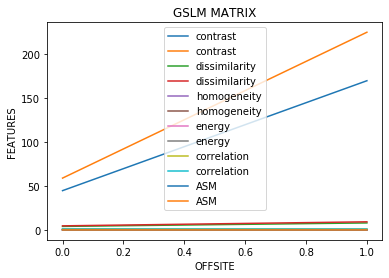

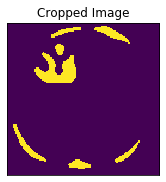

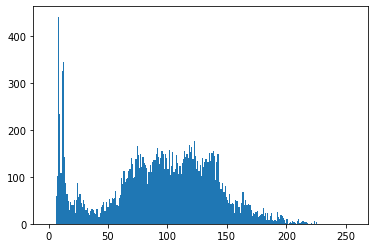

[[ 57  56  50 ... 152 154 155]
 [ 56  51  48 ... 150 152 154]
 [ 51  49  43 ... 145 146 146]
 ...
 [  6   6   6 ...   8   8   8]
 [  6   6   6 ...   8   8   8]
 [  6   6   6 ...   8   8   8]]
the contrast of the images is  [[ 55.32689469  70.51279528]
 [209.13585069 267.12251984]]
the dissimilarity of the images is  [[4.55179626 4.91535433]
 [9.08699157 9.81758433]]
the homogeneity of the images is  [[0.33485649 0.36389412]
 [0.21351115 0.23735656]]
the energy of the images is  [[0.04152044 0.04071439]
 [0.03453501 0.03255264]]
the correlation of the images is  [[0.04152044 0.04071439]
 [0.03453501 0.03255264]]
the ASM of the images is  [[0.00172395 0.00165766]
 [0.00119267 0.00105967]]


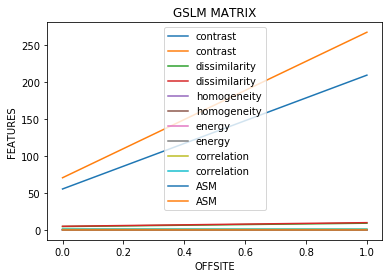

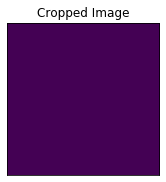

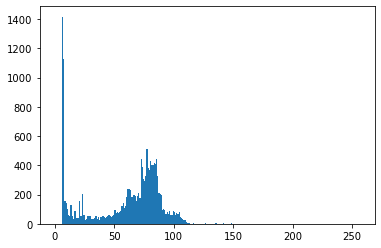

[[23 23 23 ... 23 23 23]
 [20 20 20 ... 20 20 20]
 [16 16 16 ... 16 16 16]
 ...
 [ 6  6  6 ...  6  6  6]
 [ 6  6  6 ...  6  6  6]
 [ 6  6  6 ...  6  6  6]]
the contrast of the images is  [[23.16393947 14.37727608]
 [86.70064484 53.74956597]]
the dissimilarity of the images is  [[2.45330955 2.1242003 ]
 [4.90488591 4.22885665]]
the homogeneity of the images is  [[0.55313682 0.54921642]
 [0.41711272 0.41779182]]
the energy of the images is  [[0.11103555 0.1128089 ]
 [0.09593935 0.09866352]]
the correlation of the images is  [[0.11103555 0.1128089 ]
 [0.09593935 0.09866352]]
the ASM of the images is  [[0.01232889 0.01272585]
 [0.00920436 0.00973449]]


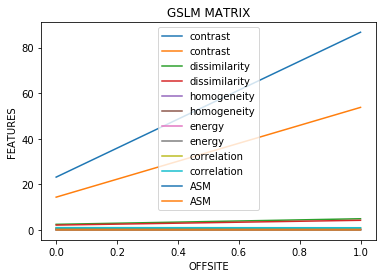

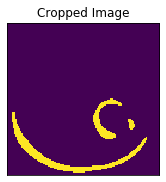

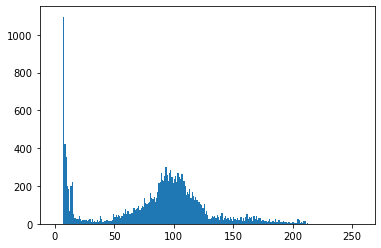

[[15 15 13 ... 13 15 15]
 [15 14 13 ... 13 14 15]
 [15 14 13 ... 12 14 15]
 ...
 [15 14 12 ... 12 14 15]
 [15 14 13 ... 13 14 15]
 [15 15 13 ... 13 15 15]]
the contrast of the images is  [[ 48.1148499   63.19482037]
 [182.80443948 238.98877728]]
the dissimilarity of the images is  [[4.06871309 4.23172982]
 [8.12673611 8.45715526]]
the homogeneity of the images is  [[0.39766743 0.43550967]
 [0.26634065 0.30505416]]
the energy of the images is  [[0.07294948 0.07448727]
 [0.06479781 0.06602292]]
the correlation of the images is  [[0.07294948 0.07448727]
 [0.06479781 0.06602292]]
the ASM of the images is  [[0.00532163 0.00554835]
 [0.00419876 0.00435903]]


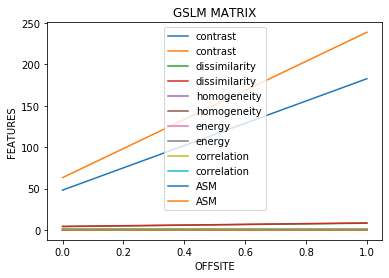

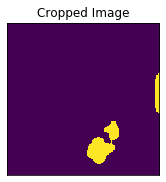

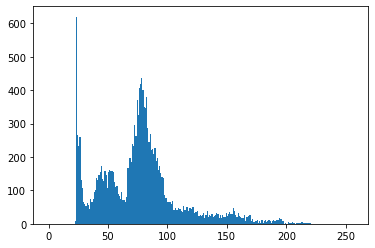

[[30 30 30 ... 74 74 72]
 [30 30 29 ... 76 74 74]
 [30 30 29 ... 77 75 74]
 ...
 [26 26 26 ... 95 81 78]
 [26 26 26 ... 98 82 78]
 [26 26 26 ... 98 82 78]]
the contrast of the images is  [[ 28.140625    11.13902559]
 [106.55208333  42.02721974]]
the dissimilarity of the images is  [[3.2230561  2.08169291]
 [6.43018353 4.13671875]]
the homogeneity of the images is  [[0.39672569 0.48550197]
 [0.25258944 0.3377687 ]]
the energy of the images is  [[0.05280929 0.05882729]
 [0.04174822 0.04796934]]
the correlation of the images is  [[0.05280929 0.05882729]
 [0.04174822 0.04796934]]
the ASM of the images is  [[0.00278882 0.00346065]
 [0.00174291 0.00230106]]


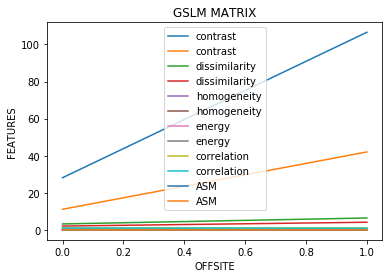

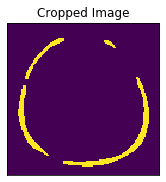

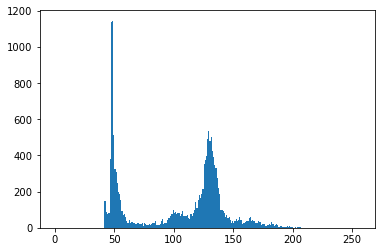

[[41 41 42 ... 47 47 47]
 [41 41 42 ... 47 47 47]
 [41 41 42 ... 47 47 47]
 ...
 [41 41 42 ... 47 47 47]
 [41 41 42 ... 46 46 46]
 [41 41 42 ... 46 46 46]]
the contrast of the images is  [[ 47.54404528  45.64905266]
 [178.03683036 171.52740575]]
the dissimilarity of the images is  [[3.30413386 3.19949557]
 [6.62127976 6.41480655]]
the homogeneity of the images is  [[0.52840638 0.56235351]
 [0.38197071 0.42057163]]
the energy of the images is  [[0.09828987 0.09743931]
 [0.08208509 0.07688582]]
the correlation of the images is  [[0.09828987 0.09743931]
 [0.08208509 0.07688582]]
the ASM of the images is  [[0.0096609  0.00949442]
 [0.00673796 0.00591143]]


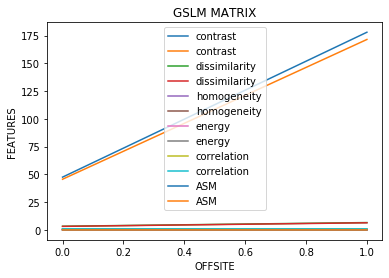

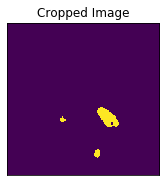

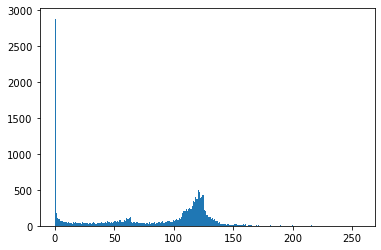

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[16.12438484 16.95152559]
 [61.96831597 64.45696925]]
the dissimilarity of the images is  [[2.44980315 2.40674213]
 [4.8999876  4.81001984]]
the homogeneity of the images is  [[0.49080843 0.51601482]
 [0.36618363 0.39173192]]
the energy of the images is  [[0.17100511 0.17368769]
 [0.1583398  0.16264591]]
the correlation of the images is  [[0.17100511 0.17368769]
 [0.1583398  0.16264591]]
the ASM of the images is  [[0.02924275 0.03016741]
 [0.02507149 0.02645369]]


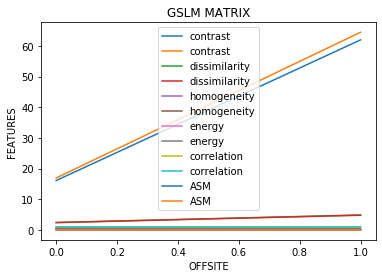

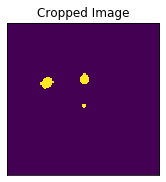

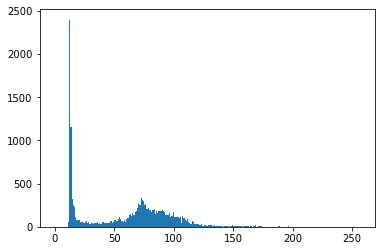

[[12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 ...
 [11 12 12 ... 12 12 12]
 [11 11 12 ... 12 12 12]
 [11 11 12 ... 12 12 12]]
the contrast of the images is  [[18.6163878  16.12315453]
 [70.03552827 60.73790923]]
the dissimilarity of the images is  [[2.58968996 2.45595472]
 [5.1703249  4.89267113]]
the homogeneity of the images is  [[0.49235209 0.48776618]
 [0.36941797 0.36537696]]
the energy of the images is  [[0.15036265 0.14833416]
 [0.13587976 0.13343062]]
the correlation of the images is  [[0.15036265 0.14833416]
 [0.13587976 0.13343062]]
the ASM of the images is  [[0.02260893 0.02200302]
 [0.01846331 0.01780373]]


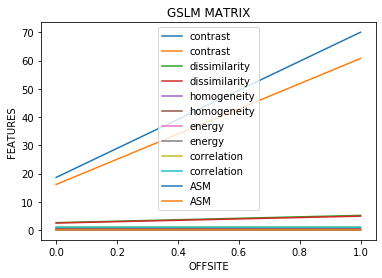

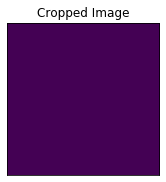

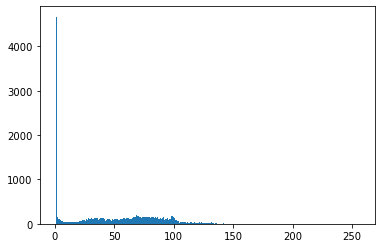

[[24 24 21 ...  1  1  1]
 [24 24 23 ...  1  1  1]
 [26 26 24 ...  1  1  1]
 ...
 [28 28 29 ...  1  1  1]
 [22 22 22 ...  1  1  1]
 [22 22 22 ...  1  1  1]]
the contrast of the images is  [[ 58.56151575  42.9128937 ]
 [217.96081349 160.94549851]]
the dissimilarity of the images is  [[4.14505413 3.4664124 ]
 [8.29513889 6.91499256]]
the homogeneity of the images is  [[0.4822788  0.50114232]
 [0.38098432 0.3993198 ]]
the energy of the images is  [[0.27228202 0.27526537]
 [0.25847714 0.2645456 ]]
the correlation of the images is  [[0.27228202 0.27526537]
 [0.25847714 0.2645456 ]]
the ASM of the images is  [[0.0741375  0.07577103]
 [0.06681043 0.06998437]]


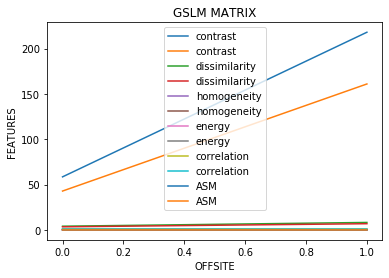

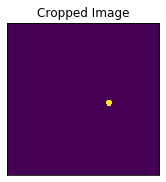

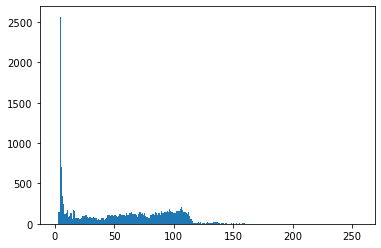

[[ 6  6  6 ...  4  4  4]
 [ 6  6  6 ...  4  4  4]
 [ 6  6  5 ...  4  4  4]
 ...
 [15 15 15 ... 26 27 27]
 [18 17 17 ... 27 27 27]
 [18 18 17 ... 27 27 27]]
the contrast of the images is  [[12.49243356 10.66400098]
 [46.91741071 40.0703745 ]]
the dissimilarity of the images is  [[2.03524852 1.98695866]
 [4.0766369  3.97253224]]
the homogeneity of the images is  [[0.54237547 0.5153752 ]
 [0.40372899 0.37867638]]
the energy of the images is  [[0.15390329 0.15225846]
 [0.14229082 0.14002974]]
the correlation of the images is  [[0.15390329 0.15225846]
 [0.14229082 0.14002974]]
the ASM of the images is  [[0.02368622 0.02318264]
 [0.02024668 0.01960833]]


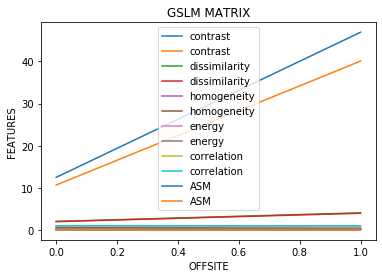

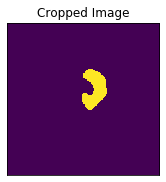

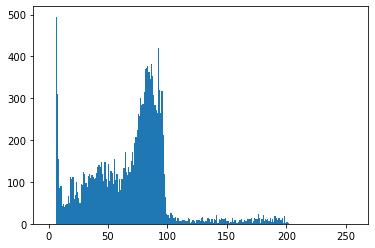

[[28 24 19 ... 42 55 64]
 [28 24 19 ... 42 55 64]
 [28 24 19 ... 42 55 64]
 ...
 [63 64 66 ... 42 54 63]
 [61 63 65 ... 42 54 64]
 [61 61 63 ... 42 54 64]]
the contrast of the images is  [[23.74058809 18.9789001 ]
 [88.62295387 71.79557292]]
the dissimilarity of the images is  [[3.056656   2.56612943]
 [6.04743304 5.11675347]]
the homogeneity of the images is  [[0.41985924 0.47823973]
 [0.27301089 0.33294426]]
the energy of the images is  [[0.05408466 0.0579827 ]
 [0.04281337 0.04555349]]
the correlation of the images is  [[0.05408466 0.0579827 ]
 [0.04281337 0.04555349]]
the ASM of the images is  [[0.00292515 0.00336199]
 [0.00183298 0.00207512]]


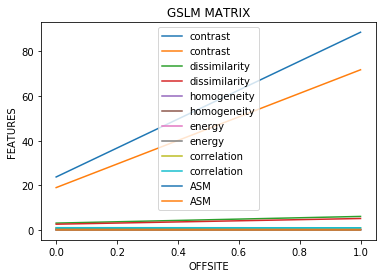

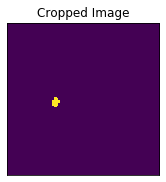

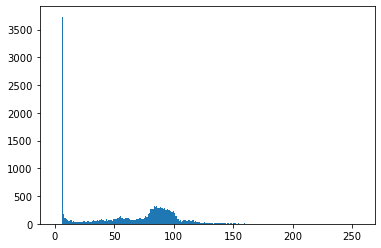

[[6 6 6 ... 6 6 6]
 [6 6 6 ... 6 6 6]
 [6 6 6 ... 6 6 6]
 ...
 [6 6 6 ... 6 6 6]
 [6 6 6 ... 6 6 6]
 [6 6 6 ... 6 6 6]]
the contrast of the images is  [[ 28.69955709  22.35574557]
 [109.52938988  84.07291667]]
the dissimilarity of the images is  [[3.16080217 2.66910679]
 [6.32911706 5.33134921]]
the homogeneity of the images is  [[0.47474122 0.51191117]
 [0.35765044 0.39159824]]
the energy of the images is  [[0.21590154 0.22048043]
 [0.20092281 0.21002125]]
the correlation of the images is  [[0.21590154 0.22048043]
 [0.20092281 0.21002125]]
the ASM of the images is  [[0.04661347 0.04861162]
 [0.04036998 0.04410893]]


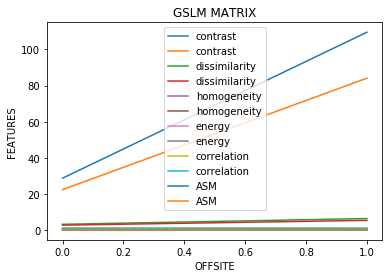

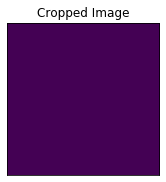

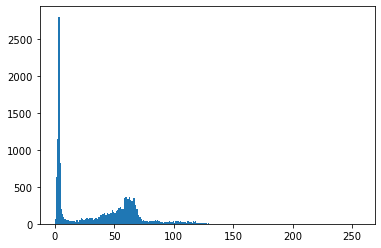

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 0]
 ...
 [1 1 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]]
the contrast of the images is  [[17.79613681 17.23843504]
 [66.51481895 64.69301835]]
the dissimilarity of the images is  [[2.20755413 1.98818898]
 [4.42379712 3.97426835]]
the homogeneity of the images is  [[0.58513762 0.60693695]
 [0.46167142 0.48636562]]
the energy of the images is  [[0.1790557  0.18190122]
 [0.15971653 0.16796403]]
the correlation of the images is  [[0.1790557  0.18190122]
 [0.15971653 0.16796403]]
the ASM of the images is  [[0.03206094 0.03308805]
 [0.02550937 0.02821192]]


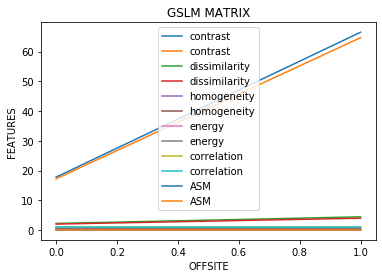

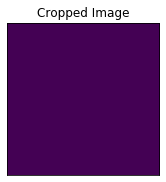

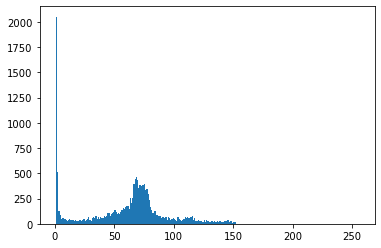

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [8 7 7 ... 1 1 1]
 [8 8 8 ... 1 1 1]
 [9 9 9 ... 1 1 1]]
the contrast of the images is  [[ 30.94445128  25.45970719]
 [115.46304563  94.82068452]]
the dissimilarity of the images is  [[3.08224656 2.72680856]
 [6.16121032 5.42361111]]
the homogeneity of the images is  [[0.49208212 0.50152301]
 [0.35744246 0.36504602]]
the energy of the images is  [[0.12503798 0.12846899]
 [0.11191513 0.11821037]]
the correlation of the images is  [[0.12503798 0.12846899]
 [0.11191513 0.11821037]]
the ASM of the images is  [[0.0156345  0.01650428]
 [0.012525   0.01397369]]


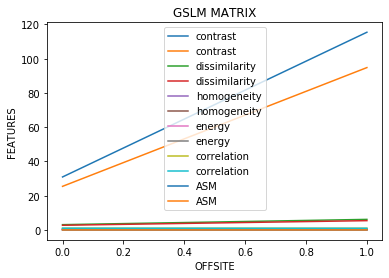

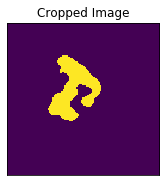

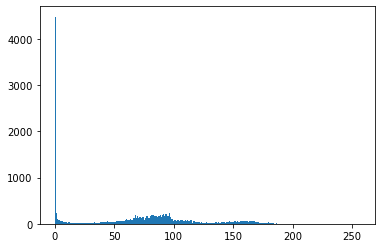

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 32.76537894  24.4913878 ]
 [122.84895833  91.72867063]]
the dissimilarity of the images is  [[3.20300197 2.67445866]
 [6.42001488 5.34176587]]
the homogeneity of the images is  [[0.50054674 0.52414428]
 [0.3907242  0.41111813]]
the energy of the images is  [[0.26170602 0.26606047]
 [0.24776784 0.25655638]]
the correlation of the images is  [[0.26170602 0.26606047]
 [0.24776784 0.25655638]]
the ASM of the images is  [[0.06849004 0.07078817]
 [0.0613889  0.06582118]]


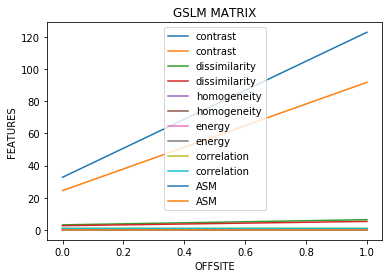

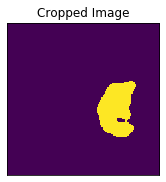

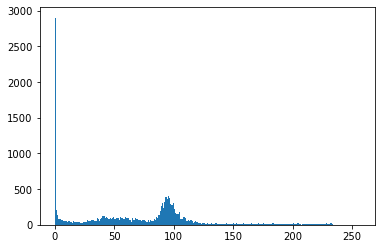

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 27.41473917  22.34756398]
 [103.39335317  84.21912202]]
the dissimilarity of the images is  [[3.11122047 2.83181594]
 [6.22420635 5.65649802]]
the homogeneity of the images is  [[0.47368424 0.47612652]
 [0.3493381  0.35326578]]
the energy of the images is  [[0.17072459 0.16967266]
 [0.15941635 0.15762526]]
the correlation of the images is  [[0.17072459 0.16967266]
 [0.15941635 0.15762526]]
the ASM of the images is  [[0.02914688 0.02878881]
 [0.02541357 0.02484572]]


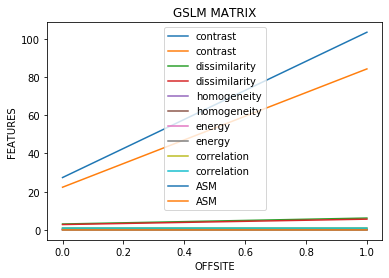

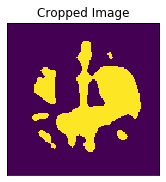

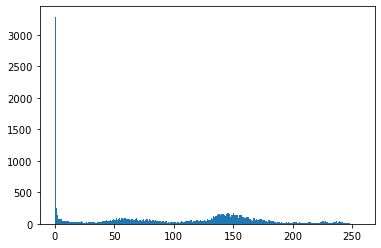

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 46.07492618  30.41301673]
 [175.35478671 116.06125992]]
the dissimilarity of the images is  [[3.97810039 3.2898622 ]
 [7.96602183 6.57043651]]
the homogeneity of the images is  [[0.4349841  0.45527888]
 [0.31784078 0.3435709 ]]
the energy of the images is  [[0.18904819 0.19319875]
 [0.17578052 0.18418119]]
the correlation of the images is  [[0.18904819 0.19319875]
 [0.17578052 0.18418119]]
the ASM of the images is  [[0.03573922 0.03732576]
 [0.03089879 0.03392271]]


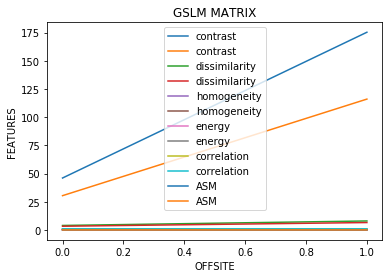

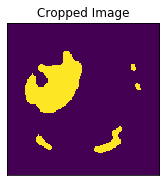

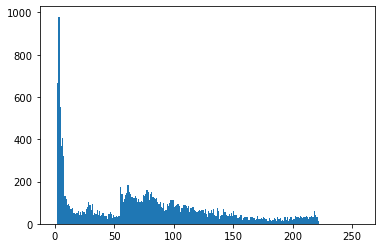

[[ 3  3  3 ... 51 51 54]
 [ 3  3  3 ... 49 50 51]
 [ 3  3  3 ... 38 39 40]
 ...
 [ 2  2  2 ...  2  2  2]
 [ 2  2  2 ...  2  2  2]
 [ 2  2  2 ...  2  2  2]]
the contrast of the images is  [[ 42.55044291  39.89382382]
 [160.79861111 150.06268601]]
the dissimilarity of the images is  [[4.12081693 3.97428642]
 [8.21850198 7.92900546]]
the homogeneity of the images is  [[0.40273102 0.4048955 ]
 [0.29102213 0.28457914]]
the energy of the images is  [[0.07794042 0.07564716]
 [0.06821151 0.06432014]]
the correlation of the images is  [[0.07794042 0.07564716]
 [0.06821151 0.06432014]]
the ASM of the images is  [[0.00607471 0.00572249]
 [0.00465281 0.00413708]]


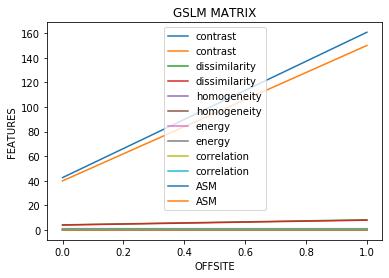

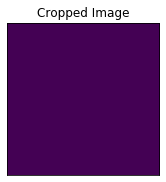

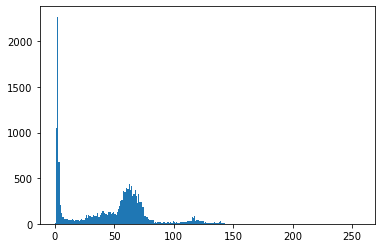

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]
the contrast of the images is  [[ 9.01359498  6.81637549]
 [34.06008185 25.34703621]]
the dissimilarity of the images is  [[1.77958907 1.42907234]
 [3.56752232 2.85075645]]
the homogeneity of the images is  [[0.56127676 0.61216439]
 [0.41949054 0.46873782]]
the energy of the images is  [[0.14344002 0.14601684]
 [0.12314866 0.12690115]]
the correlation of the images is  [[0.14344002 0.14601684]
 [0.12314866 0.12690115]]
the ASM of the images is  [[0.02057504 0.02132092]
 [0.01516559 0.0161039 ]]


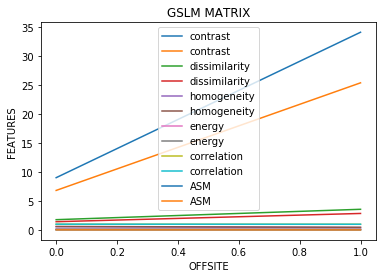

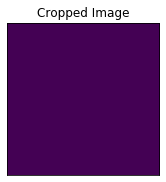

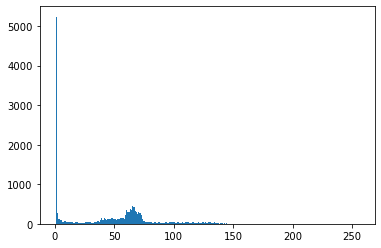

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
the contrast of the images is  [[14.47711614 10.11509596]
 [54.31808036 37.75948661]]
the dissimilarity of the images is  [[1.98523622 1.60943652]
 [3.97916667 3.20839534]]
the homogeneity of the images is  [[0.60320248 0.63639928]
 [0.49091633 0.52564053]]
the energy of the images is  [[0.30914393 0.31369395]
 [0.29453133 0.30387761]]
the correlation of the images is  [[0.30914393 0.31369395]
 [0.29453133 0.30387761]]
the ASM of the images is  [[0.09556997 0.09840389]
 [0.08674871 0.0923416 ]]


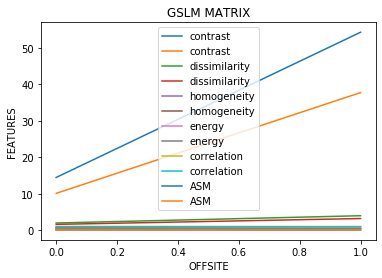

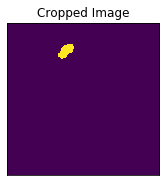

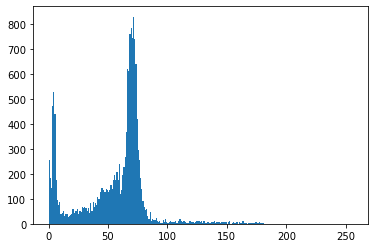

[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [4 4 4 ... 1 1 1]
 [4 4 3 ... 1 1 1]
 [4 4 3 ... 1 1 1]]
the contrast of the images is  [[14.31594488 10.36577264]
 [53.3530506  38.953125  ]]
the dissimilarity of the images is  [[2.19475886 1.79244587]
 [4.37934028 3.57589286]]
the homogeneity of the images is  [[0.52994142 0.55707124]
 [0.38070706 0.40505975]]
the energy of the images is  [[0.08363267 0.08628158]
 [0.06369229 0.06587143]]
the correlation of the images is  [[0.08363267 0.08628158]
 [0.06369229 0.06587143]]
the ASM of the images is  [[0.00699442 0.00744451]
 [0.00405671 0.00433905]]


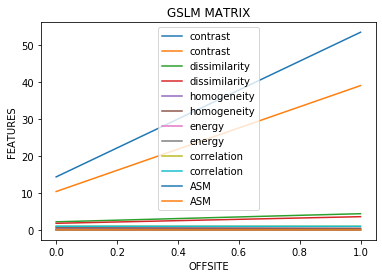

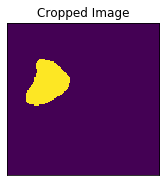

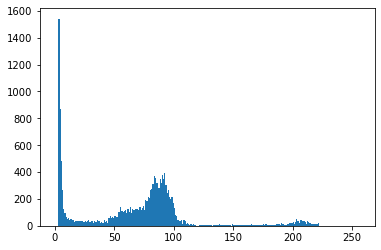

[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]
the contrast of the images is  [[ 28.43743848  31.07886319]
 [108.43960813 117.99751984]]
the dissimilarity of the images is  [[3.00670522 3.08993602]
 [6.01822917 6.19766865]]
the homogeneity of the images is  [[0.47939052 0.48947662]
 [0.34161731 0.34921762]]
the energy of the images is  [[0.1055655  0.09938277]
 [0.0916904  0.08111437]]
the correlation of the images is  [[0.1055655  0.09938277]
 [0.0916904  0.08111437]]
the ASM of the images is  [[0.01114407 0.00987693]
 [0.00840713 0.00657954]]


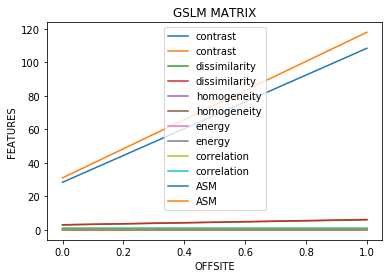

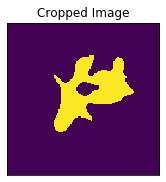

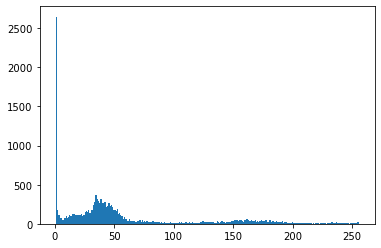

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
the contrast of the images is  [[ 44.05813238  30.51531742]
 [168.47879464 116.86284722]]
the dissimilarity of the images is  [[3.56120817 3.13232037]
 [7.11173115 6.25682044]]
the homogeneity of the images is  [[0.45409504 0.45769588]
 [0.32571828 0.33235031]]
the energy of the images is  [[0.15519252 0.15685261]
 [0.14421207 0.14722677]]
the correlation of the images is  [[0.15519252 0.15685261]
 [0.14421207 0.14722677]]
the ASM of the images is  [[0.02408472 0.02460274]
 [0.02079712 0.02167572]]


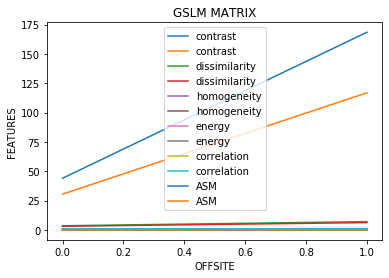

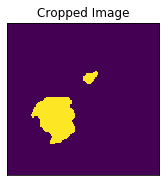

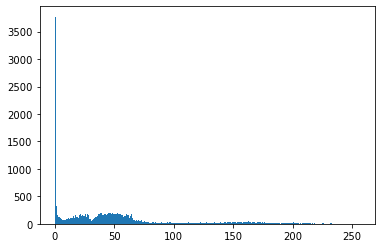

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[23.95995325 20.83889026]
 [90.65569196 79.50576637]]
the dissimilarity of the images is  [[2.74292569 2.46265994]
 [5.48840526 4.92416915]]
the homogeneity of the images is  [[0.5096599  0.52333788]
 [0.38781833 0.40139091]]
the energy of the images is  [[0.21919311 0.22144087]
 [0.20585864 0.2103423 ]]
the correlation of the images is  [[0.21919311 0.22144087]
 [0.20585864 0.2103423 ]]
the ASM of the images is  [[0.04804562 0.04903606]
 [0.04237778 0.04424388]]


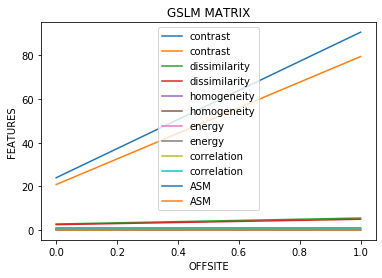

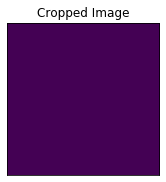

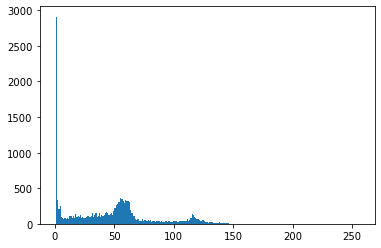

[[ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 ...
 [31 29 27 ...  3  3  3]
 [29 28 25 ...  4  4  4]
 [29 28 25 ...  4  4  4]]
the contrast of the images is  [[22.87112451 17.24717028]
 [85.89918155 64.66214038]]
the dissimilarity of the images is  [[2.78992372 2.45152559]
 [5.5812252  4.8921751 ]]
the homogeneity of the images is  [[0.50260531 0.50838264]
 [0.37532471 0.37963898]]
the energy of the images is  [[0.16881316 0.17471667]
 [0.15406304 0.1656959 ]]
the correlation of the images is  [[0.16881316 0.17471667]
 [0.15406304 0.1656959 ]]
the ASM of the images is  [[0.02849788 0.03052591]
 [0.02373542 0.02745513]]


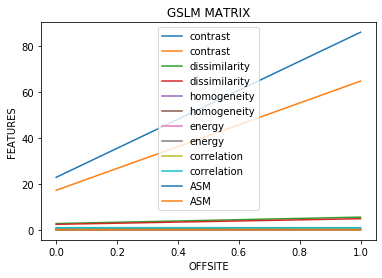

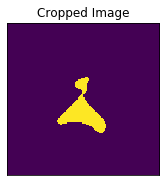

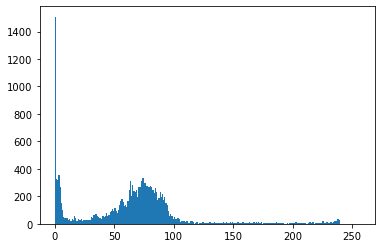

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 34.55198081  31.79355315]
 [130.5641121  120.97092014]]
the dissimilarity of the images is  [[3.552719   3.20853839]
 [7.09623016 6.40370784]]
the homogeneity of the images is  [[0.42462729 0.44657342]
 [0.2959124  0.30752181]]
the energy of the images is  [[0.09677617 0.09202029]
 [0.08912425 0.07973123]]
the correlation of the images is  [[0.09677617 0.09202029]
 [0.08912425 0.07973123]]
the ASM of the images is  [[0.00936563 0.00846773]
 [0.00794313 0.00635707]]


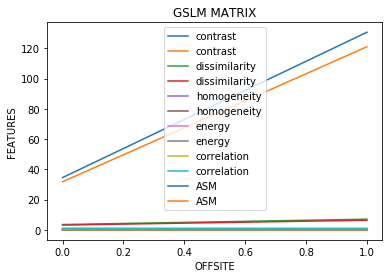

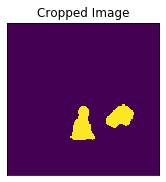

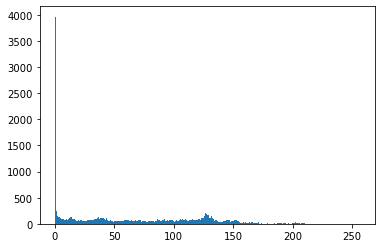

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 29.06114665  24.35593012]
 [111.4125744   92.66455853]]
the dissimilarity of the images is  [[3.12241634 3.00246063]
 [6.24491567 6.01190476]]
the homogeneity of the images is  [[0.48731649 0.47169324]
 [0.38229796 0.36071565]]
the energy of the images is  [[0.23248441 0.22929102]
 [0.2223362  0.2150302 ]]
the correlation of the images is  [[0.23248441 0.22929102]
 [0.2223362  0.2150302 ]]
the ASM of the images is  [[0.054049   0.05257437]
 [0.04943338 0.04623799]]


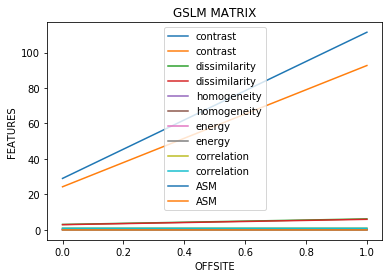

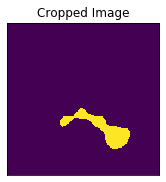

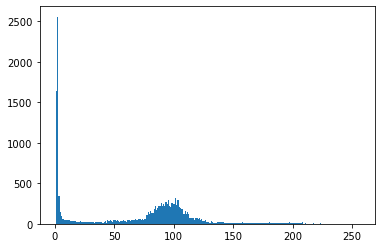

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
the contrast of the images is  [[ 28.46647392  29.18448573]
 [107.5562376  111.59474206]]
the dissimilarity of the images is  [[2.96598179 2.93743848]
 [5.9250372  5.88256448]]
the homogeneity of the images is  [[0.49298697 0.50407234]
 [0.37366518 0.38426702]]
the energy of the images is  [[0.17279967 0.16995401]
 [0.15739629 0.15257709]]
the correlation of the images is  [[0.17279967 0.16995401]
 [0.15739629 0.15257709]]
the ASM of the images is  [[0.02985973 0.02888436]
 [0.02477359 0.02327977]]


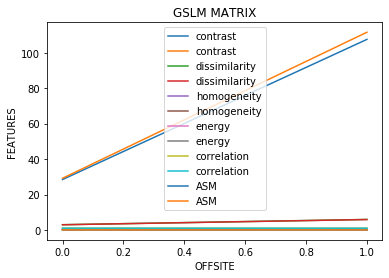

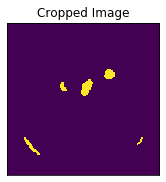

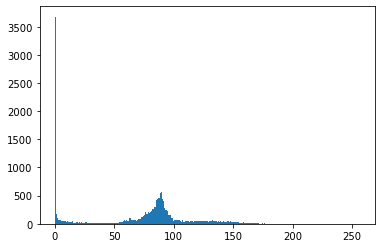

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 58.16806102  43.75725886]
 [218.828125   165.57614087]]
the dissimilarity of the images is  [[3.65637303 3.25270669]
 [7.32638889 6.51103671]]
the homogeneity of the images is  [[0.55264466 0.55428351]
 [0.43565514 0.43716956]]
the energy of the images is  [[0.21674169 0.218314  ]
 [0.20164848 0.20411337]]
the correlation of the images is  [[0.21674169 0.218314  ]
 [0.20164848 0.20411337]]
the ASM of the images is  [[0.04697696 0.047661  ]
 [0.04066211 0.04166227]]


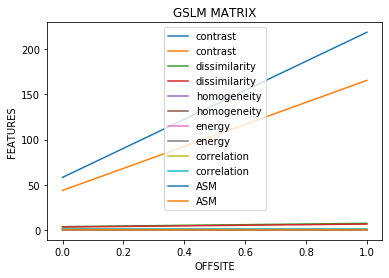

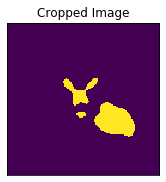

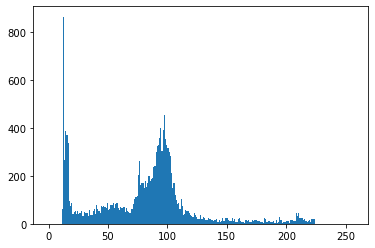

[[14 14 14 ... 49 43 40]
 [14 14 14 ... 43 40 40]
 [14 14 14 ... 40 37 35]
 ...
 [11 11 11 ... 11 11 11]
 [11 11 11 ... 11 11 11]
 [11 11 11 ... 11 11 11]]
the contrast of the images is  [[23.42347441 23.02583661]
 [89.0140129  87.02597966]]
the dissimilarity of the images is  [[2.99593996 2.8663878 ]
 [5.9781746  5.70083085]]
the homogeneity of the images is  [[0.4351788  0.43953402]
 [0.30229413 0.30520103]]
the energy of the images is  [[0.06788415 0.06954227]
 [0.05711964 0.06036985]]
the correlation of the images is  [[0.06788415 0.06954227]
 [0.05711964 0.06036985]]
the ASM of the images is  [[0.00460826 0.00483613]
 [0.00326265 0.00364452]]


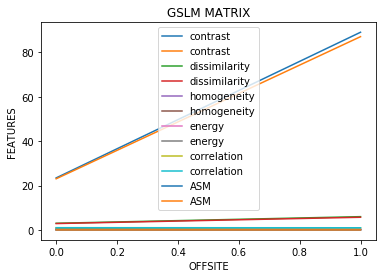

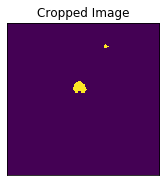

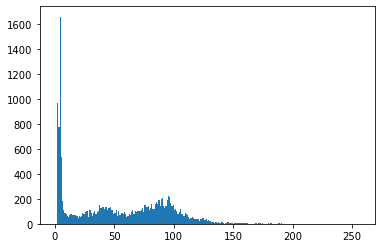

[[ 2  2  2 ...  2  2  2]
 [ 2  2  2 ...  2  2  2]
 [ 2  2  2 ...  2  2  2]
 ...
 [58 54 50 ...  2  2  2]
 [58 56 52 ...  2  2  2]
 [58 56 52 ...  2  2  2]]
the contrast of the images is  [[23.06723671 17.80843996]
 [86.77207341 67.26432292]]
the dissimilarity of the images is  [[2.9499877  2.6921752 ]
 [5.88628472 5.37890625]]
the homogeneity of the images is  [[0.46309576 0.45540428]
 [0.33700318 0.32697747]]
the energy of the images is  [[0.11464788 0.11150543]
 [0.09972069 0.0955357 ]]
the correlation of the images is  [[0.11464788 0.11150543]
 [0.09972069 0.0955357 ]]
the ASM of the images is  [[0.01314414 0.01243346]
 [0.00994422 0.00912707]]


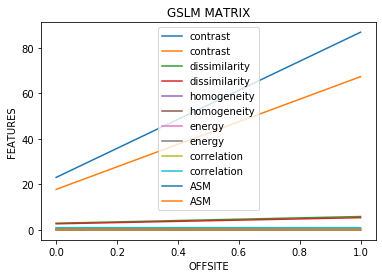

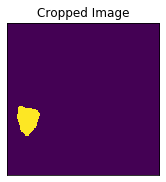

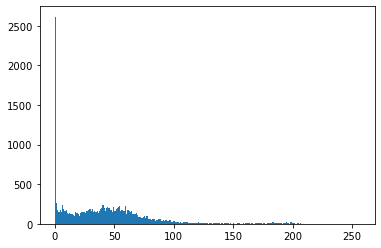

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 27.50073819  17.55456447]
 [104.44835069  66.31144593]]
the dissimilarity of the images is  [[3.0581939  2.60869833]
 [6.10956101 5.2015749 ]]
the homogeneity of the images is  [[0.43904944 0.44693378]
 [0.31698583 0.31922102]]
the energy of the images is  [[0.15390973 0.15134449]
 [0.14465823 0.14042318]]
the correlation of the images is  [[0.15390973 0.15134449]
 [0.14465823 0.14042318]]
the ASM of the images is  [[0.02368821 0.02290516]
 [0.020926   0.01971867]]


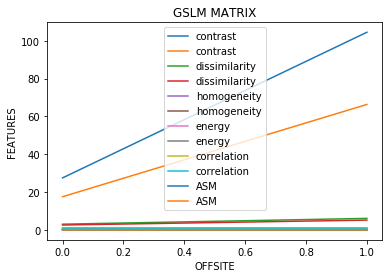

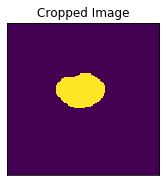

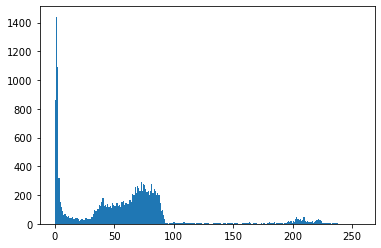

[[2 2 2 ... 0 0 0]
 [2 2 2 ... 0 0 0]
 [2 2 2 ... 0 0 0]
 ...
 [2 2 2 ... 2 2 2]
 [3 3 3 ... 2 2 3]
 [3 3 3 ... 2 3 3]]
the contrast of the images is  [[ 24.8402436   27.29183071]
 [ 93.30691964 104.88244048]]
the dissimilarity of the images is  [[2.78832431 2.77731299]
 [5.58407738 5.56113591]]
the homogeneity of the images is  [[0.48561688 0.50191169]
 [0.34381332 0.36315712]]
the energy of the images is  [[0.1069058  0.10525938]
 [0.08860534 0.08720247]]
the correlation of the images is  [[0.1069058  0.10525938]
 [0.08860534 0.08720247]]
the ASM of the images is  [[0.01142885 0.01107954]
 [0.00785091 0.00760427]]


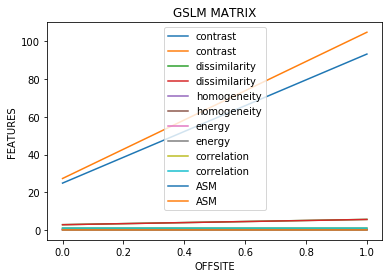

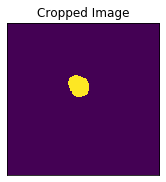

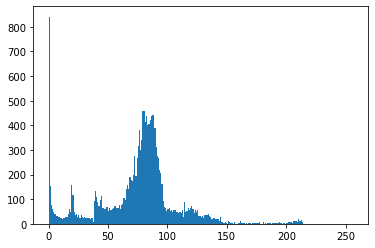

[[ 1  1  1 ...  0  0  0]
 [ 1  1  1 ...  0  0  0]
 [ 1  1  1 ...  0  0  0]
 ...
 [ 0  0  0 ... 18 18 18]
 [ 0  0  0 ... 17 17 17]
 [ 0  0  0 ... 17 17 17]]
the contrast of the images is  [[ 32.15754183  23.20607776]
 [122.6265501   89.52573165]]
the dissimilarity of the images is  [[3.11854085 2.60310039]
 [6.22513641 5.19797867]]
the homogeneity of the images is  [[0.48180002 0.50887847]
 [0.34181926 0.37204053]]
the energy of the images is  [[0.07175101 0.07480502]
 [0.05927033 0.06199678]]
the correlation of the images is  [[0.07175101 0.07480502]
 [0.05927033 0.06199678]]
the ASM of the images is  [[0.00514821 0.00559579]
 [0.00351297 0.0038436 ]]


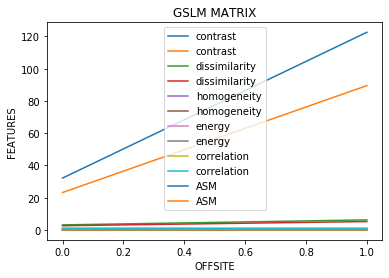

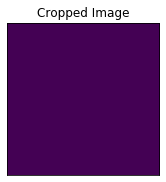

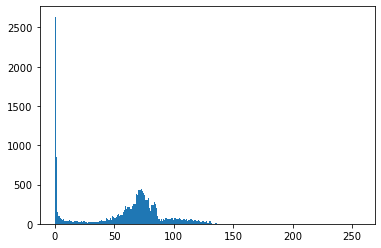

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 35.08033957  36.3214813 ]
 [133.83227927 136.43619792]]
the dissimilarity of the images is  [[3.0046752  2.9015748 ]
 [6.0265997  5.80288938]]
the homogeneity of the images is  [[0.5424302  0.5732383 ]
 [0.40975964 0.4444057 ]]
the energy of the images is  [[0.16129304 0.16346156]
 [0.14696413 0.14990914]]
the correlation of the images is  [[0.16129304 0.16346156]
 [0.14696413 0.14990914]]
the ASM of the images is  [[0.02601545 0.02671968]
 [0.02159845 0.02247275]]


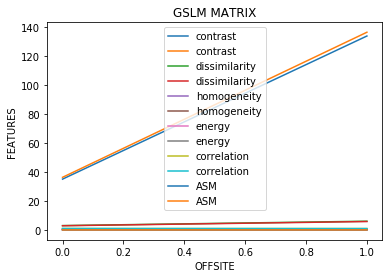

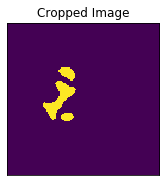

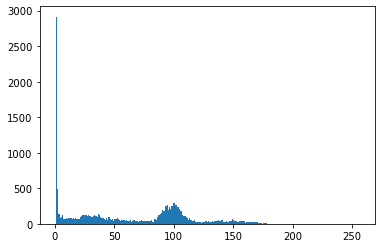

[[ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 ...
 [16 16 16 ...  2  2  2]
 [14 14 14 ...  2  2  2]
 [14 13 13 ...  3  3  3]]
the contrast of the images is  [[21.21918061 14.91252461]
 [80.52387153 56.60844494]]
the dissimilarity of the images is  [[2.66037156 2.35408465]
 [5.32211062 4.70207093]]
the homogeneity of the images is  [[0.49028869 0.48816637]
 [0.35934234 0.36016881]]
the energy of the images is  [[0.1676106  0.17377701]
 [0.15381198 0.16483395]]
the correlation of the images is  [[0.1676106  0.17377701]
 [0.15381198 0.16483395]]
the ASM of the images is  [[0.02809331 0.03019845]
 [0.02365812 0.02717023]]


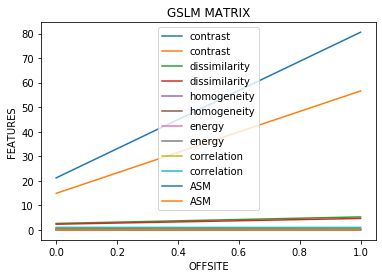

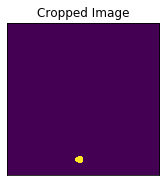

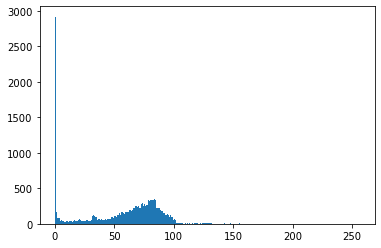

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[18.291031   20.68676181]
 [69.61346726 78.00483631]]
the dissimilarity of the images is  [[2.541031   2.59990157]
 [5.07056052 5.18650794]]
the homogeneity of the images is  [[0.47574932 0.48857707]
 [0.34841857 0.35624668]]
the energy of the images is  [[0.17119496 0.17260419]
 [0.15950316 0.16200746]]
the correlation of the images is  [[0.17119496 0.17260419]
 [0.15950316 0.16200746]]
the ASM of the images is  [[0.02930771 0.02979221]
 [0.02544126 0.02624642]]


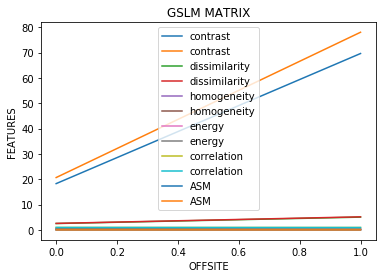

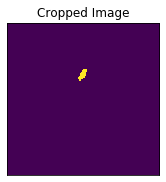

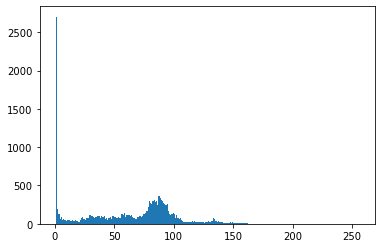

[[ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 ...
 [20 17 16 ...  1  1  1]
 [17 17 13 ...  1  1  1]
 [17 16 13 ...  1  1  1]]
the contrast of the images is  [[23.00670522 16.08341535]
 [86.87723214 60.8781002 ]]
the dissimilarity of the images is  [[2.91246309 2.35949803]
 [5.82415675 4.71180556]]
the homogeneity of the images is  [[0.47469339 0.50607296]
 [0.34936803 0.37400466]]
the energy of the images is  [[0.15833719 0.16171862]
 [0.14607813 0.15246308]]
the correlation of the images is  [[0.15833719 0.16171862]
 [0.14607813 0.15246308]]
the ASM of the images is  [[0.02507067 0.02615291]
 [0.02133882 0.02324499]]


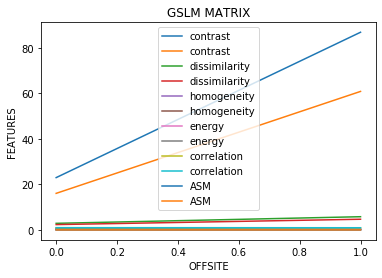

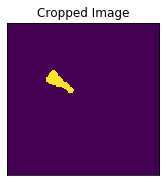

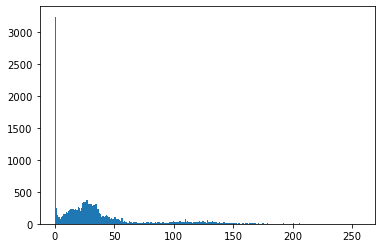

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 18 24 26]
 [ 0  0  0 ... 18 24 27]
 [ 0  0  0 ... 18 24 27]]
the contrast of the images is  [[16.58298474 13.18374754]
 [62.94097222 49.86049107]]
the dissimilarity of the images is  [[2.34418061 2.01138041]
 [4.68241567 4.01624504]]
the homogeneity of the images is  [[0.52086784 0.53933244]
 [0.392366   0.40051234]]
the energy of the images is  [[0.19049862 0.19129645]
 [0.17709624 0.17896306]]
the correlation of the images is  [[0.19049862 0.19129645]
 [0.17709624 0.17896306]]
the ASM of the images is  [[0.03628973 0.03659433]
 [0.03136308 0.03202778]]


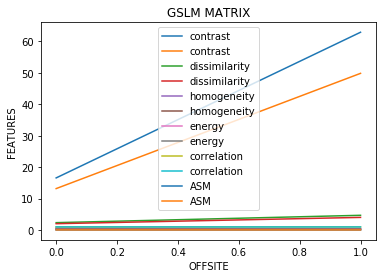

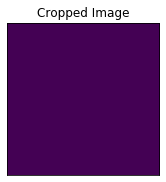

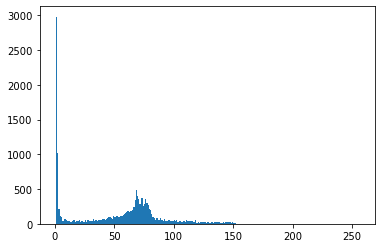

[[54 54 46 ...  1  1  1]
 [54 51 46 ...  1  1  1]
 [51 46 41 ...  1  1  1]
 ...
 [26 25 22 ...  1  1  1]
 [28 26 25 ...  1  1  1]
 [28 28 25 ...  1  1  1]]
the contrast of the images is  [[ 27.52472933  24.19543553]
 [102.66183036  90.37394593]]
the dissimilarity of the images is  [[2.81791339 2.48652805]
 [5.64161706 4.96000744]]
the homogeneity of the images is  [[0.53458664 0.55445544]
 [0.40835547 0.42868365]]
the energy of the images is  [[0.17924096 0.18693193]
 [0.1621304  0.17728187]]
the correlation of the images is  [[0.17924096 0.18693193]
 [0.1621304  0.17728187]]
the ASM of the images is  [[0.03212732 0.03494354]
 [0.02628627 0.03142886]]


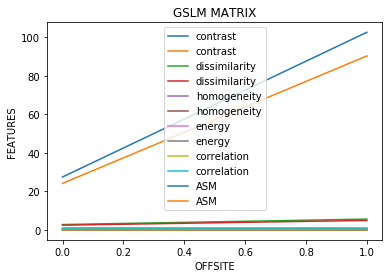

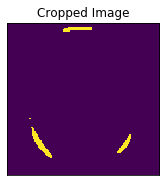

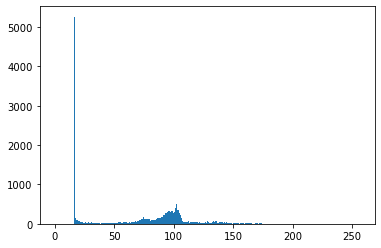

[[16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]
 ...
 [16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]]
the contrast of the images is  [[ 60.04699803  39.76525591]
 [225.96887401 149.71918403]]
the dissimilarity of the images is  [[3.48191437 2.72404035]
 [6.99342758 5.44500248]]
the homogeneity of the images is  [[0.60971825 0.63466007]
 [0.49865967 0.5317283 ]]
the energy of the images is  [[0.31074194 0.31707797]
 [0.296216   0.30874345]]
the correlation of the images is  [[0.31074194 0.31707797]
 [0.296216   0.30874345]]
the ASM of the images is  [[0.09656056 0.10053844]
 [0.08774392 0.09532252]]


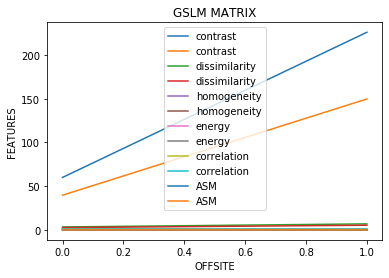

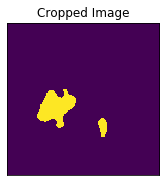

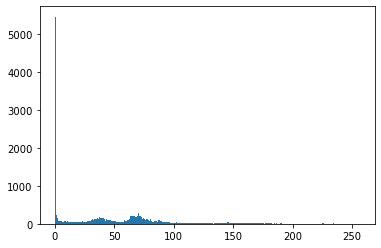

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[24.36847933 15.33353839]
 [92.28311012 58.07601687]]
the dissimilarity of the images is  [[2.71198327 2.18848425]
 [5.42485119 4.37797619]]
the homogeneity of the images is  [[0.55322088 0.56458779]
 [0.45104967 0.46341725]]
the energy of the images is  [[0.32087281 0.32350704]
 [0.30725999 0.31315766]]
the correlation of the images is  [[0.32087281 0.32350704]
 [0.30725999 0.31315766]]
the ASM of the images is  [[0.10295936 0.1046568 ]
 [0.0944087  0.09806772]]


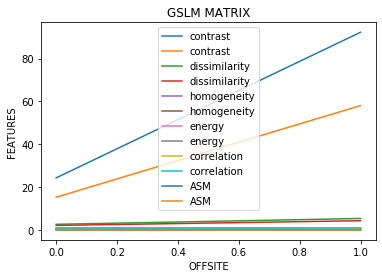

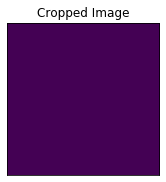

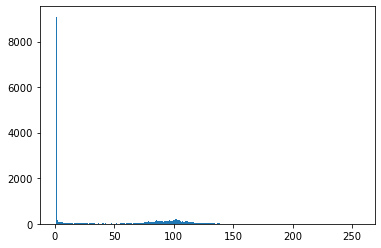

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
the contrast of the images is  [[ 30.59411909  24.41830709]
 [115.17162698  92.77715774]]
the dissimilarity of the images is  [[2.25910433 2.04306102]
 [4.52790179 4.08618552]]
the homogeneity of the images is  [[0.68279136 0.69367803]
 [0.61466308 0.62292479]]
the energy of the images is  [[0.54444655 0.54423096]
 [0.53366751 0.53325626]]
the correlation of the images is  [[0.54444655 0.54423096]
 [0.53366751 0.53325626]]
the ASM of the images is  [[0.29642204 0.29618734]
 [0.28480101 0.28436224]]


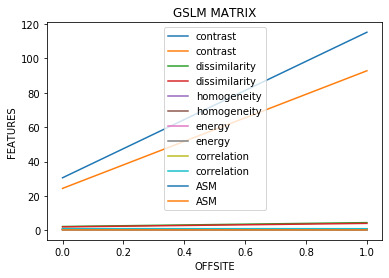

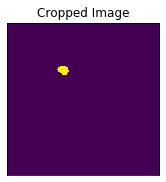

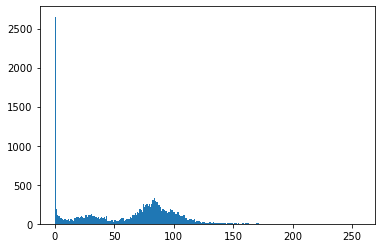

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[19.53697096 16.74341781]
 [72.68607391 63.31863839]]
the dissimilarity of the images is  [[2.69162156 2.45650837]
 [5.36923363 4.9094122 ]]
the homogeneity of the images is  [[0.45475319 0.47679955]
 [0.32206712 0.34247142]]
the energy of the images is  [[0.15557619 0.15606922]
 [0.14536793 0.14571288]]
the correlation of the images is  [[0.15557619 0.15606922]
 [0.14536793 0.14571288]]
the ASM of the images is  [[0.02420395 0.0243576 ]
 [0.02113184 0.02123224]]


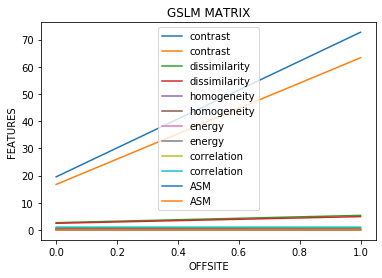

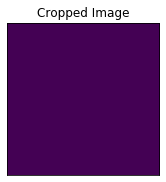

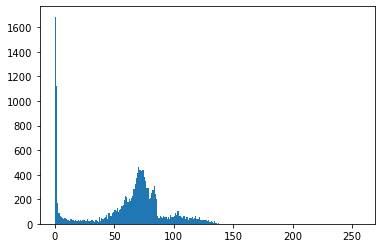

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 35.97127215  37.99464813]
 [136.82217262 142.47736855]]
the dissimilarity of the images is  [[3.07609498 3.06108514]
 [6.15848214 6.10993304]]
the homogeneity of the images is  [[0.53027841 0.54693872]
 [0.39475959 0.41339963]]
the energy of the images is  [[0.12136202 0.12170324]
 [0.10733328 0.10698883]]
the correlation of the images is  [[0.12136202 0.12170324]
 [0.10733328 0.10698883]]
the ASM of the images is  [[0.01472874 0.01481168]
 [0.01152043 0.01144661]]


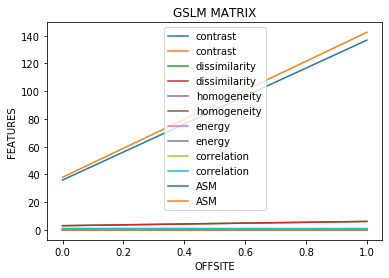

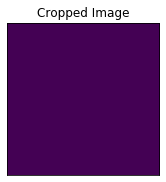

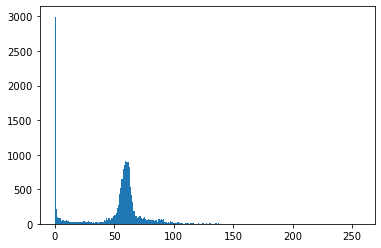

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[19.45091043 21.53143455]
 [72.60832093 80.56950645]]
the dissimilarity of the images is  [[2.00073819 2.05640994]
 [3.99596974 4.09716022]]
the homogeneity of the images is  [[0.64693953 0.66622204]
 [0.51768263 0.55299615]]
the energy of the images is  [[0.19640205 0.20053897]
 [0.17789968 0.18263984]]
the correlation of the images is  [[0.19640205 0.20053897]
 [0.17789968 0.18263984]]
the ASM of the images is  [[0.03857377 0.04021588]
 [0.0316483  0.03335731]]


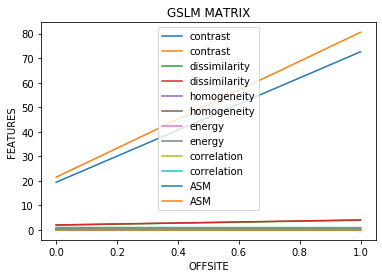

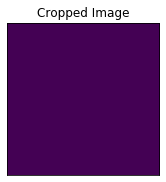

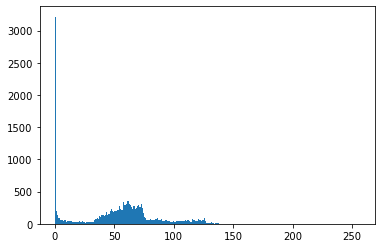

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 47.98166831  47.12899852]
 [182.45634921 178.35106647]]
the dissimilarity of the images is  [[3.60986713 3.49390994]
 [7.23648313 6.99590774]]
the homogeneity of the images is  [[0.48243956 0.50098811]
 [0.35730682 0.37237456]]
the energy of the images is  [[0.18604836 0.18921872]
 [0.17363858 0.17782213]]
the correlation of the images is  [[0.18604836 0.18921872]
 [0.17363858 0.17782213]]
the ASM of the images is  [[0.03461399 0.03580372]
 [0.03015036 0.03162071]]


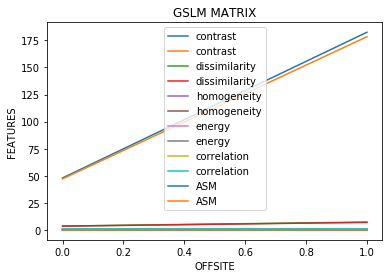

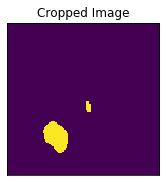

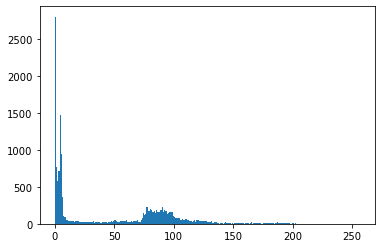

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[21.96259843 16.32418799]
 [83.37388393 62.77120536]]
the dissimilarity of the images is  [[2.50356791 1.97957677]
 [5.02058532 3.95982143]]
the homogeneity of the images is  [[0.57034601 0.6269461 ]
 [0.46068831 0.5277472 ]]
the energy of the images is  [[0.1898869  0.20265082]
 [0.17040848 0.19314538]]
the correlation of the images is  [[0.1898869  0.20265082]
 [0.17040848 0.19314538]]
the ASM of the images is  [[0.03605704 0.04106735]
 [0.02903905 0.03730514]]


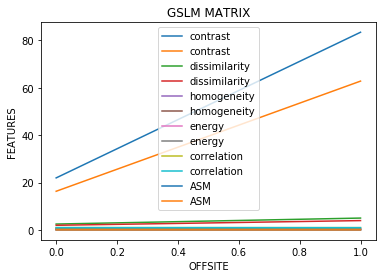

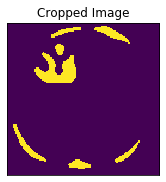

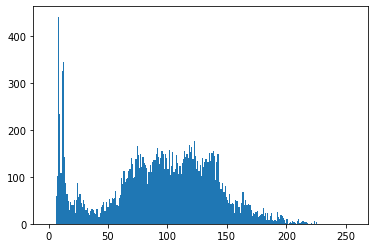

[[ 57  56  50 ... 152 154 155]
 [ 56  51  48 ... 150 152 154]
 [ 51  49  43 ... 145 146 146]
 ...
 [  6   6   6 ...   8   8   8]
 [  6   6   6 ...   8   8   8]
 [  6   6   6 ...   8   8   8]]
the contrast of the images is  [[ 55.32689469  70.51279528]
 [209.13585069 267.12251984]]
the dissimilarity of the images is  [[4.55179626 4.91535433]
 [9.08699157 9.81758433]]
the homogeneity of the images is  [[0.33485649 0.36389412]
 [0.21351115 0.23735656]]
the energy of the images is  [[0.04152044 0.04071439]
 [0.03453501 0.03255264]]
the correlation of the images is  [[0.04152044 0.04071439]
 [0.03453501 0.03255264]]
the ASM of the images is  [[0.00172395 0.00165766]
 [0.00119267 0.00105967]]


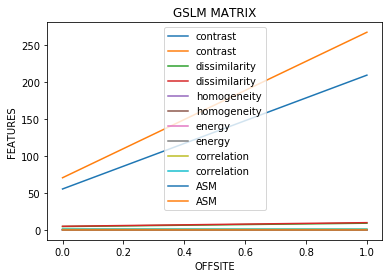

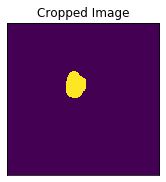

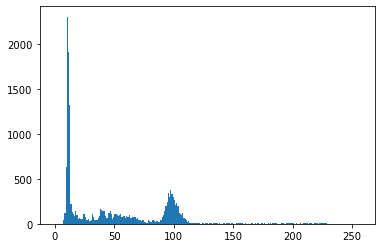

[[44 37 29 ...  7  7  7]
 [44 37 29 ...  7  7  7]
 [44 37 30 ...  8  8  8]
 ...
 [45 38 31 ...  9  9  9]
 [45 38 31 ...  9  9  9]
 [45 38 30 ...  9  9  9]]
the contrast of the images is  [[17.22520915  9.98972687]
 [64.59114583 38.00706845]]
the dissimilarity of the images is  [[2.2531373  1.57966289]
 [4.45114087 3.15984623]]
the homogeneity of the images is  [[0.58804792 0.65209307]
 [0.48191934 0.53836467]]
the energy of the images is  [[0.18608257 0.18652116]
 [0.16766252 0.16857173]]
the correlation of the images is  [[0.18608257 0.18652116]
 [0.16766252 0.16857173]]
the ASM of the images is  [[0.03462672 0.03479014]
 [0.02811072 0.02841643]]


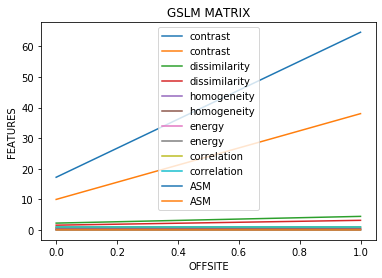

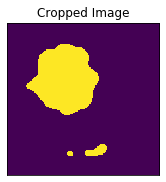

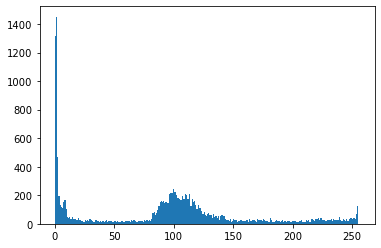

[[0 0 0 ... 6 7 8]
 [0 0 0 ... 6 7 8]
 [0 0 0 ... 6 7 8]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 39.57794045  38.14782234]
 [150.37865823 145.77746776]]
the dissimilarity of the images is  [[3.5792938  3.56379183]
 [7.1687128  7.14304315]]
the homogeneity of the images is  [[0.45982264 0.45862753]
 [0.33276648 0.33776419]]
the energy of the images is  [[0.11436492 0.10671068]
 [0.10372833 0.09204603]]
the correlation of the images is  [[0.11436492 0.10671068]
 [0.10372833 0.09204603]]
the ASM of the images is  [[0.01307934 0.01138717]
 [0.01075957 0.00847247]]


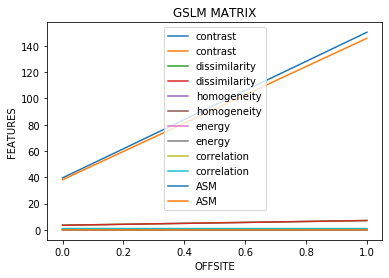

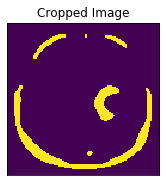

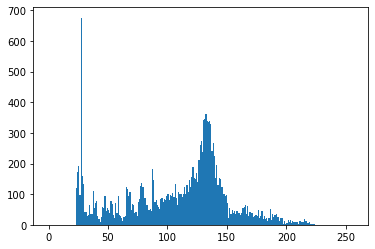

[[118 110 103 ... 103 110 117]
 [110 108  98 ...  97 107 110]
 [103 100  92 ...  91 100 103]
 ...
 [102 100  91 ...  90  99 102]
 [110 107  96 ...  95 106 109]
 [117 110 102 ... 102 109 116]]
the contrast of the images is  [[ 60.39339321  59.34313484]
 [226.56343006 222.24658978]]
the dissimilarity of the images is  [[4.51187254 4.42913386]
 [8.93880208 8.78081597]]
the homogeneity of the images is  [[0.40920518 0.42359019]
 [0.28149763 0.29579219]]
the energy of the images is  [[0.05160761 0.05381807]
 [0.04262102 0.04489633]]
the correlation of the images is  [[0.05160761 0.05381807]
 [0.04262102 0.04489633]]
the ASM of the images is  [[0.00266335 0.00289638]
 [0.00181655 0.00201568]]


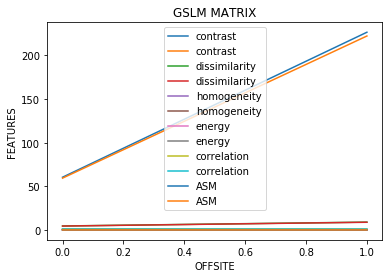

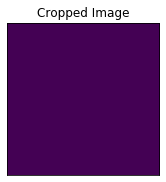

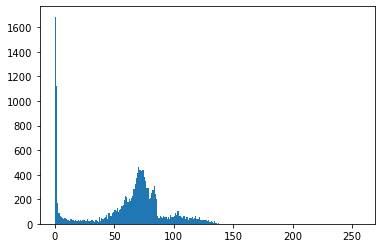

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 35.97127215  37.99464813]
 [136.82217262 142.47736855]]
the dissimilarity of the images is  [[3.07609498 3.06108514]
 [6.15848214 6.10993304]]
the homogeneity of the images is  [[0.53027841 0.54693872]
 [0.39475959 0.41339963]]
the energy of the images is  [[0.12136202 0.12170324]
 [0.10733328 0.10698883]]
the correlation of the images is  [[0.12136202 0.12170324]
 [0.10733328 0.10698883]]
the ASM of the images is  [[0.01472874 0.01481168]
 [0.01152043 0.01144661]]


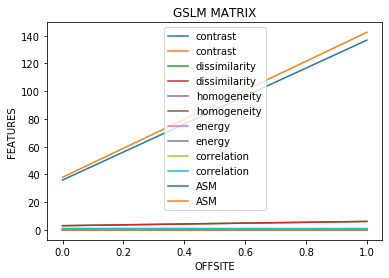

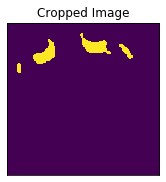

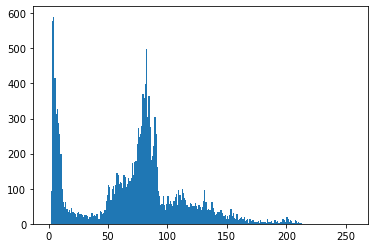

[[4 4 4 ... 4 4 4]
 [4 4 4 ... 4 4 4]
 [5 5 5 ... 4 4 4]
 ...
 [3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]]
the contrast of the images is  [[ 50.40397392  37.11884843]
 [191.32279266 141.41040427]]
the dissimilarity of the images is  [[4.13330463 3.41203248]
 [8.2719494  6.80549355]]
the homogeneity of the images is  [[0.43392506 0.45992134]
 [0.30724936 0.3222748 ]]
the energy of the images is  [[0.06523314 0.06280981]
 [0.05355874 0.04831466]]
the correlation of the images is  [[0.06523314 0.06280981]
 [0.05355874 0.04831466]]
the ASM of the images is  [[0.00425536 0.00394507]
 [0.00286854 0.00233431]]


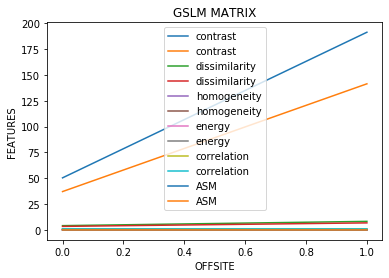

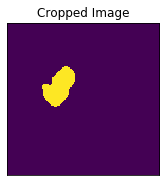

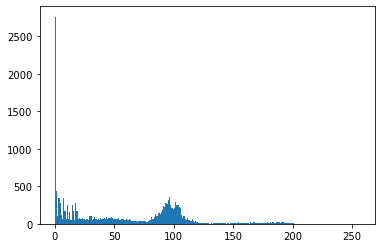

[[30 27 24 ... 23 26 29]
 [27 27 24 ... 23 26 26]
 [24 24 21 ... 20 23 23]
 ...
 [20 19 15 ... 14 17 19]
 [21 20 16 ... 15 18 19]
 [22 21 17 ... 16 19 20]]
the contrast of the images is  [[19.65883366 16.29712106]
 [74.79185268 60.74832589]]
the dissimilarity of the images is  [[2.67519685 2.21518209]
 [5.3202505  4.40668403]]
the homogeneity of the images is  [[0.4785954  0.54278366]
 [0.36145835 0.42257522]]
the energy of the images is  [[0.16203078 0.16847784]
 [0.14910427 0.1611262 ]]
the correlation of the images is  [[0.16203078 0.16847784]
 [0.14910427 0.1611262 ]]
the ASM of the images is  [[0.02625397 0.02838478]
 [0.02223208 0.02596165]]


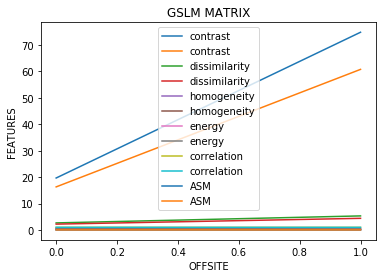

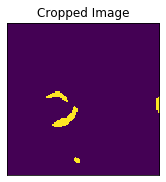

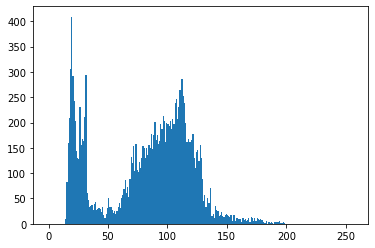

[[33 33 33 ... 34 37 39]
 [33 33 33 ... 35 39 39]
 [33 33 33 ... 37 40 42]
 ...
 [32 32 31 ... 45 53 55]
 [32 32 32 ... 42 50 53]
 [32 32 32 ... 41 48 53]]
the contrast of the images is  [[ 34.18313238  26.03567913]
 [127.22209821  97.41083829]]
the dissimilarity of the images is  [[3.55345719 2.859375  ]
 [7.05357143 5.69469246]]
the homogeneity of the images is  [[0.38270521 0.46749608]
 [0.2362678  0.32504669]]
the energy of the images is  [[0.04129066 0.04820563]
 [0.03087079 0.03809875]]
the correlation of the images is  [[0.04129066 0.04820563]
 [0.03087079 0.03809875]]
the ASM of the images is  [[0.00170492 0.00232378]
 [0.00095301 0.00145151]]


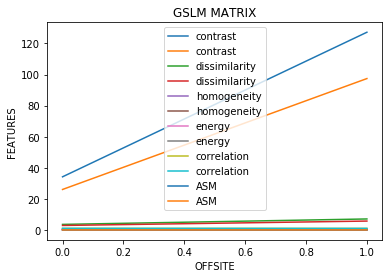

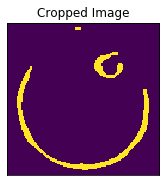

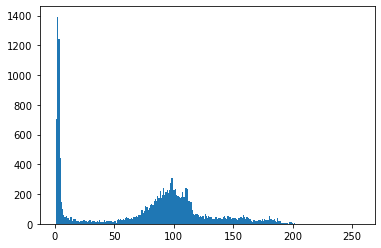

[[1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
the contrast of the images is  [[ 86.16166339  69.14240896]
 [328.65376984 261.2624628 ]]
the dissimilarity of the images is  [[4.78063484 4.1441314 ]
 [9.5922619  8.28019593]]
the homogeneity of the images is  [[0.45255676 0.47692932]
 [0.3251729  0.34691526]]
the energy of the images is  [[0.1062386  0.1058375 ]
 [0.08883521 0.08810504]]
the correlation of the images is  [[0.1062386  0.1058375 ]
 [0.08883521 0.08810504]]
the ASM of the images is  [[0.01128664 0.01120158]
 [0.00789169 0.0077625 ]]


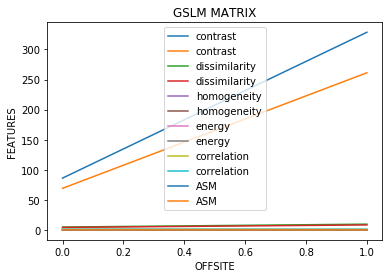

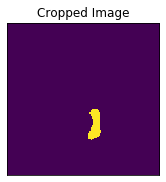

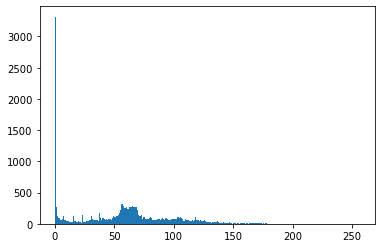

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [23 23 23 ... 23 23 23]
 [30 30 30 ... 30 30 30]
 [37 37 37 ... 37 37 37]]
the contrast of the images is  [[ 52.61491142  39.28303396]
 [196.58308532 146.390563  ]]
the dissimilarity of the images is  [[3.89776083 3.34873278]
 [7.81200397 6.66214038]]
the homogeneity of the images is  [[0.49264196 0.5041966 ]
 [0.37358545 0.38339572]]
the energy of the images is  [[0.1918341  0.19836565]
 [0.17723949 0.19055227]]
the correlation of the images is  [[0.1918341  0.19836565]
 [0.17723949 0.19055227]]
the ASM of the images is  [[0.03680032 0.03934893]
 [0.03141384 0.03631017]]


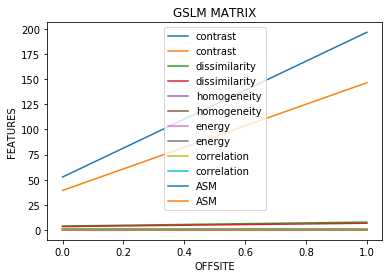

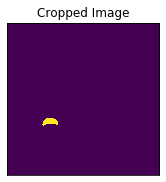

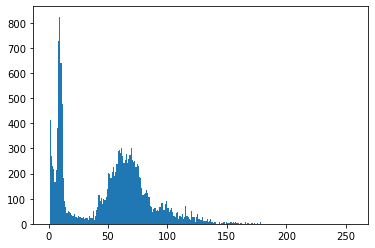

[[2 2 3 ... 1 1 1]
 [2 2 3 ... 1 1 1]
 [2 2 3 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
the contrast of the images is  [[ 38.19162156  30.53549459]
 [145.26085069 114.96695188]]
the dissimilarity of the images is  [[3.24108022 2.81686762]
 [6.50440228 5.65023562]]
the homogeneity of the images is  [[0.50478514 0.53643646]
 [0.36554481 0.39411342]]
the energy of the images is  [[0.07771563 0.08090702]
 [0.06462066 0.06565351]]
the correlation of the images is  [[0.07771563 0.08090702]
 [0.06462066 0.06565351]]
the ASM of the images is  [[0.00603972 0.00654595]
 [0.00417583 0.00431038]]


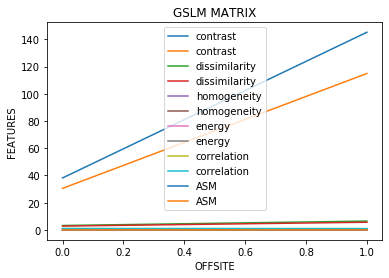

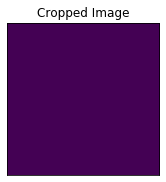

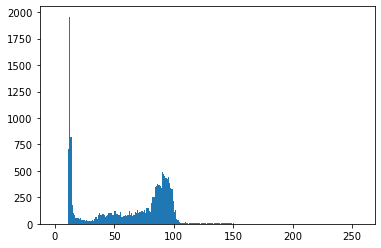

[[11 11 11 ... 11 11 11]
 [11 11 11 ... 12 11 11]
 [11 11 11 ... 12 12 11]
 ...
 [11 11 11 ... 12 12 12]
 [11 11 11 ... 12 12 12]
 [11 11 11 ... 12 12 12]]
the contrast of the images is  [[19.58999754 13.54472195]
 [72.58798363 49.89130704]]
the dissimilarity of the images is  [[2.41652313 2.0054749 ]
 [4.84033978 4.00043403]]
the homogeneity of the images is  [[0.54571908 0.56505366]
 [0.4014971  0.42765838]]
the energy of the images is  [[0.12552488 0.13417645]
 [0.10531169 0.12014376]]
the correlation of the images is  [[0.12552488 0.13417645]
 [0.10531169 0.12014376]]
the ASM of the images is  [[0.0157565  0.01800332]
 [0.01109055 0.01443452]]


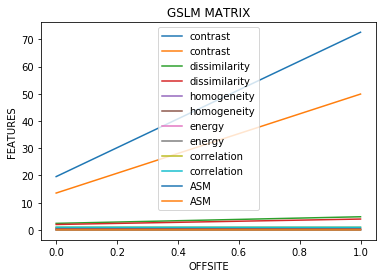

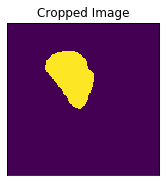

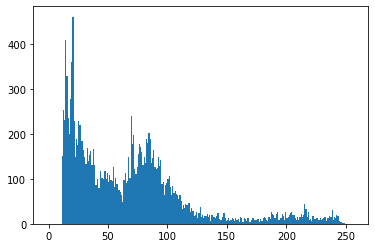

[[36 37 37 ... 47 50 51]
 [37 38 39 ... 47 49 50]
 [42 43 45 ... 45 47 49]
 ...
 [32 26 25 ... 35 34 33]
 [34 32 26 ... 33 33 32]
 [38 34 32 ... 33 32 30]]
the contrast of the images is  [[22.0332185  21.66806102]
 [83.69308036 81.82328869]]
the dissimilarity of the images is  [[2.84793307 2.78666339]
 [5.69332837 5.56845238]]
the homogeneity of the images is  [[0.46339822 0.46725596]
 [0.32629067 0.33253522]]
the energy of the images is  [[0.05317925 0.05279553]
 [0.04236262 0.042963  ]]
the correlation of the images is  [[0.05317925 0.05279553]
 [0.04236262 0.042963  ]]
the ASM of the images is  [[0.00282803 0.00278737]
 [0.00179459 0.00184582]]


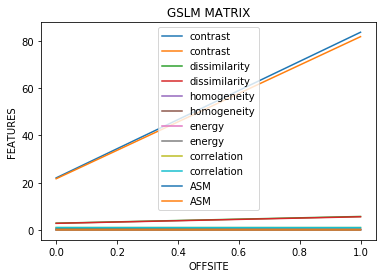

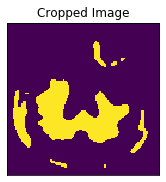

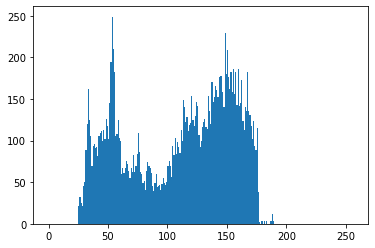

[[47 47 47 ... 55 54 54]
 [47 47 46 ... 55 54 54]
 [47 46 46 ... 54 54 54]
 ...
 [62 62 63 ... 72 72 72]
 [60 60 61 ... 71 70 70]
 [59 60 60 ... 69 69 68]]
the contrast of the images is  [[ 37.79416831  21.22121063]
 [143.3218626   81.05034722]]
the dissimilarity of the images is  [[3.49274114 2.81163878]
 [6.98195685 5.61197917]]
the homogeneity of the images is  [[0.43324494 0.42499262]
 [0.27739576 0.27717896]]
the energy of the images is  [[0.03451839 0.03510353]
 [0.02526161 0.02608408]]
the correlation of the images is  [[0.03451839 0.03510353]
 [0.02526161 0.02608408]]
the ASM of the images is  [[0.00119152 0.00123226]
 [0.00063815 0.00068038]]


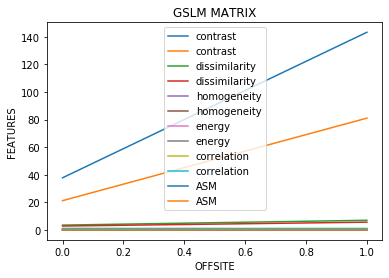

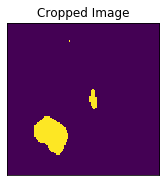

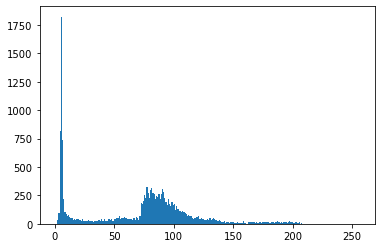

[[2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]
 ...
 [3 3 3 ... 4 4 4]
 [3 3 3 ... 4 4 4]
 [3 3 3 ... 4 4 4]]
the contrast of the images is  [[ 30.68676181  23.56071604]
 [115.75992063  89.99181548]]
the dissimilarity of the images is  [[3.36823327 2.78832431]
 [6.73735119 5.56001984]]
the homogeneity of the images is  [[0.43979677 0.49220878]
 [0.3177995  0.3719834 ]]
the energy of the images is  [[0.11832102 0.1209286 ]
 [0.10484645 0.10739965]]
the correlation of the images is  [[0.11832102 0.1209286 ]
 [0.10484645 0.10739965]]
the ASM of the images is  [[0.01399986 0.01462373]
 [0.01099278 0.01153469]]


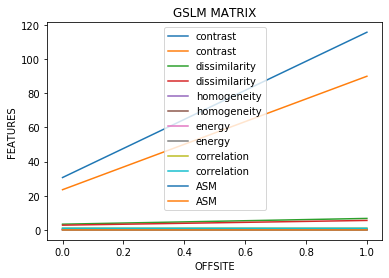

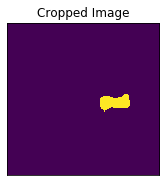

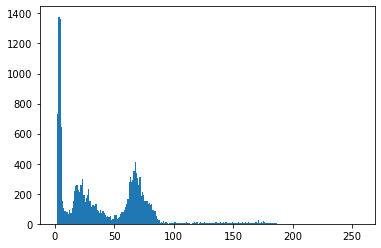

[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 3 3 2]
 [2 2 2 ... 3 2 2]
 [2 2 2 ... 2 2 2]]
the contrast of the images is  [[14.19512795 10.53967766]
 [53.56826637 40.18421379]]
the dissimilarity of the images is  [[2.02829724 1.81539124]
 [4.05946181 3.63213046]]
the homogeneity of the images is  [[0.56089871 0.57376895]
 [0.42372783 0.43777783]]
the energy of the images is  [[0.11980181 0.1206238 ]
 [0.10152231 0.10347848]]
the correlation of the images is  [[0.11980181 0.1206238 ]
 [0.10152231 0.10347848]]
the ASM of the images is  [[0.01435247 0.0145501 ]
 [0.01030678 0.0107078 ]]


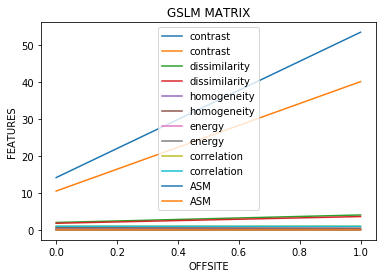

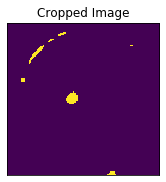

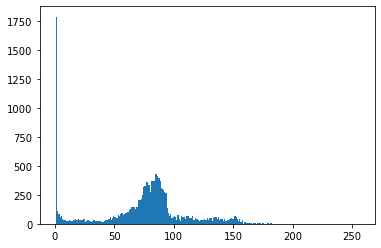

[[ 4  4  3 ...  1  1  1]
 [ 4  3  3 ...  1  1  1]
 [ 3  3  3 ...  1  1  1]
 ...
 [18 19 21 ...  1  1  1]
 [17 17 18 ...  1  1  1]
 [16 17 17 ...  1  1  1]]
the contrast of the images is  [[ 53.98345226  35.57990896]
 [204.12481399 134.71081349]]
the dissimilarity of the images is  [[3.98369833 3.10783711]
 [7.96682788 6.19630456]]
the homogeneity of the images is  [[0.44560674 0.48783565]
 [0.30720255 0.34777165]]
the energy of the images is  [[0.10836698 0.11332376]
 [0.09569949 0.10479627]]
the correlation of the images is  [[0.10836698 0.11332376]
 [0.09569949 0.10479627]]
the ASM of the images is  [[0.0117434  0.01284228]
 [0.00915839 0.01098226]]


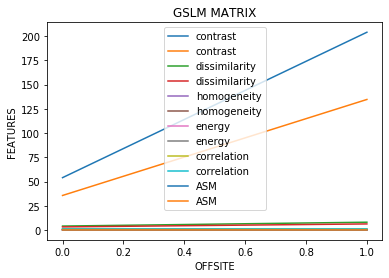

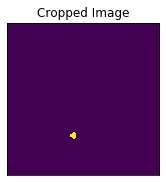

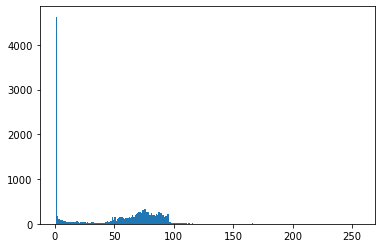

[[30 30 25 ...  1  1  1]
 [30 25 23 ...  1  1  1]
 [25 23 19 ...  1  1  1]
 ...
 [18 19 22 ...  1  1  1]
 [17 18 19 ...  1  1  1]
 [15 17 18 ...  1  1  1]]
the contrast of the images is  [[21.462906   11.87623031]
 [80.72129216 44.6703869 ]]
the dissimilarity of the images is  [[2.33273868 1.71456693]
 [4.67640129 3.41815476]]
the homogeneity of the images is  [[0.56580542 0.61316337]
 [0.44029584 0.48798326]]
the energy of the images is  [[0.27123179 0.2772116 ]
 [0.25656527 0.26822584]]
the correlation of the images is  [[0.27123179 0.2772116 ]
 [0.25656527 0.26822584]]
the ASM of the images is  [[0.07356668 0.07684627]
 [0.06582574 0.0719451 ]]


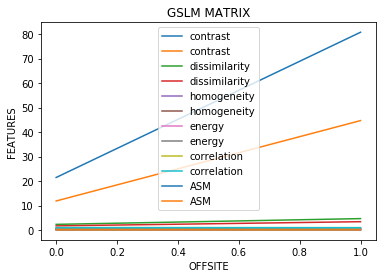

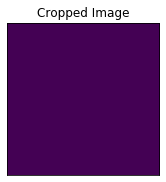

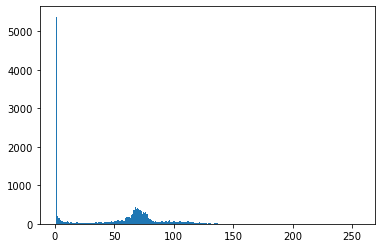

[[26 26 23 ...  1  1  1]
 [26 23 22 ...  1  1  1]
 [23 22 17 ...  1  1  1]
 ...
 [37 37 38 ...  1  1  1]
 [37 38 38 ...  1  1  1]
 [37 38 38 ...  1  1  1]]
the contrast of the images is  [[ 34.86872539  25.19986467]
 [132.75967262  95.62710813]]
the dissimilarity of the images is  [[2.83526083 2.33027805]
 [5.68836806 4.65984623]]
the homogeneity of the images is  [[0.58083473 0.61928013]
 [0.47625868 0.51646008]]
the energy of the images is  [[0.31750937 0.32153687]
 [0.30330203 0.31160392]]
the correlation of the images is  [[0.31750937 0.32153687]
 [0.30330203 0.31160392]]
the ASM of the images is  [[0.1008122  0.10338596]
 [0.09199212 0.09709701]]


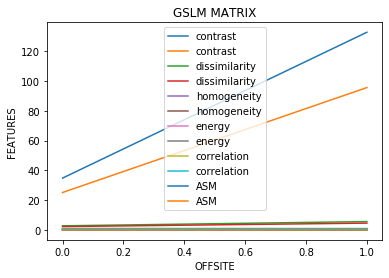

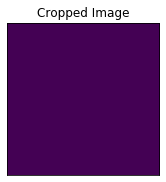

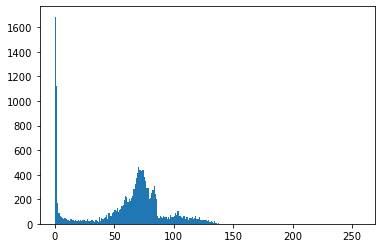

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 35.97127215  37.99464813]
 [136.82217262 142.47736855]]
the dissimilarity of the images is  [[3.07609498 3.06108514]
 [6.15848214 6.10993304]]
the homogeneity of the images is  [[0.53027841 0.54693872]
 [0.39475959 0.41339963]]
the energy of the images is  [[0.12136202 0.12170324]
 [0.10733328 0.10698883]]
the correlation of the images is  [[0.12136202 0.12170324]
 [0.10733328 0.10698883]]
the ASM of the images is  [[0.01472874 0.01481168]
 [0.01152043 0.01144661]]


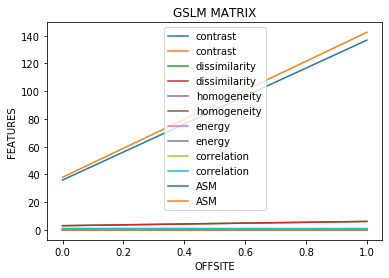

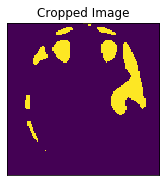

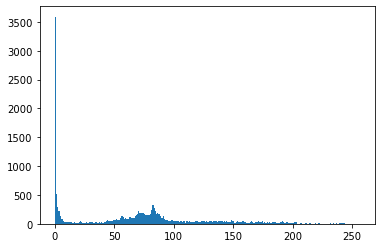

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 84.07492618  47.837906  ]
 [321.72643849 182.05605159]]
the dissimilarity of the images is  [[4.71751969 3.63170522]
 [9.47222222 7.2578125 ]]
the homogeneity of the images is  [[0.5169198  0.51101625]
 [0.40450359 0.40014794]]
the energy of the images is  [[0.20736802 0.21503282]
 [0.19117683 0.20676931]]
the correlation of the images is  [[0.20736802 0.21503282]
 [0.19117683 0.20676931]]
the ASM of the images is  [[0.04300149 0.04623911]
 [0.03654858 0.04275355]]


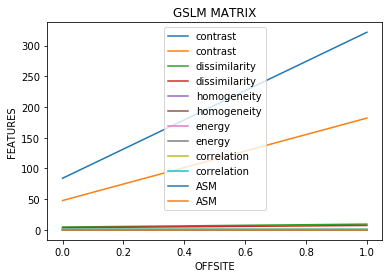

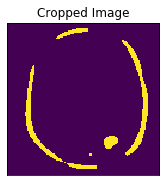

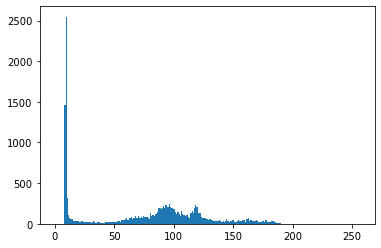

[[9 9 9 ... 9 9 9]
 [9 9 9 ... 9 9 9]
 [9 9 9 ... 9 9 9]
 ...
 [8 8 8 ... 9 9 9]
 [8 8 8 ... 9 9 9]
 [8 8 8 ... 8 9 9]]
the contrast of the images is  [[ 89.38115157  62.41541585]
 [341.37065972 237.33091518]]
the dissimilarity of the images is  [[ 5.03604823  4.04361467]
 [10.10875496  8.08959573]]
the homogeneity of the images is  [[0.45526827 0.49175659]
 [0.34541125 0.37928662]]
the energy of the images is  [[0.16302832 0.16591232]
 [0.14610454 0.15156165]]
the correlation of the images is  [[0.16302832 0.16591232]
 [0.14610454 0.15156165]]
the ASM of the images is  [[0.02657823 0.0275269 ]
 [0.02134654 0.02297093]]


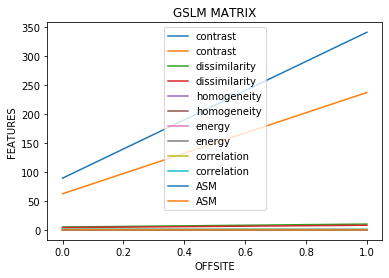

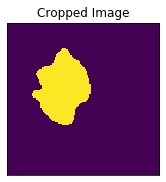

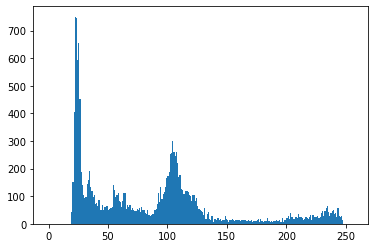

[[21 21 22 ... 19 19 19]
 [21 21 22 ... 19 19 19]
 [21 21 22 ... 19 19 19]
 ...
 [24 24 25 ... 21 21 21]
 [24 24 24 ... 21 21 21]
 [24 24 24 ... 21 21 21]]
the contrast of the images is  [[23.42593504 21.02688238]
 [90.40271577 80.00452629]]
the dissimilarity of the images is  [[2.90686516 2.62666093]
 [5.82893105 5.25303819]]
the homogeneity of the images is  [[0.47156279 0.50489619]
 [0.33945073 0.37291516]]
the energy of the images is  [[0.07613105 0.07985088]
 [0.06067951 0.06648795]]
the correlation of the images is  [[0.07613105 0.07985088]
 [0.06067951 0.06648795]]
the ASM of the images is  [[0.00579594 0.00637616]
 [0.003682   0.00442065]]


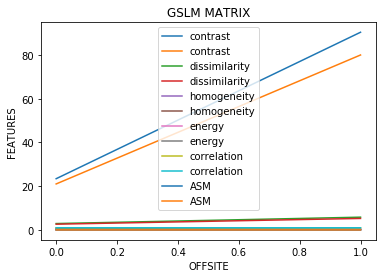

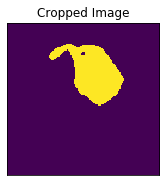

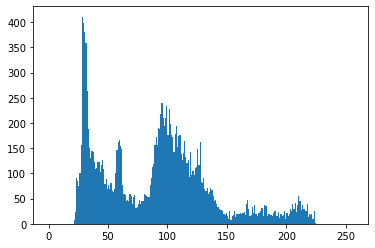

[[62 62 62 ... 72 72 72]
 [62 62 62 ... 71 72 72]
 [62 62 62 ... 67 68 68]
 ...
 [28 28 28 ... 22 22 21]
 [28 28 28 ... 21 21 21]
 [28 28 28 ... 21 21 21]]
the contrast of the images is  [[ 24.10777559  30.64037894]
 [ 91.20070685 114.40091766]]
the dissimilarity of the images is  [[3.02866634 3.12007874]
 [6.06417411 6.234375  ]]
the homogeneity of the images is  [[0.45591529 0.47718128]
 [0.32038121 0.33226281]]
the energy of the images is  [[0.05017119 0.04909928]
 [0.03914906 0.03751796]]
the correlation of the images is  [[0.05017119 0.04909928]
 [0.03914906 0.03751796]]
the ASM of the images is  [[0.00251715 0.00241074]
 [0.00153265 0.0014076 ]]


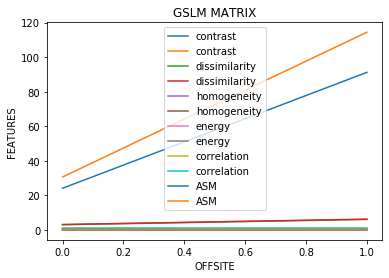

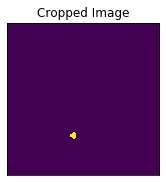

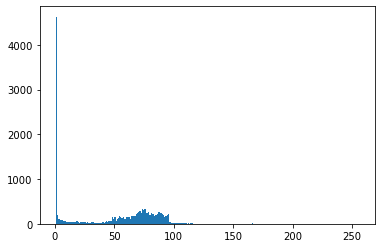

[[30 29 24 ...  1  1  1]
 [29 24 23 ...  1  1  1]
 [24 23 19 ...  1  1  1]
 ...
 [18 19 22 ...  1  1  1]
 [17 18 19 ...  1  1  1]
 [15 17 18 ...  1  1  1]]
the contrast of the images is  [[21.44192913 11.84498031]
 [80.66108631 44.5453249 ]]
the dissimilarity of the images is  [[2.33120079 1.7101378 ]
 [4.67361111 3.4094122 ]]
the homogeneity of the images is  [[0.56582558 0.61485573]
 [0.44024531 0.49046868]]
the energy of the images is  [[0.27123321 0.27721554]
 [0.25656349 0.26823066]]
the correlation of the images is  [[0.27123321 0.27721554]
 [0.25656349 0.26823066]]
the ASM of the images is  [[0.07356746 0.07684845]
 [0.06582482 0.07194769]]


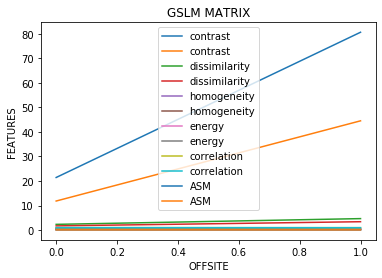

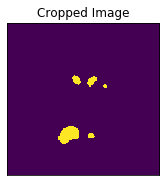

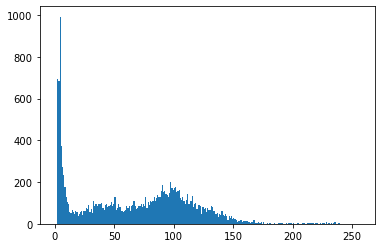

[[ 5  5  5 ...  9  9  9]
 [ 5  5  5 ...  9  9 10]
 [ 5  5  5 ...  9 10 10]
 ...
 [ 8  7  7 ...  3  3  3]
 [ 8  8  8 ...  3  3  3]
 [ 8  8  8 ...  3  3  3]]
the contrast of the images is  [[ 29.03537156  29.26894685]
 [108.26785714 108.55245536]]
the dissimilarity of the images is  [[3.40840305 3.2769439 ]
 [6.80183532 6.52529762]]
the homogeneity of the images is  [[0.41688001 0.42393238]
 [0.28337366 0.2912491 ]]
the energy of the images is  [[0.07353484 0.07673018]
 [0.05906437 0.06681225]]
the correlation of the images is  [[0.07353484 0.07673018]
 [0.05906437 0.06681225]]
the ASM of the images is  [[0.00540737 0.00588752]
 [0.0034886  0.00446388]]


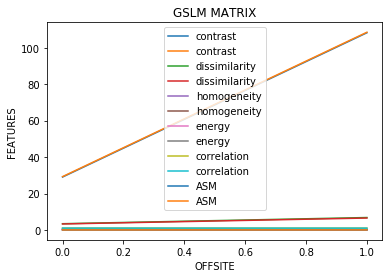

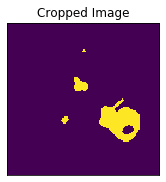

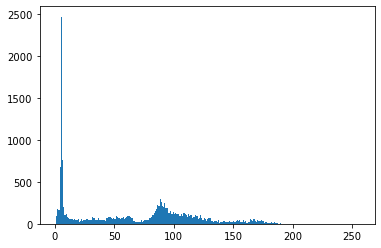

[[5 5 5 ... 2 2 1]
 [5 5 5 ... 2 2 1]
 [5 5 5 ... 2 2 1]
 ...
 [4 4 4 ... 2 2 1]
 [4 4 4 ... 2 2 1]
 [4 4 4 ... 3 2 1]]
the contrast of the images is  [[22.91984498 21.19119094]
 [87.04098462 80.18253968]]
the dissimilarity of the images is  [[2.85242372 2.703125  ]
 [5.71075149 5.4078621 ]]
the homogeneity of the images is  [[0.47999558 0.48739544]
 [0.35386213 0.36700126]]
the energy of the images is  [[0.14621922 0.14615375]
 [0.13063143 0.12917312]]
the correlation of the images is  [[0.14621922 0.14615375]
 [0.13063143 0.12917312]]
the ASM of the images is  [[0.02138006 0.02136092]
 [0.01706457 0.0166857 ]]


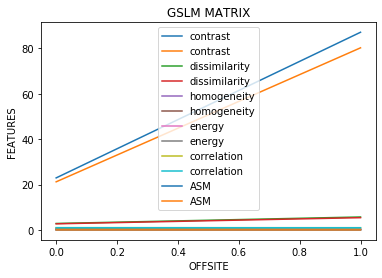

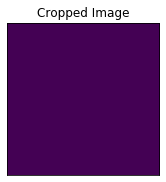

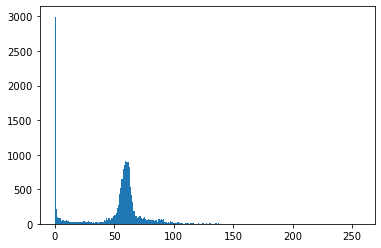

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[19.45091043 21.53143455]
 [72.60832093 80.56950645]]
the dissimilarity of the images is  [[2.00073819 2.05640994]
 [3.99596974 4.09716022]]
the homogeneity of the images is  [[0.64693953 0.66622204]
 [0.51768263 0.55299615]]
the energy of the images is  [[0.19640205 0.20053897]
 [0.17789968 0.18263984]]
the correlation of the images is  [[0.19640205 0.20053897]
 [0.17789968 0.18263984]]
the ASM of the images is  [[0.03857377 0.04021588]
 [0.0316483  0.03335731]]


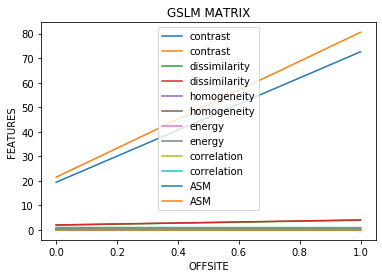

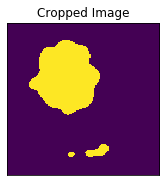

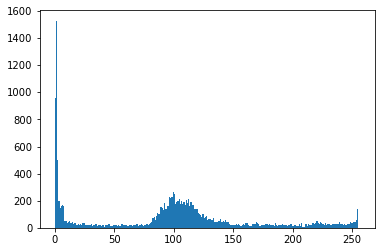

[[0 0 0 ... 4 6 6]
 [0 0 0 ... 4 6 6]
 [0 0 0 ... 4 5 6]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 41.51691683  36.35162402]
 [157.9984499  138.23511905]]
the dissimilarity of the images is  [[3.72385581 3.48646654]
 [7.46186756 6.97916667]]
the homogeneity of the images is  [[0.44576887 0.45726551]
 [0.31860875 0.33611299]]
the energy of the images is  [[0.10556507 0.10413679]
 [0.09432305 0.09152768]]
the correlation of the images is  [[0.10556507 0.10413679]
 [0.09432305 0.09152768]]
the ASM of the images is  [[0.01114398 0.01084447]
 [0.00889684 0.00837732]]


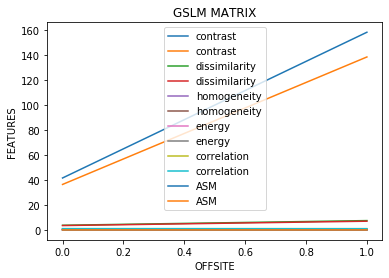

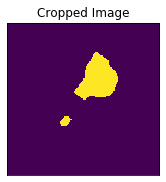

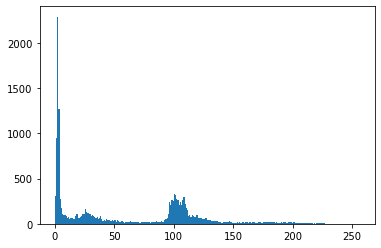

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
the contrast of the images is  [[18.06735974 18.05597933]
 [69.08048115 69.2234003 ]]
the dissimilarity of the images is  [[2.33950541 2.31520669]
 [4.68985615 4.63833085]]
the homogeneity of the images is  [[0.55227443 0.5346101 ]
 [0.43667202 0.40701874]]
the energy of the images is  [[0.15905741 0.1523189 ]
 [0.14478367 0.13650731]]
the correlation of the images is  [[0.15905741 0.1523189 ]
 [0.14478367 0.13650731]]
the ASM of the images is  [[0.02529926 0.02320105]
 [0.02096231 0.01863425]]


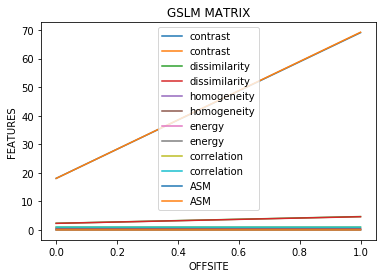

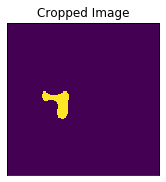

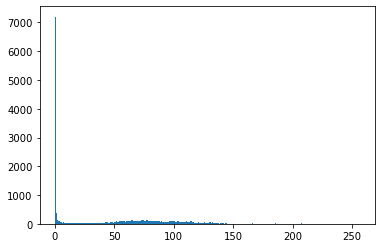

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 40.05499508  39.62057087]
 [151.06336806 147.53707837]]
the dissimilarity of the images is  [[3.23658957 2.98560531]
 [6.48363095 5.97445437]]
the homogeneity of the images is  [[0.57798382 0.59726934]
 [0.50241787 0.51769637]]
the energy of the images is  [[0.42861637 0.42896963]
 [0.41705244 0.41768379]]
the correlation of the images is  [[0.42861637 0.42896963]
 [0.41705244 0.41768379]]
the ASM of the images is  [[0.18371199 0.18401494]
 [0.17393274 0.17445975]]


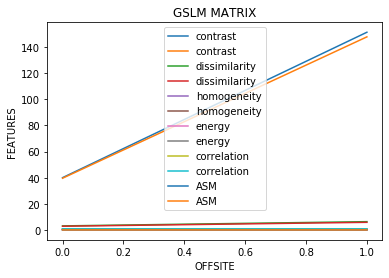

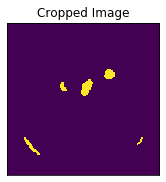

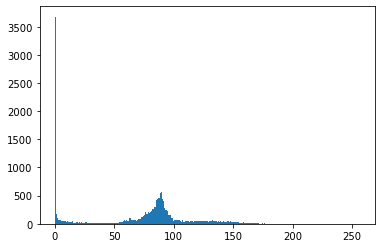

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 58.16806102  43.75725886]
 [218.828125   165.57614087]]
the dissimilarity of the images is  [[3.65637303 3.25270669]
 [7.32638889 6.51103671]]
the homogeneity of the images is  [[0.55264466 0.55428351]
 [0.43565514 0.43716956]]
the energy of the images is  [[0.21674169 0.218314  ]
 [0.20164848 0.20411337]]
the correlation of the images is  [[0.21674169 0.218314  ]
 [0.20164848 0.20411337]]
the ASM of the images is  [[0.04697696 0.047661  ]
 [0.04066211 0.04166227]]


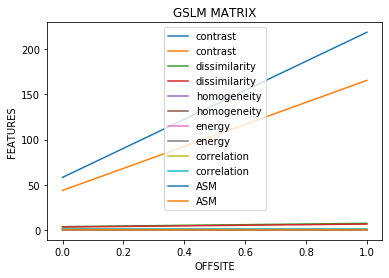

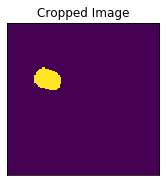

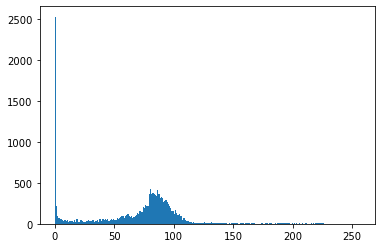

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[25.35851378 25.21056841]
 [95.98115079 94.75998264]]
the dissimilarity of the images is  [[2.89911417 2.75461368]
 [5.78881448 5.49832589]]
the homogeneity of the images is  [[0.47771722 0.4956505 ]
 [0.34740482 0.36443296]]
the energy of the images is  [[0.15015246 0.1510487 ]
 [0.13814298 0.1399209 ]]
the correlation of the images is  [[0.15015246 0.1510487 ]
 [0.13814298 0.1399209 ]]
the ASM of the images is  [[0.02254576 0.02281571]
 [0.01908348 0.01957786]]


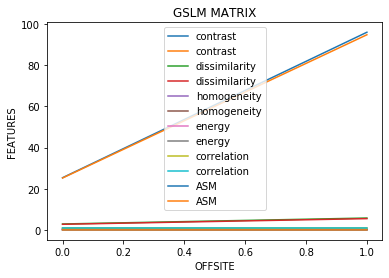

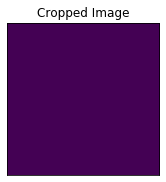

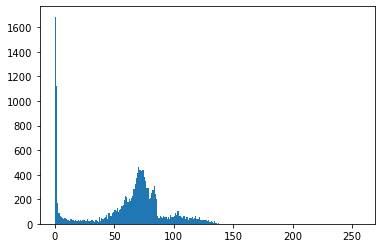

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 35.97127215  37.99464813]
 [136.82217262 142.47736855]]
the dissimilarity of the images is  [[3.07609498 3.06108514]
 [6.15848214 6.10993304]]
the homogeneity of the images is  [[0.53027841 0.54693872]
 [0.39475959 0.41339963]]
the energy of the images is  [[0.12136202 0.12170324]
 [0.10733328 0.10698883]]
the correlation of the images is  [[0.12136202 0.12170324]
 [0.10733328 0.10698883]]
the ASM of the images is  [[0.01472874 0.01481168]
 [0.01152043 0.01144661]]


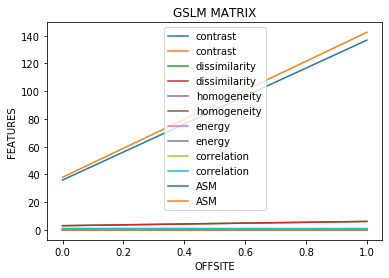

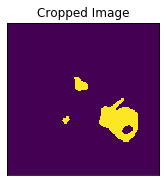

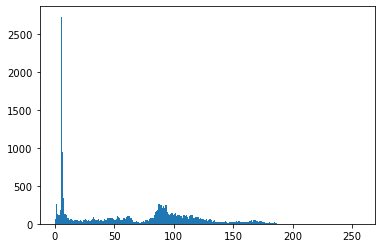

[[5 5 5 ... 1 1 0]
 [5 5 5 ... 1 1 0]
 [5 5 5 ... 1 1 0]
 ...
 [5 5 5 ... 1 1 0]
 [5 5 5 ... 1 1 0]
 [5 5 5 ... 1 1 0]]
the contrast of the images is  [[22.62001722 20.16941437]
 [85.95951141 76.40073165]]
the dissimilarity of the images is  [[2.82412648 2.60666831]
 [5.64775546 5.21186756]]
the homogeneity of the images is  [[0.48664989 0.50232647]
 [0.36488439 0.38935787]]
the energy of the images is  [[0.16499846 0.16350681]
 [0.1527962  0.1482399 ]]
the correlation of the images is  [[0.16499846 0.16350681]
 [0.1527962  0.1482399 ]]
the ASM of the images is  [[0.02722449 0.02673448]
 [0.02334668 0.02197507]]


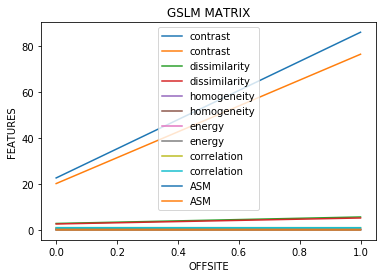

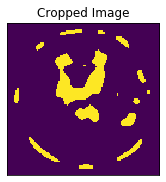

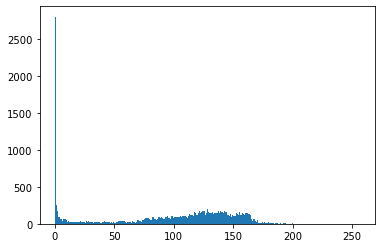

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 17 12 11]
 [ 0  0  0 ... 17 12 11]
 [ 0  0  0 ... 17 12 11]]
the contrast of the images is  [[ 76.86337352  81.22219488]
 [291.79495288 305.28931052]]
the dissimilarity of the images is  [[4.92365896 4.9148622 ]
 [9.85881696 9.81944444]]
the homogeneity of the images is  [[0.40246595 0.41748833]
 [0.28750402 0.30024114]]
the energy of the images is  [[0.1600438  0.16354302]
 [0.14852736 0.15417386]]
the correlation of the images is  [[0.1600438  0.16354302]
 [0.14852736 0.15417386]]
the ASM of the images is  [[0.02561402 0.02674632]
 [0.02206038 0.02376958]]


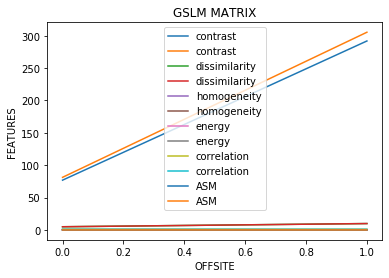

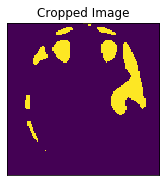

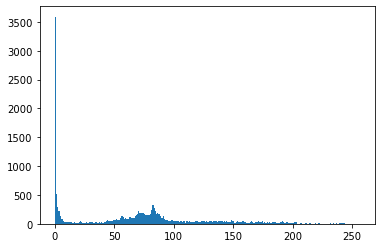

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 84.07492618  47.837906  ]
 [321.72643849 182.05605159]]
the dissimilarity of the images is  [[4.71751969 3.63170522]
 [9.47222222 7.2578125 ]]
the homogeneity of the images is  [[0.5169198  0.51101625]
 [0.40450359 0.40014794]]
the energy of the images is  [[0.20736802 0.21503282]
 [0.19117683 0.20676931]]
the correlation of the images is  [[0.20736802 0.21503282]
 [0.19117683 0.20676931]]
the ASM of the images is  [[0.04300149 0.04623911]
 [0.03654858 0.04275355]]


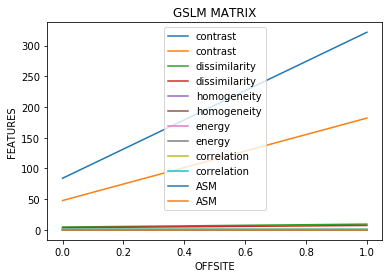

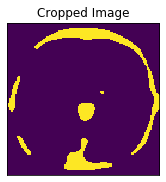

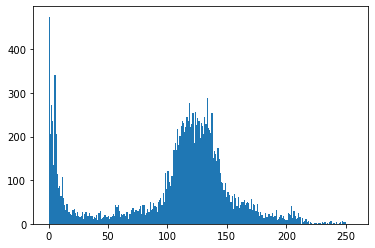

[[57 57 66 ...  2  2  2]
 [57 59 66 ...  2  2  2]
 [59 64 66 ...  2  2  2]
 ...
 [ 0  0  0 ...  5  5  5]
 [ 0  0  0 ...  5  5  5]
 [ 0  0  0 ...  5  5  5]]
the contrast of the images is  [[ 60.59012057  73.17415108]
 [229.33922371 280.53342014]]
the dissimilarity of the images is  [[4.29521407 4.58765994]
 [8.57917907 9.16710069]]
the homogeneity of the images is  [[0.40046318 0.41546491]
 [0.26192545 0.27711249]]
the energy of the images is  [[0.04735818 0.04663429]
 [0.03872941 0.03657459]]
the correlation of the images is  [[0.04735818 0.04663429]
 [0.03872941 0.03657459]]
the ASM of the images is  [[0.0022428  0.00217476]
 [0.00149997 0.0013377 ]]


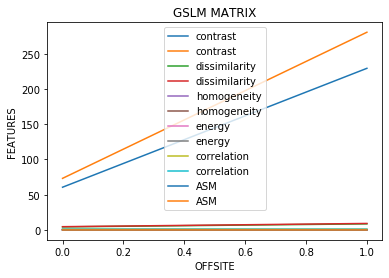

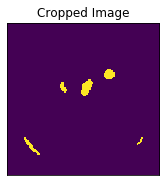

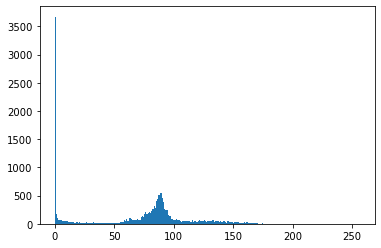

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 58.15526575  43.82910925]
 [218.84988839 165.87710813]]
the dissimilarity of the images is  [[3.65477362 3.25590551]
 [7.32384673 6.51822917]]
the homogeneity of the images is  [[0.5529927  0.55426265]
 [0.43667508 0.43693736]]
the energy of the images is  [[0.21658112 0.21803867]
 [0.20150473 0.20379538]]
the correlation of the images is  [[0.21658112 0.21803867]
 [0.20150473 0.20379538]]
the ASM of the images is  [[0.04690738 0.04754086]
 [0.04060416 0.04153256]]


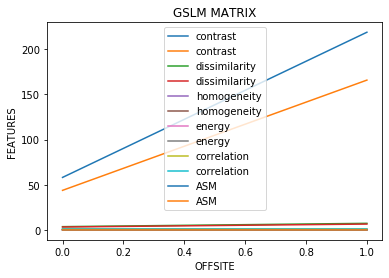

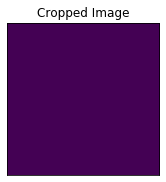

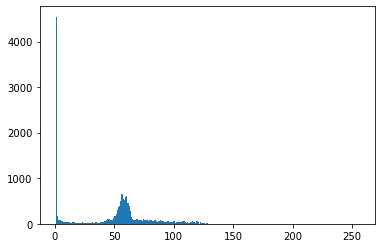

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
the contrast of the images is  [[ 39.75270669  27.14240896]
 [150.59902034 102.68018353]]
the dissimilarity of the images is  [[3.01820866 2.54582923]
 [6.04594494 5.08916171]]
the homogeneity of the images is  [[0.58398765 0.60339052]
 [0.47428702 0.50058485]]
the energy of the images is  [[0.26976701 0.27216686]
 [0.25541209 0.25826815]]
the correlation of the images is  [[0.26976701 0.27216686]
 [0.25541209 0.25826815]]
the ASM of the images is  [[0.07277424 0.0740748 ]
 [0.06523534 0.06670244]]


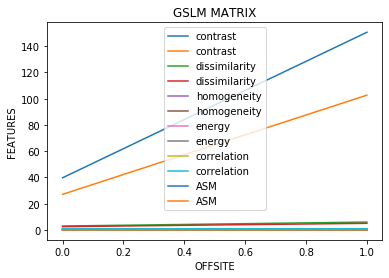

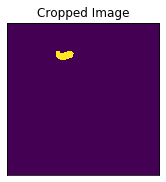

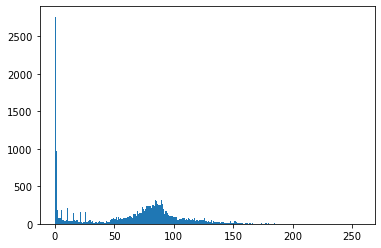

[[ 3  3  2 ... 16 22 26]
 [ 3  3  2 ... 16 21 26]
 [ 2  2  2 ... 16 21 26]
 ...
 [ 1  1  1 ... 15 21 25]
 [ 1  1  1 ... 15 21 25]
 [ 2  1  1 ... 15 21 25]]
the contrast of the images is  [[ 50.28038878  40.42802657]
 [188.75998264 151.43942212]]
the dissimilarity of the images is  [[3.80081201 3.41215551]
 [7.58153522 6.8140501 ]]
the homogeneity of the images is  [[0.46168594 0.50568112]
 [0.34383406 0.38744885]]
the energy of the images is  [[0.1692562  0.16623864]
 [0.15846129 0.15244537]]
the correlation of the images is  [[0.1692562  0.16623864]
 [0.15846129 0.15244537]]
the ASM of the images is  [[0.02864766 0.02763529]
 [0.02510998 0.02323959]]


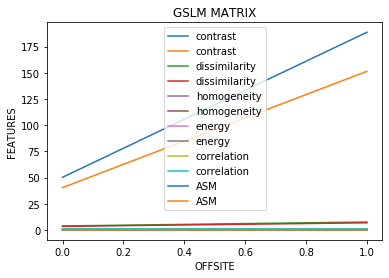

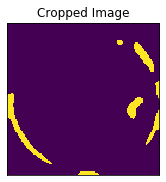

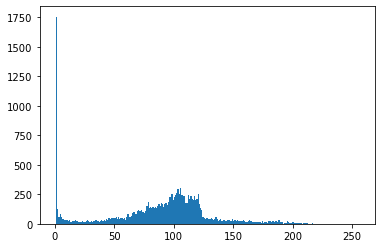

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
the contrast of the images is  [[ 69.17359744  59.49956939]
 [262.57514881 224.97085813]]
the dissimilarity of the images is  [[4.52472933 4.38576526]
 [9.01450893 8.74417163]]
the homogeneity of the images is  [[0.42132198 0.41005713]
 [0.29259725 0.28554929]]
the energy of the images is  [[0.10481396 0.10524866]
 [0.09536375 0.09625067]]
the correlation of the images is  [[0.10481396 0.10524866]
 [0.09536375 0.09625067]]
the ASM of the images is  [[0.01098597 0.01107728]
 [0.00909424 0.00926419]]


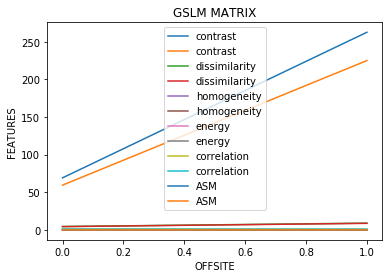

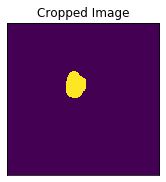

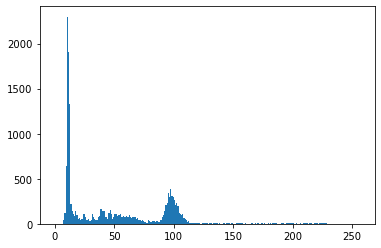

[[44 37 29 ...  7  7  7]
 [44 37 30 ...  7  7  7]
 [44 37 30 ...  8  8  8]
 ...
 [45 38 31 ...  9  9  9]
 [45 38 31 ...  9  9  9]
 [45 38 30 ...  9  9  9]]
the contrast of the images is  [[17.21684301  9.98443652]
 [64.56343006 37.99503968]]
the dissimilarity of the images is  [[2.25301427 1.57978593]
 [4.45008681 3.16021825]]
the homogeneity of the images is  [[0.58806783 0.65189769]
 [0.4818957  0.53783818]]
the energy of the images is  [[0.18565475 0.18601991]
 [0.16731843 0.16815234]]
the correlation of the images is  [[0.18565475 0.18601991]
 [0.16731843 0.16815234]]
the ASM of the images is  [[0.03446768 0.03460341]
 [0.02799546 0.02827521]]


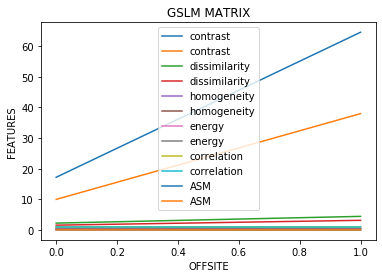

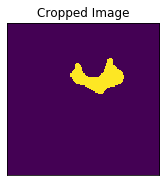

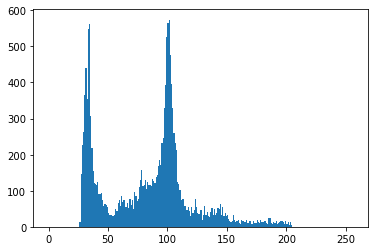

[[29 29 30 ... 38 41 43]
 [29 29 30 ... 38 41 43]
 [30 30 30 ... 38 41 43]
 ...
 [26 26 26 ... 37 40 43]
 [26 26 26 ... 37 40 43]
 [26 26 26 ... 37 40 43]]
the contrast of the images is  [[ 29.25941191  24.25885827]
 [110.05257937  91.65283978]]
the dissimilarity of the images is  [[3.07806348 2.74975394]
 [6.15538194 5.49745784]]
the homogeneity of the images is  [[0.47757063 0.51135661]
 [0.33880258 0.37215043]]
the energy of the images is  [[0.06813824 0.06820518]
 [0.05258666 0.0525371 ]]
the correlation of the images is  [[0.06813824 0.06820518]
 [0.05258666 0.0525371 ]]
the ASM of the images is  [[0.00464282 0.00465195]
 [0.00276536 0.00276015]]


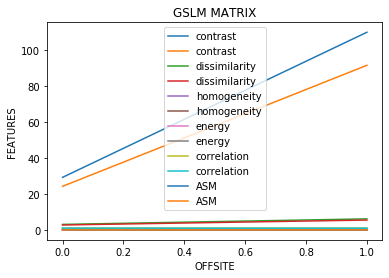

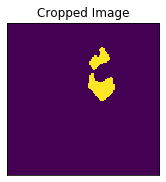

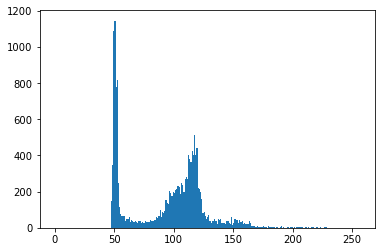

[[48 48 48 ... 48 48 48]
 [48 48 48 ... 48 48 48]
 [48 48 49 ... 48 48 48]
 ...
 [47 47 47 ... 47 47 47]
 [47 47 47 ... 47 47 47]
 [47 47 47 ... 47 47 47]]
the contrast of the images is  [[12.74292569 13.07744833]
 [48.34511409 49.55543155]]
the dissimilarity of the images is  [[1.97028789 1.91110974]
 [3.94456845 3.81014385]]
the homogeneity of the images is  [[0.56656925 0.57899585]
 [0.4315901  0.44489859]]
the energy of the images is  [[0.11037364 0.11151981]
 [0.09075813 0.09287025]]
the correlation of the images is  [[0.11037364 0.11151981]
 [0.09075813 0.09287025]]
the ASM of the images is  [[0.01218234 0.01243667]
 [0.00823704 0.00862488]]


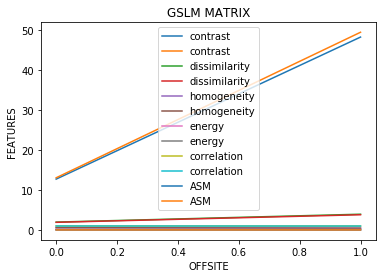

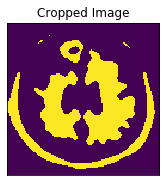

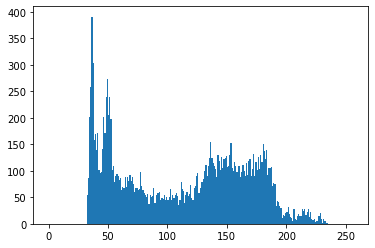

[[51 50 50 ... 33 34 34]
 [51 51 50 ... 33 34 34]
 [51 51 50 ... 34 34 34]
 ...
 [51 51 50 ... 33 34 34]
 [51 51 50 ... 33 34 34]
 [51 51 50 ... 33 34 34]]
the contrast of the images is  [[ 98.81514518  91.17987205]
 [375.87927827 346.41629464]]
the dissimilarity of the images is  [[ 5.99120325  5.68713091]
 [11.99894593 11.39558532]]
the homogeneity of the images is  [[0.35844723 0.36453644]
 [0.24090474 0.24874121]]
the energy of the images is  [[0.04171044 0.04231532]
 [0.03234079 0.03324769]]
the correlation of the images is  [[0.04171044 0.04231532]
 [0.03234079 0.03324769]]
the ASM of the images is  [[0.00173976 0.00179059]
 [0.00104593 0.00110541]]


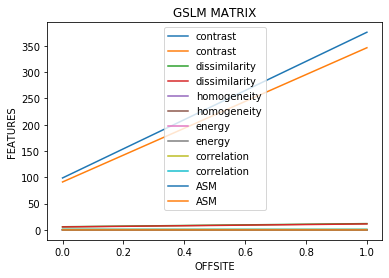

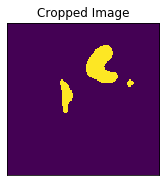

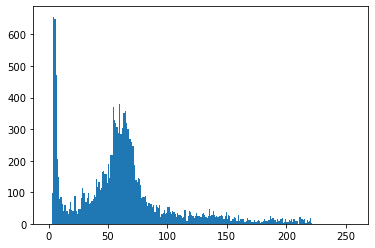

[[ 8  8  8 ... 21 23 24]
 [ 8  8  8 ... 21 23 24]
 [ 8  8  8 ... 21 23 24]
 ...
 [ 4  4  4 ... 19 22 22]
 [ 4  4  4 ... 19 22 22]
 [ 4  4  4 ... 19 22 22]]
the contrast of the images is  [[25.86078986 21.90145177]
 [98.04954117 82.94388641]]
the dissimilarity of the images is  [[2.94875738 2.85580709]
 [5.88163442 5.71385169]]
the homogeneity of the images is  [[0.45110449 0.4693028 ]
 [0.31121852 0.33241235]]
the energy of the images is  [[0.06539839 0.06383147]
 [0.0544359  0.05041519]]
the correlation of the images is  [[0.06539839 0.06383147]
 [0.0544359  0.05041519]]
the ASM of the images is  [[0.00427695 0.00407446]
 [0.00296327 0.00254169]]


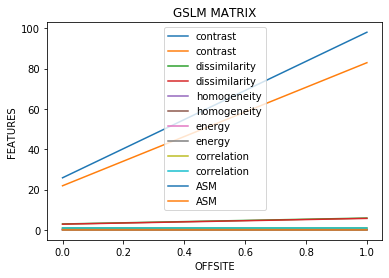

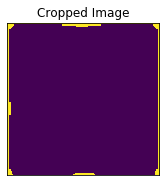

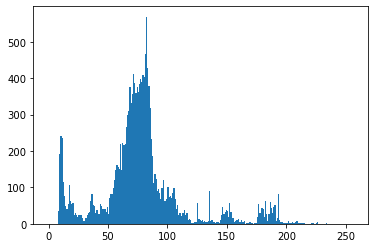

[[233 226 222 ... 221 226 233]
 [226 225 215 ... 214 225 226]
 [222 212 206 ... 207 213 221]
 ...
 [201 197 185 ... 183 196 201]
 [209 201 194 ... 193 201 209]
 [215 209 201 ... 200 209 215]]
the contrast of the images is  [[ 85.08230807  60.78389518]
 [315.98759921 226.71434772]]
the dissimilarity of the images is  [[4.3304626  3.59664124]
 [8.56051587 7.10410466]]
the homogeneity of the images is  [[0.46651724 0.49989064]
 [0.3194187  0.35821268]]
the energy of the images is  [[0.05309647 0.05718212]
 [0.03977338 0.04321058]]
the correlation of the images is  [[0.05309647 0.05718212]
 [0.03977338 0.04321058]]
the ASM of the images is  [[0.00281923 0.0032698 ]
 [0.00158192 0.00186715]]


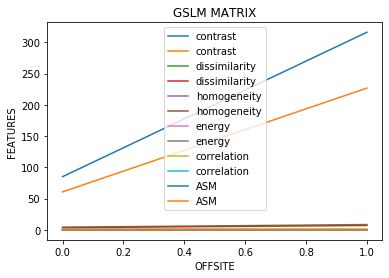

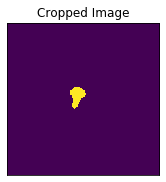

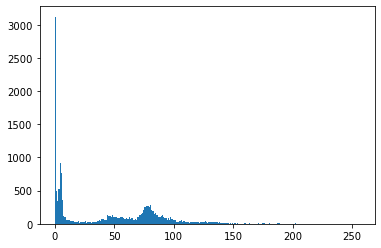

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[21.10143947 16.44968012]
 [77.95920139 61.06653026]]
the dissimilarity of the images is  [[2.49341781 2.09670276]
 [4.98921131 4.19326637]]
the homogeneity of the images is  [[0.55179824 0.58785587]
 [0.41751457 0.46871567]]
the energy of the images is  [[0.18925957 0.19881505]
 [0.17217152 0.18792705]]
the correlation of the images is  [[0.18925957 0.19881505]
 [0.17217152 0.18792705]]
the ASM of the images is  [[0.03581918 0.03952743]
 [0.02964303 0.03531657]]


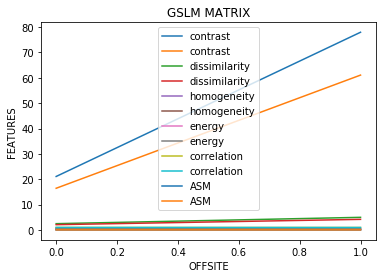

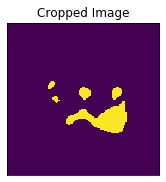

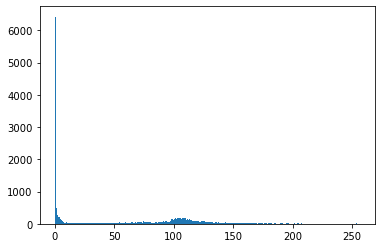

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 33.7882628   25.83575295]
 [127.76351687  98.57936508]]
the dissimilarity of the images is  [[2.94968012 2.63705709]
 [5.89719742 5.27579365]]
the homogeneity of the images is  [[0.58640336 0.59111794]
 [0.49977713 0.50425406]]
the energy of the images is  [[0.38106752 0.38146904]
 [0.36873325 0.36940612]]
the correlation of the images is  [[0.38106752 0.38146904]
 [0.36873325 0.36940612]]
the ASM of the images is  [[0.14521245 0.14551863]
 [0.13596421 0.13646088]]


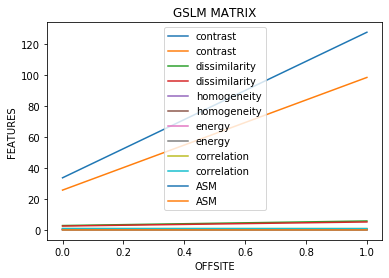

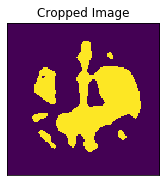

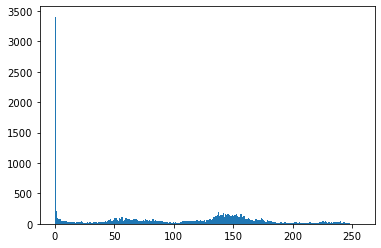

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 46.17950295  30.64437746]
 [175.78794643 117.03707837]]
the dissimilarity of the images is  [[3.98216043 3.29582923]
 [7.97433036 6.58060516]]
the homogeneity of the images is  [[0.43612395 0.45704509]
 [0.32165141 0.34834201]]
the energy of the images is  [[0.19473902 0.20003401]
 [0.1806255  0.19097135]]
the correlation of the images is  [[0.19473902 0.20003401]
 [0.1806255  0.19097135]]
the ASM of the images is  [[0.03792329 0.04001361]
 [0.03262557 0.03647006]]


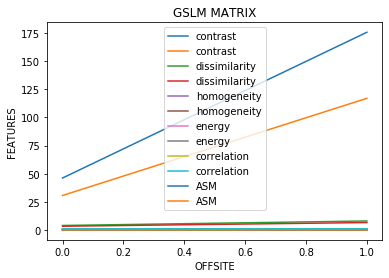

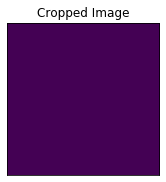

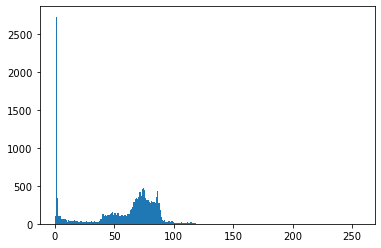

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[21.10943652 13.0726501 ]
 [78.10478671 49.24454365]]
the dissimilarity of the images is  [[2.33150837 1.96512057]
 [4.6547619  3.92485119]]
the homogeneity of the images is  [[0.54696566 0.55886941]
 [0.41057152 0.41836712]]
the energy of the images is  [[0.16517226 0.16363283]
 [0.15273297 0.14883318]]
the correlation of the images is  [[0.16517226 0.16363283]
 [0.15273297 0.14883318]]
the ASM of the images is  [[0.02728188 0.0267757 ]
 [0.02332736 0.02215132]]


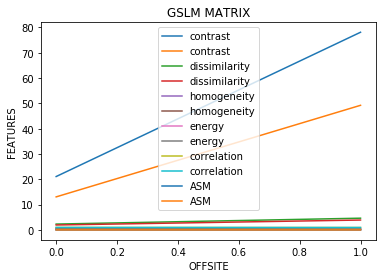

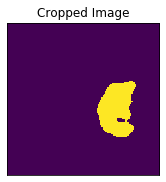

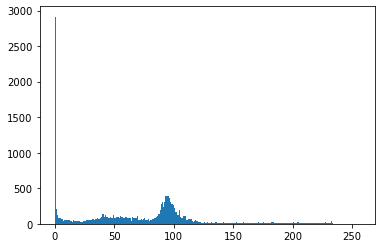

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the contrast of the images is  [[ 27.43793061  22.41110974]
 [103.47619048  84.42416915]]
the dissimilarity of the images is  [[3.11140502 2.83618356]
 [6.22371032 5.66362847]]
the homogeneity of the images is  [[0.47497724 0.47631432]
 [0.35143759 0.35348031]]
the energy of the images is  [[0.17142666 0.17034427]
 [0.1601226  0.1581273 ]]
the correlation of the images is  [[0.17142666 0.17034427]
 [0.1601226  0.1581273 ]]
the ASM of the images is  [[0.0293871  0.02901717]
 [0.02563925 0.02500424]]


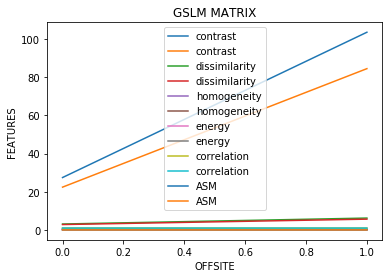

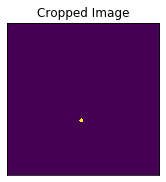

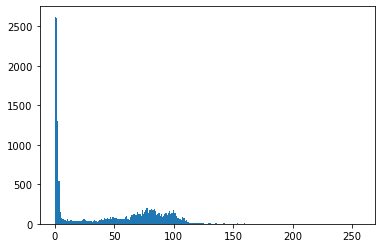

[[5 4 4 ... 4 4 4]
 [4 4 4 ... 3 4 4]
 [4 4 3 ... 3 3 4]
 ...
 [4 4 3 ... 3 4 4]
 [4 4 4 ... 4 4 4]
 [5 4 4 ... 4 4 5]]
the contrast of the images is  [[14.88484252  9.76962352]
 [56.15389385 36.45417907]]
the dissimilarity of the images is  [[1.92704232 1.64351624]
 [3.84945437 3.28478423]]
the homogeneity of the images is  [[0.60073797 0.62673381]
 [0.48265126 0.51093703]]
the energy of the images is  [[0.21650354 0.21606393]
 [0.19988043 0.19572912]]
the correlation of the images is  [[0.21650354 0.21606393]
 [0.19988043 0.19572912]]
the ASM of the images is  [[0.04687378 0.04668362]
 [0.03995219 0.03830989]]


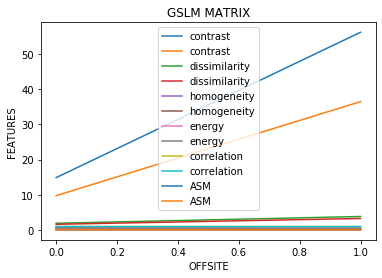

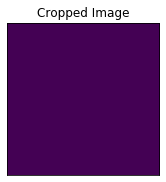

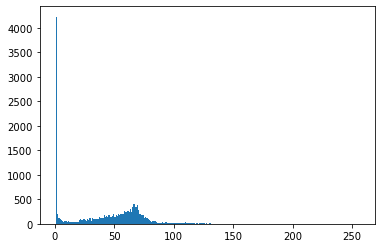

[[12 12 10 ...  1  1  1]
 [12 10  9 ...  1  1  1]
 [10  9  8 ...  1  1  1]
 ...
 [21 22 22 ...  1  1  1]
 [18 20 20 ...  1  1  1]
 [18 18 19 ...  1  1  1]]
the contrast of the images is  [[22.52306841 15.86712598]
 [84.61848958 59.7483879 ]]
the dissimilarity of the images is  [[2.56920522 2.08882874]
 [5.15023562 4.17534722]]
the homogeneity of the images is  [[0.54458746 0.57710197]
 [0.42281534 0.45800077]]
the energy of the images is  [[0.24717016 0.25167507]
 [0.23259542 0.24115162]]
the correlation of the images is  [[0.24717016 0.25167507]
 [0.23259542 0.24115162]]
the ASM of the images is  [[0.06109309 0.06334034]
 [0.05410063 0.0581541 ]]


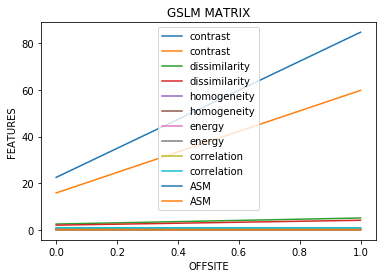

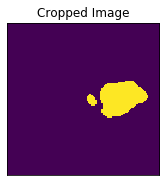

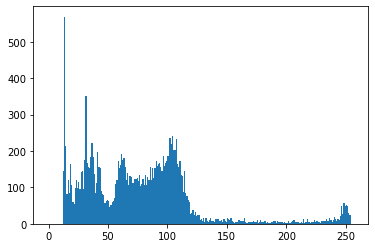

[[55 53 50 ... 52 54 56]
 [53 50 47 ... 48 52 54]
 [48 45 43 ... 43 46 48]
 ...
 [47 44 41 ... 41 44 47]
 [52 49 45 ... 47 50 52]
 [54 52 48 ... 50 53 55]]
the contrast of the images is  [[ 24.34891732  29.61011319]
 [ 93.33723958 113.98573909]]
the dissimilarity of the images is  [[3.06532972 3.26230315]
 [6.1187376  6.47309028]]
the homogeneity of the images is  [[0.39058458 0.40252807]
 [0.25263326 0.26935275]]
the energy of the images is  [[0.0451518  0.04571709]
 [0.03529303 0.0365706 ]]
the correlation of the images is  [[0.0451518  0.04571709]
 [0.03529303 0.0365706 ]]
the ASM of the images is  [[0.00203869 0.00209005]
 [0.0012456  0.00133741]]


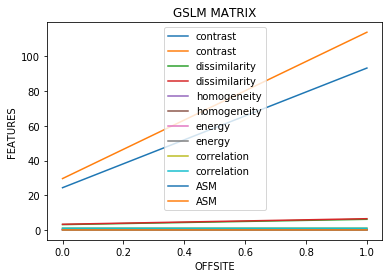

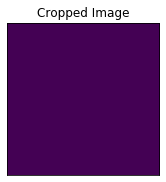

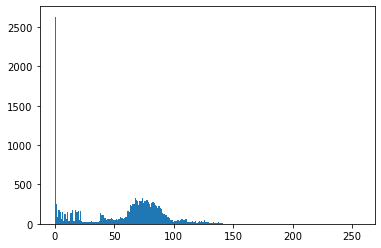

[[ 0  2  8 ... 17 20 21]
 [ 0  2  9 ... 17 20 20]
 [ 0  2 10 ... 16 20 20]
 ...
 [13 13 13 ... 20 21 22]
 [17 17 17 ... 22 23 24]
 [21 21 21 ... 23 24 24]]
the contrast of the images is  [[ 35.60439222  26.97250246]
 [135.94624256 102.02089534]]
the dissimilarity of the images is  [[2.99956939 2.67845719]
 [6.00899058 5.343812  ]]
the homogeneity of the images is  [[0.50930956 0.52615734]
 [0.3766677  0.39744498]]
the energy of the images is  [[0.15585987 0.15609909]
 [0.14516276 0.14417295]]
the correlation of the images is  [[0.15585987 0.15609909]
 [0.14516276 0.14417295]]
the ASM of the images is  [[0.0242923  0.02436692]
 [0.02107223 0.02078584]]


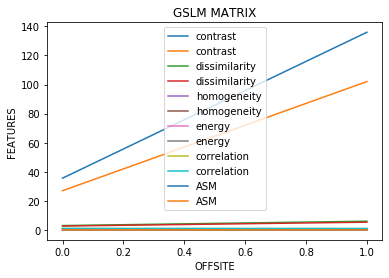

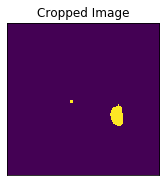

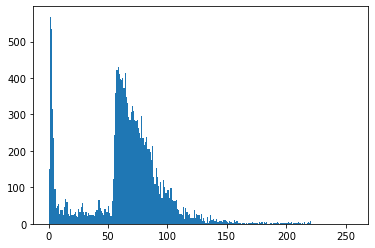

[[ 4  4  4 ... 36 47 55]
 [ 3  3  3 ... 37 48 55]
 [ 2  2  2 ... 38 50 55]
 ...
 [11 13 22 ... 38 50 55]
 [11 12 19 ... 37 48 55]
 [10 12 18 ... 36 47 55]]
the contrast of the images is  [[24.73954232 22.66855315]
 [92.39490327 84.25415427]]
the dissimilarity of the images is  [[3.15760335 2.87057087]
 [6.24410962 5.70455109]]
the homogeneity of the images is  [[0.41007281 0.45512499]
 [0.28012931 0.31793858]]
the energy of the images is  [[0.0598701  0.06194831]
 [0.04688406 0.04811098]]
the correlation of the images is  [[0.0598701  0.06194831]
 [0.04688406 0.04811098]]
the ASM of the images is  [[0.00358443 0.00383759]
 [0.00219812 0.00231467]]


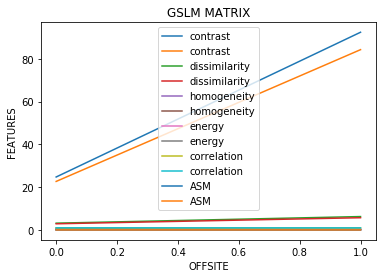

Number of examples is: 253
X shape is: (253, 128, 128)
y shape is: (253,)
3


In [4]:
create_data_set()
print(np.ndim(X))


In [5]:
# Shuffle two lists with same order 
# Using zip() + * operator + shuffle() 
temp = list(zip(X,Y)) 
random.shuffle(temp) 
X,y= zip(*temp) 


In [6]:
y
np.shape(X)
print(np.ndim(X))

3


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
def split_data(X, y, test_size=0.2):
       
    """
    Splits data into training, development and test sets.
    Arguments:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    Returns:
        X_train: A numpy array with shape = (#_train_examples, image_width, image_height, #_channels)
        y_train: A numpy array with shape = (#_train_examples, 1)
        X_val: A numpy array with shape = (#_val_examples, image_width, image_height, #_channels)
        y_val: A numpy array with shape = (#_val_examples, 1)
        X_test: A numpy array with shape = (#_test_examples, image_width, image_height, #_channels)
        y_test: A numpy array with shape = (#_test_examples, 1)
    """
    
    X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=test_size)
    X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [9]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, Y, test_size=0.3)

In [10]:
print ("number of training examples = " + str(np.shape(X_train)[0]))
print ("number of development examples = " + str(np.shape(X_val)[0]))
print ("number of test examples = " + str(np.shape(X_test)[0]))
print ("X_train shape: " + str(np.shape(X_train)))
print ("Y_train shape: " + str(np.shape(y_train)))
print ("X_val (dev) shape: " + str(np.shape(X_val)))
print ("Y_val (dev) shape: " + str(np.shape(y_val)))
print ("X_test shape: " + str(np.shape(X_test)))
print ("Y_test shape: " + str(np.shape(y_test)))

number of training examples = 177
number of development examples = 38
number of test examples = 38
X_train shape: (177, 128, 128)
Y_train shape: (177,)
X_val (dev) shape: (38, 128, 128)
Y_val (dev) shape: (38,)
X_test shape: (38, 128, 128)
Y_test shape: (38,)


In [ ]:
print(np.ndim(X_train))
print(np.ndim(X_test))
print(y_train)

In [ ]:
# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return format"{h}:{m}:{round(s,1)}"

In [ ]:
def compute_f1_score(y_true, prob):
    # convert the vector of probabilities to a target vector
    y_pred = np.where(prob > 0.5, 1, 0)
    
    score = f1_score(y_true, y_pred)
    
    return score

# Let's build a convolutional neural network model:

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

In [12]:
def build_model(input_shape):
    """
    Arugments:
        input_shape: A tuple representing the shape of the input of the model. shape=(image_width, image_height, #_channels)
    Returns:
        model: A Model object.
    """
    # Define the input placeholder as a tensor with shape input_shape. 
    X_input = tf.keras.Input(input_shape)# shape=(?, 128, 128, 1)
    print(X_input.shape)
    
    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((2, 2))(X_input) # shape=(?, 244, 244, 3)
    print(X.shape)
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X) # shape=(?, 238, 238, 32)
    print(X.shape)
    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool0')(X) # shape=(?, 59, 59, 32) 
    print(X.shape)
    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool1')(X) # shape=(?, 14, 14, 32)
    print(X.shape)
    # FLATTEN X 
    X = Flatten()(X)# shape=(?, 6272)
    print(X.shape)
    # FULLYCONNECTED
    X = Dense(1, activation='sigmoid', name='fc')(X) # shape=(?, 1)
    
    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='BrainDetectionModel')
    
    return model

In [13]:
input_shape = (size_img, size_img,1)

In [14]:
model = build_model(input_shape)

(None, 128, 128, 1)
(None, 132, 132, 1)
(None, 126, 126, 32)
(None, 31, 31, 32)
(None, 7, 7, 32)
(None, 1568)


In [15]:
model.summary()

Model: "BrainDetectionModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 132, 132, 1)       0         
_________________________________________________________________
conv0 (Conv2D)               (None, 126, 126, 32)      1600      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 126, 126, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 126, 126, 32)      0         
_________________________________________________________________
max_pool0 (MaxPooling2D)     (None, 31, 31, 32)        0         
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 7, 7, 32)  

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
print(np.shape(X_train))
print(np.ndim(X_train))

In [17]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_val = np.asarray(X_val)
y_val= np.asarray(y_val)

In [18]:
X_train = np.reshape(X_train,(177,size_img, size_img,1))
X_test = np.reshape(X_test,(38,size_img, size_img,1))
X_val = np.reshape(X_val,(38,size_img, size_img,1))

In [ ]:

X_test = X_test.reshape(-1,size_img, size_img, 1)

In [19]:
print("Fit model on training data")
modelhistory = model.fit(x=X_train, y=y_train, batch_size=32, epochs=7, validation_data=(X_val, y_val))

Fit model on training data
Train on 177 samples, validate on 38 samples
Epoch 1/7
177/177 [==============================] - 7s 40ms/sample - loss: 1.1078 - accuracy: 0.5198 - val_loss: 0.6832 - val_accuracy: 0.4737
Epoch 2/7
177/177 [==============================] - 5s 27ms/sample - loss: 0.8477 - accuracy: 0.5537 - val_loss: 0.6909 - val_accuracy: 0.4737
Epoch 3/7
177/177 [==============================] - 5s 27ms/sample - loss: 0.6497 - accuracy: 0.5819 - val_loss: 0.6852 - val_accuracy: 0.4474
Epoch 4/7
177/177 [==============================] - 5s 27ms/sample - loss: 0.5844 - accuracy: 0.6497 - val_loss: 0.6857 - val_accuracy: 0.4737
Epoch 5/7
177/177 [==============================] - 5s 26ms/sample - loss: 0.5497 - accuracy: 0.6723 - val_loss: 0.6822 - val_accuracy: 0.4474
Epoch 6/7
177/177 [==============================] - 5s 27ms/sample - loss: 0.5096 - accuracy: 0.7119 - val_loss: 0.6793 - val_accuracy: 0.5000
Epoch 7/7
177/177 [==============================] - 5s 27ms/sam

In [20]:
modelhistory.history

{'loss': [1.1078358376767001,
  0.8477439577296629,
  0.6496945316508665,
  0.5843819467361364,
  0.5497412944244127,
  0.5095727514412444,
  0.47631920562625607],
 'accuracy': [0.519774,
  0.5536723,
  0.5819209,
  0.6497175,
  0.6723164,
  0.7118644,
  0.7288136],
 'val_loss': [0.6831860542297363,
  0.6908656390089738,
  0.6852117337678608,
  0.685684040973061,
  0.6822374714048285,
  0.6793046342699152,
  0.6793135310474195],
 'val_accuracy': [0.47368422,
  0.47368422,
  0.4473684,
  0.47368422,
  0.4473684,
  0.5,
  0.5263158]}

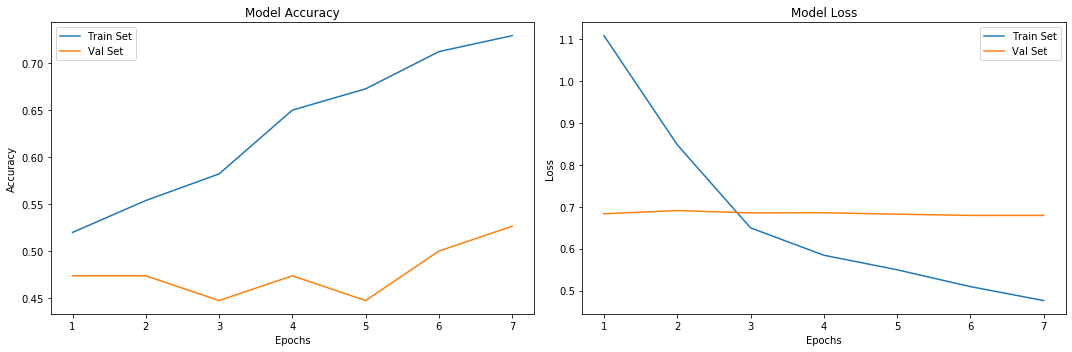

In [21]:
# plot model performance
acc = modelhistory.history['accuracy']
val_acc = modelhistory.history['val_accuracy']
loss = modelhistory.history['loss']
val_loss = modelhistory.history['val_loss']
epochs_range = range(1, len(modelhistory.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [22]:
model.save('BrainTumorDetection.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: BrainTumorDetection.model\assets


In [23]:
filepath1="G:\\brainMydataSet\\yes\\Y58.JPG"
filepath2="G:\\brainMydataSet\\no\\25 no.jpg"

In [25]:

import cv2
import tensorflow as tf

CATEGORIES = ["no","yes"]


def prepare(filepath):
    IMG_SIZE = 128  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model("BrainTumorDetection.model")

prediction = model.predict(prepare(filepath1))
print(prediction)
# will be a list in a list.
cate=(int(str(float(prediction)).split('.')[0]))
print(cate)
print(CATEGORIES[cate])

[[5.0577578e-09]]
5


IndexError: list index out of range

In [ ]:
prediction = model.predict([prepare(filepath2)])  # will be a list in a list.
print(prediction[0][0])
type(prediction)
np.ndim(prediction)

# Svm model

In [ ]:
#Svm model
from sklearn import svm

classifier = svm.SVC(kernel='linear')
classifier.fit(X[:176], y[:176])
predictions = classifier.predict(X[176:])

In [ ]:
#Import svm model
from sklearn import svm


In [ ]:
clf = svm.SVC(kernel='linear')
# Linear Kernel
#Train the model using the training sets
print(clf.fit(d2_train_dataset, y_train))
#Predict the response for test dataset
y_pred=clf.predict(X_test)

In [ ]:
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
X_train = np.reshape(X_train,(177,size_img, size_img,1))
X_test = np.reshape(X_test,(177,size_img, size_img,1))

In [ ]:
nsamples, nx, ny = np.shape(X_train)
ntsamples, ntx, nty = np.shape(X_test)
X_train = np.reshape(X_train,(nsamples,nx*ny))
X_test = np.reshape(X_test,(ntsamples,ntx*nty))
print(np.shape(X_train))
print(np.shape(X_test))

In [ ]:
import cv2
import numpy as np
import os
import glob
import mahotas as mt
from sklearn.svm import LinearSVC

IMG_DIR="G:\\brainMydataSet"
CATEGORIES = ["no","yes"]

for categories in CATEGORIES:
    path = os.path.join(IMG_DIR,categories) #this function is used to cencatenate the path with sub folder
    for img in os.listdir(path):
        img_array =cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        break
    break
        # calculate haralick texture features for 4 types of adjacency
textures = mt.features.haralick(img_array)
print(textures)
        # take the mean of it and return it
ht_mean = textures.mean(axis=0)
print(ht_mean)

In [ ]:
pip install mahotas


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(2, 3, activation='relu', input_shape=tf.keras.Input(input_shape)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))


In [ ]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_val = np.asarray(X_val)
y_val= np.asarray(y_val)